In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
os.chdir('Dataset')
df = pd.read_csv('risk_factors_cervical_cancer.csv')
df.replace("?", np.nan, inplace = True)
df.shape

(858, 36)

In [3]:
df.rename(columns = {'Citology':'Cytology'},inplace = True)

In [4]:
total = df.isnull().sum()
percent = (total/len(df))*100
df_missing_value = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
df_missing_value.columns=['Missing Values', 'Total Percentage']
df_missing_value['Missing Values'] = df_missing_value['Missing Values'].astype(int)
df_missing_value.sort_values(by=['Total Percentage'], inplace=True, ascending=False)

In [5]:
df_missing_value.reset_index(inplace=True)
df_missing_value.columns= ['Factors', 'Missing Values', 'Total Percentage']
df_missing_value

Factors  Missing Values  Total Percentage
0      STDs: Time since last diagnosis             787         91.724942
1     STDs: Time since first diagnosis             787         91.724942
2                                  IUD             117         13.636364
3                          IUD (years)             117         13.636364
4              Hormonal Contraceptives             108         12.587413
5      Hormonal Contraceptives (years)             108         12.587413
6     STDs:pelvic inflammatory disease             105         12.237762
7   STDs:vulvo-perineal condylomatosis             105         12.237762
8                             STDs:HPV             105         12.237762
9                     STDs:Hepatitis B             105         12.237762
10                            STDs:HIV             105         12.237762
11                           STDs:AIDS             105         12.237762
12          STDs:molluscum contagiosum             105         12.237762
13                 STDs:genital herpes             105         12.237762
14                       STDs:syphilis             105         12.237762
15         STDs:vaginal condylomatosis             105         12.237762
16        STDs:cervical condylomatosis             105         12.237762
17                 STDs:condylomatosis             105         12.237762
18                       STDs (number)             105         12.237762
19                                STDs             105         12.237762
20                  Num of pregnancies              56          6.526807
21           Number of sexual partners              26          3.030303
22                 Smokes (packs/year)              13          1.515152
23                      Smokes (years)              13          1.515152
24                              Smokes              13          1.515152
25            First sexual intercourse               7          0.815851
26                                  Dx               0          0.000000
27                            Cytology               0          0.000000
28                            Schiller               0          0.000000
29                          Hinselmann               0          0.000000
30                                 Age               0          0.000000
31                              Dx:HPV               0          0.000000
32                              Dx:CIN               0          0.000000
33                           Dx:Cancer               0          0.000000
34           STDs: Number of diagnosis               0          0.000000
35                              Biopsy               0          0.000000

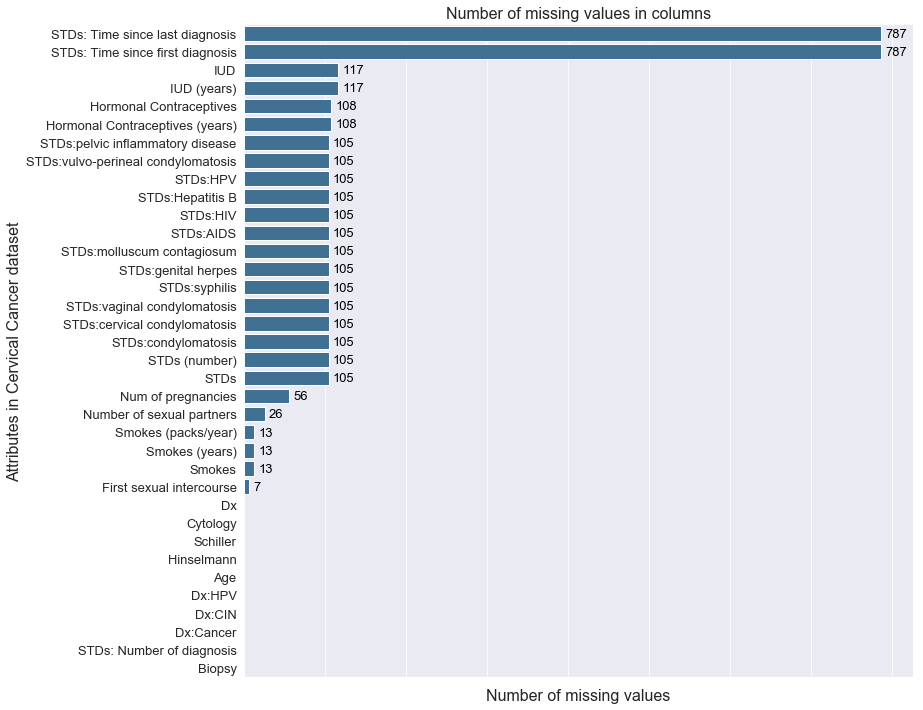

In [7]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
s = sns.barplot(x='Missing Values', y='Factors', data=df_missing_value, orient="h", color="#3274a1")
for index, val in enumerate(df_missing_value['Missing Values'].values):
    if(val!=0):
        s.annotate(val, xy=(val+ 5, index+0.2), color='black', fontsize=13)

s.set_title('Number of missing values in columns', fontsize=16)
s.set_yticklabels(s.get_yticklabels(), fontdict={'fontsize':13})
s.set_xticklabels(s.get_xticklabels(), fontdict={'fontsize':13})
s.set_xlabel('Number of missing values', fontsize=16)
s.set_ylabel('Attributes in Cervical Cancer dataset', fontsize=16)
plt.show()

In [7]:
df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis',\
         'STDs:AIDS','STDs:cervical condylomatosis', 'Dx'], axis=1, inplace=True)
df.shape

(858, 31)

In [8]:
df['Risk Assessment(HSC)'] = df.loc[:, ['Hinselmann', 'Schiller', 'Cytology']].sum(axis=1)

df['Hinselmann'].replace({1:'H', 0:''}, inplace=True)
df['Schiller'].replace({1:'S', 0:''}, inplace=True)
df['Cytology'].replace({1:'C', 0:''}, inplace=True)
df['Biopsy'].replace({1:'B', 0:''}, inplace=True)

df['HSC_results'] = df['Hinselmann'].astype(str) + df['Schiller'].astype(str)\
                    + df['Cytology'].astype(str)
df['HSC_results'] = df['HSC_results'].astype('object')

df['HSCB_results'] = df['HSC_results'].astype(str) + df['Biopsy'].astype(str) 
df['HSCB_results'] = df['HSCB_results'].astype('object')

df['HSC_results'].replace('', 'Negative', inplace=True)
df['HSCB_results'].replace('', 'Negative', inplace=True)

df['Hinselmann'].replace({'H':1, '':0}, inplace=True)
df['Schiller'].replace({'S':1, '':0}, inplace=True)
df['Cytology'].replace({'C':1, '':0}, inplace=True)
df['Biopsy'].replace({'B':1, '':0}, inplace=True)


In [9]:
df.loc[(df['Dx:Cancer'] == 1) | (df['Dx:CIN']== 1) | (df['Dx:HPV']== 1), 'Dx:Result'] = 1
df.loc[(df['Dx:Cancer'] == 0) & (df['Dx:CIN']== 0) & (df['Dx:HPV']== 0), 'Dx:Result'] = 0
df.shape

(858, 35)

In [10]:
df['Smokes (years)'] = df['Smokes (years)'].astype(float).round(decimals=2)
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].astype(float).round(decimals=2)
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].astype(float).round(decimals=2)
df['IUD (years)'] = df['IUD (years)'].astype(float).round(decimals=2)

total_features = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',\
                  'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives',\
                  'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)',\
                  'STDs:condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',\
                  'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes',\
                  'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV',\
                  'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx:Result', 'Hinselmann', 'Schiller',\
                  'Cytology', 'HSC_results', 'Biopsy', 'Risk Assessment(HSC)', 'HSCB_results']

df = df[total_features]
df.shape

(858, 35)

In [11]:
categorical_features=['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis',
                      'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                      'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 
                      'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx:Result',
                      'Hinselmann', 'Schiller', 'Cytology', 'HSC_results', 'Risk Assessment(HSC)', 'Biopsy',
                      'HSCB_results']
for col in df.columns:
    if col in categorical_features:
        df[col] = df[col].astype('object')
    elif (col not in categorical_features):
        df[col] = df[col].apply(pd.to_numeric)

In [12]:
# df.to_csv('cleaned_data.csv', index=False)
df.tail()

Age  Number of sexual partners  First sexual intercourse  \
853   34                        3.0                      18.0   
854   32                        2.0                      19.0   
855   25                        2.0                      17.0   
856   33                        2.0                      24.0   
857   29                        2.0                      20.0   

     Num of pregnancies Smokes  Smokes (years)  Smokes (packs/year)  \
853                 0.0    0.0             0.0                  0.0   
854                 1.0    0.0             0.0                  0.0   
855                 0.0    0.0             0.0                  0.0   
856                 2.0    0.0             0.0                  0.0   
857                 1.0    0.0             0.0                  0.0   

    Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
853                     0.0                             0.00  0.0  ...   
854                     1.0                             8.00  0.0  ...   
855                     1.0                             0.08  0.0  ...   
856                     1.0                             0.08  0.0  ...   
857                     1.0                             0.50  0.0  ...   

     Dx:CIN Dx:HPV  Dx:Result Hinselmann Schiller Cytology HSC_results Biopsy  \
853       0      0          0          0        0        0    Negative      0   
854       0      0          0          0        0        0    Negative      0   
855       0      0          0          0        0        1           C      0   
856       0      0          0          0        0        0    Negative      0   
857       0      0          0          0        0        0    Negative      0   

    Risk Assessment(HSC) HSCB_results  
853                    0     Negative  
854                    0     Negative  
855                    1            C  
856                    0     Negative  
857                    0     Negative  

[5 rows x 35 columns]

In [13]:
df['Risk Assessment(HSC)'].value_counts()

0    762
1     48
2     39
3      9
Name: Risk Assessment(HSC), dtype: int64

Smokes


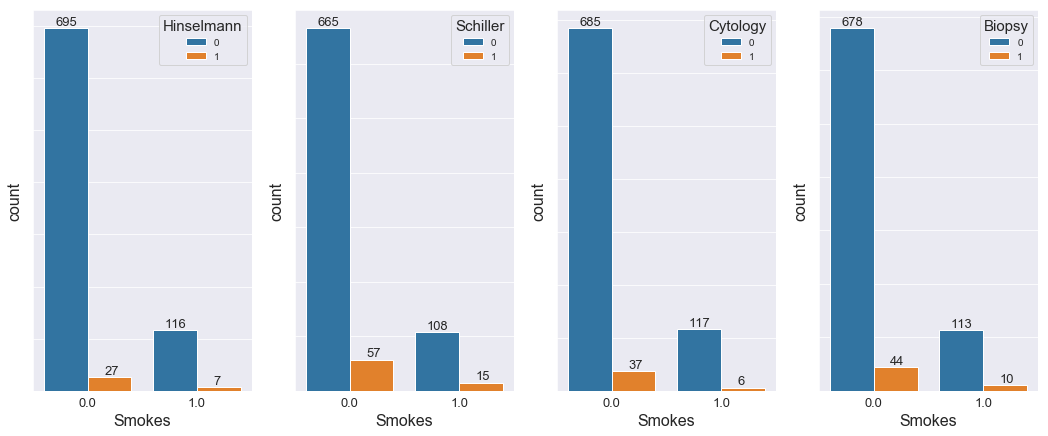

Hormonal Contraceptives


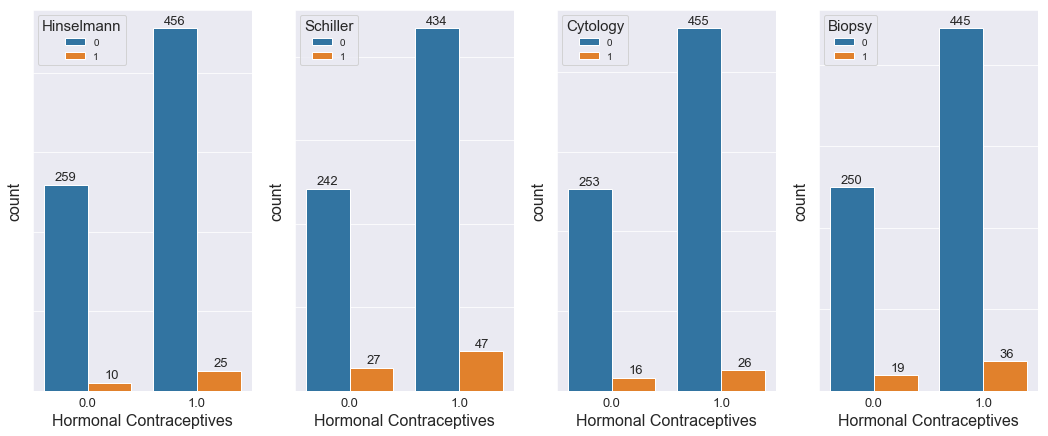

IUD


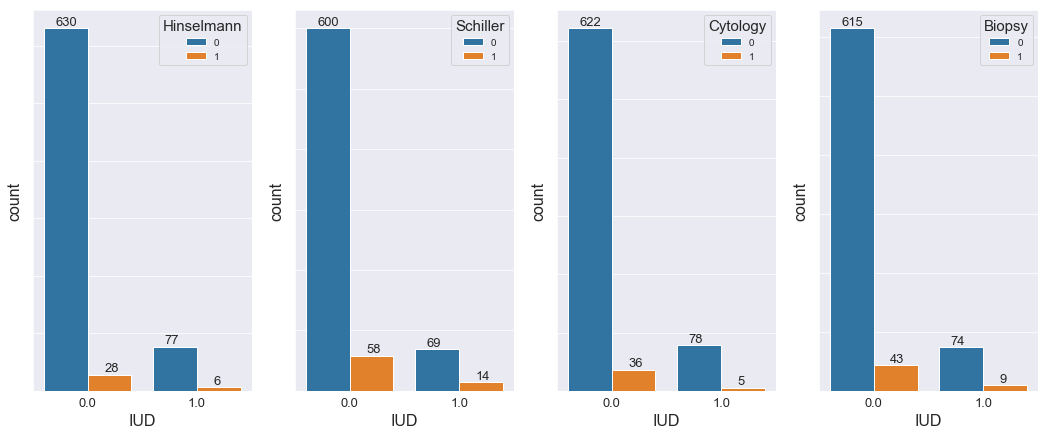

STDs


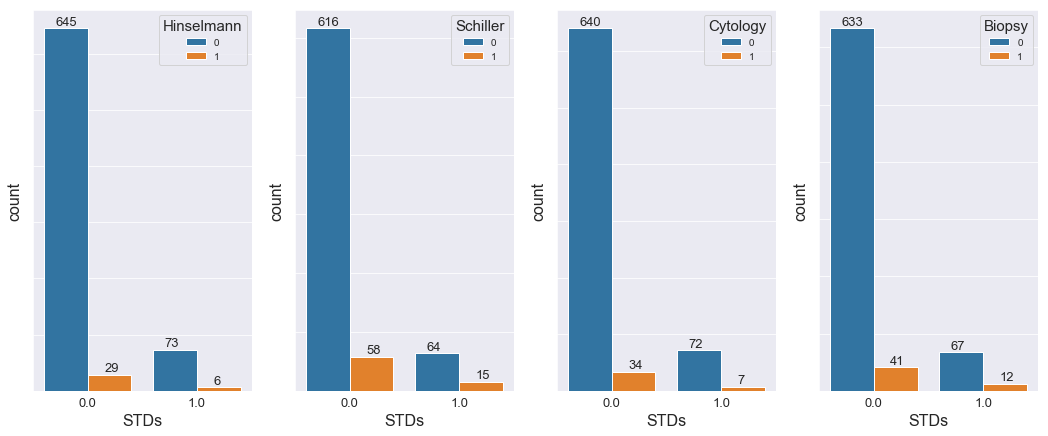

STDs:condylomatosis


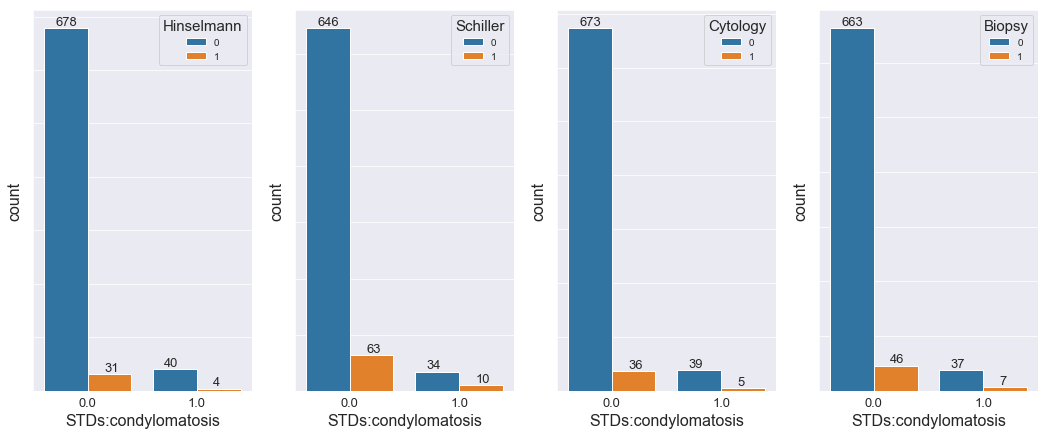

STDs:vaginal condylomatosis


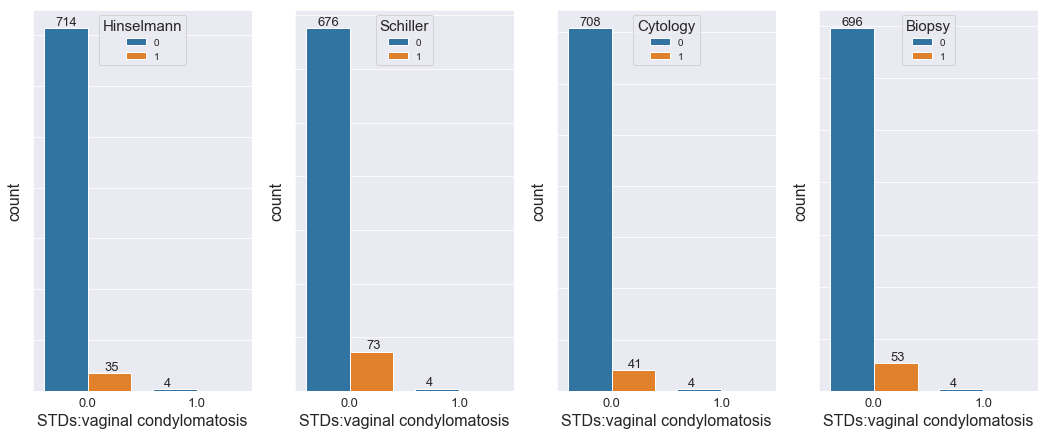

STDs:vulvo-perineal condylomatosis


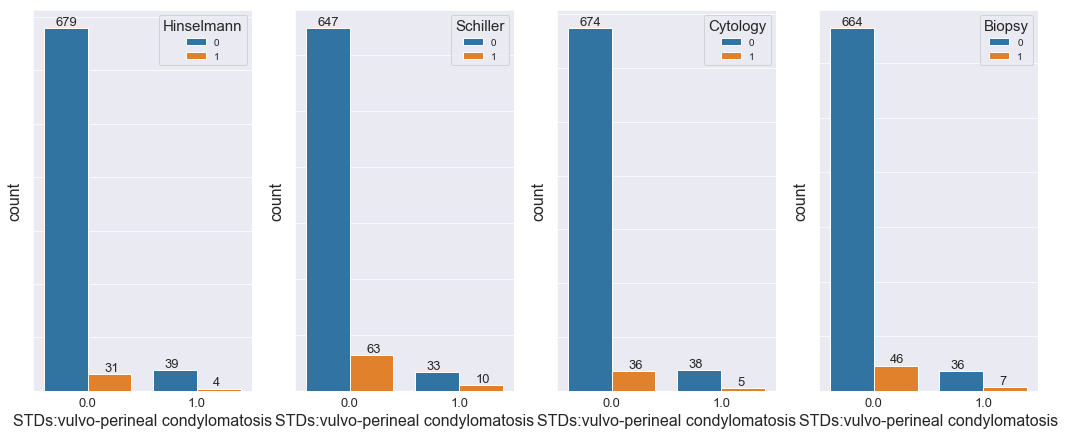

STDs:syphilis


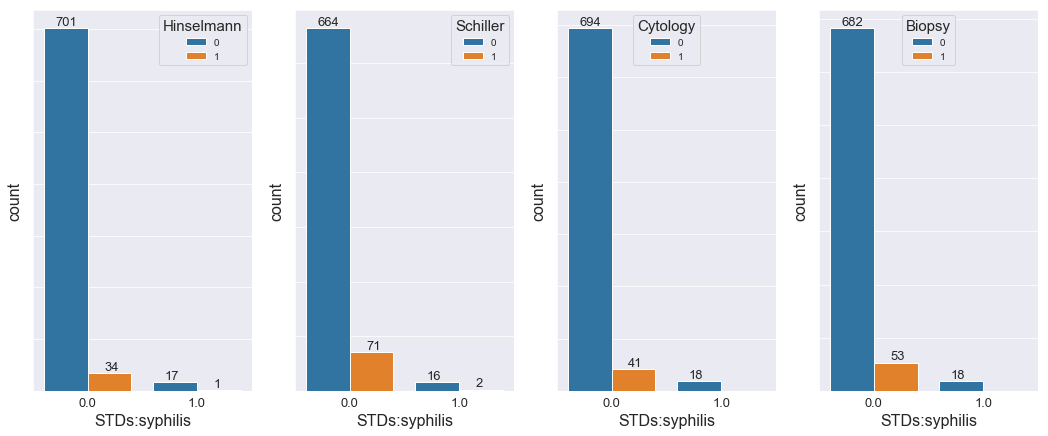

STDs:pelvic inflammatory disease


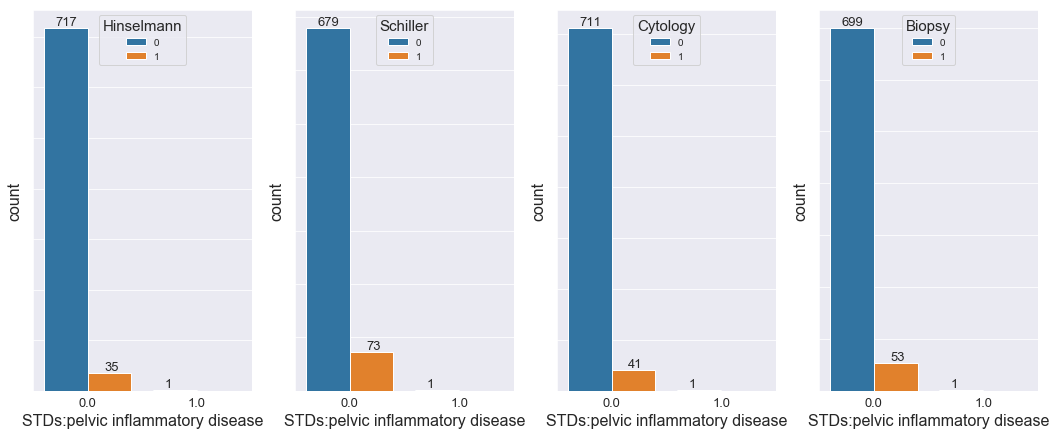

STDs:genital herpes


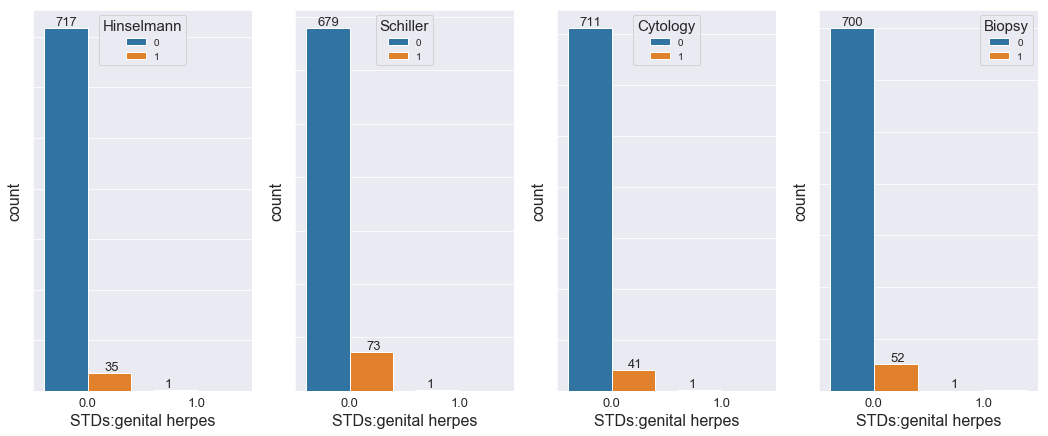

STDs:molluscum contagiosum


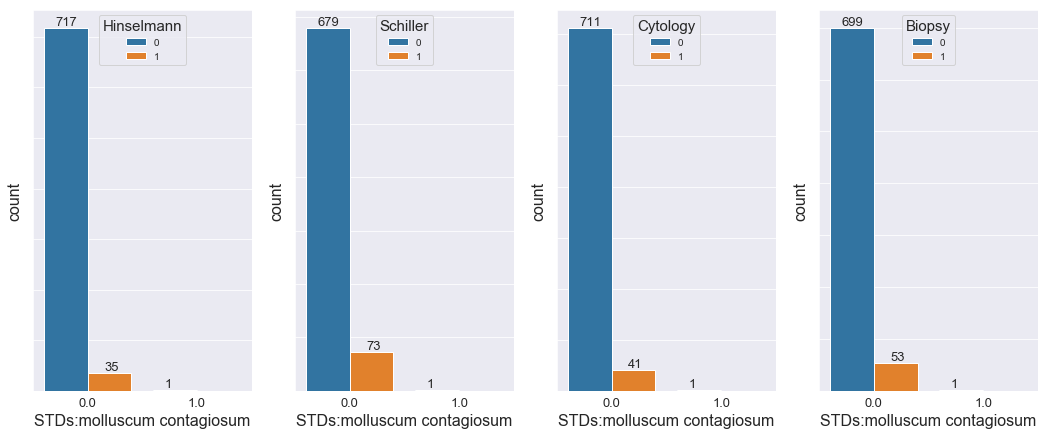

STDs:HIV


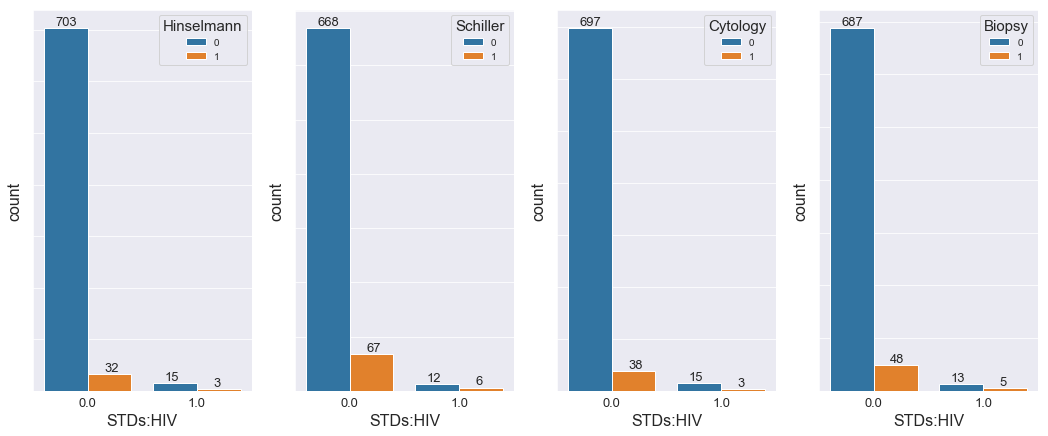

STDs:Hepatitis B


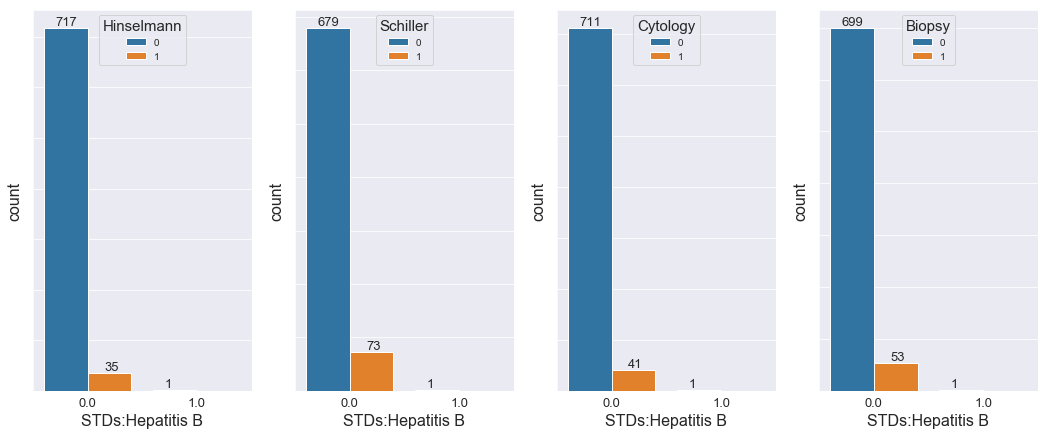

STDs:HPV


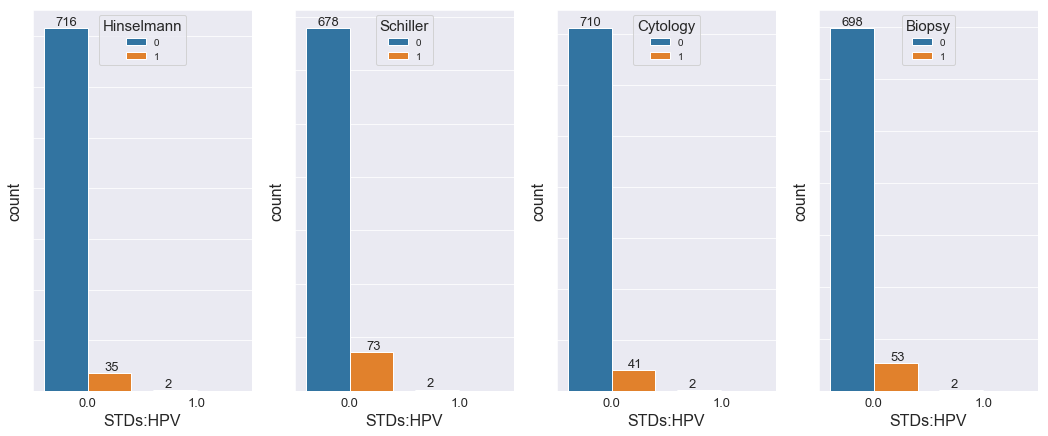

Dx:Cancer


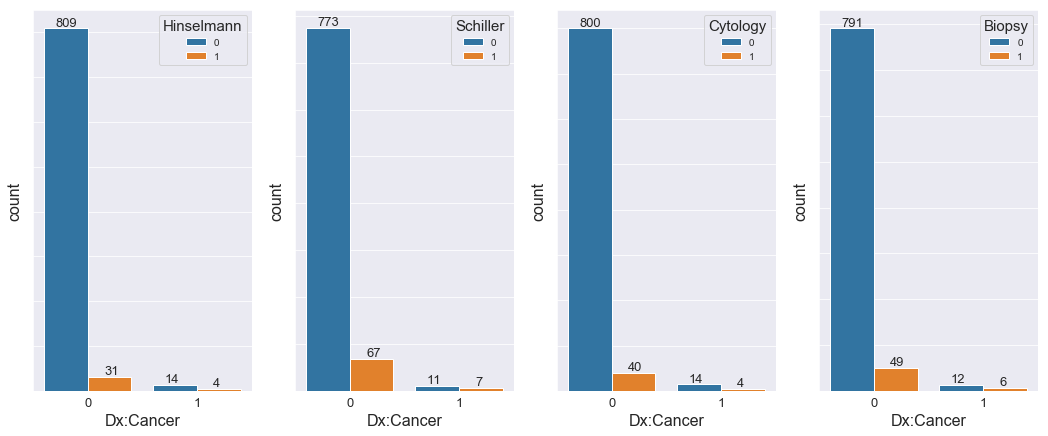

Dx:CIN


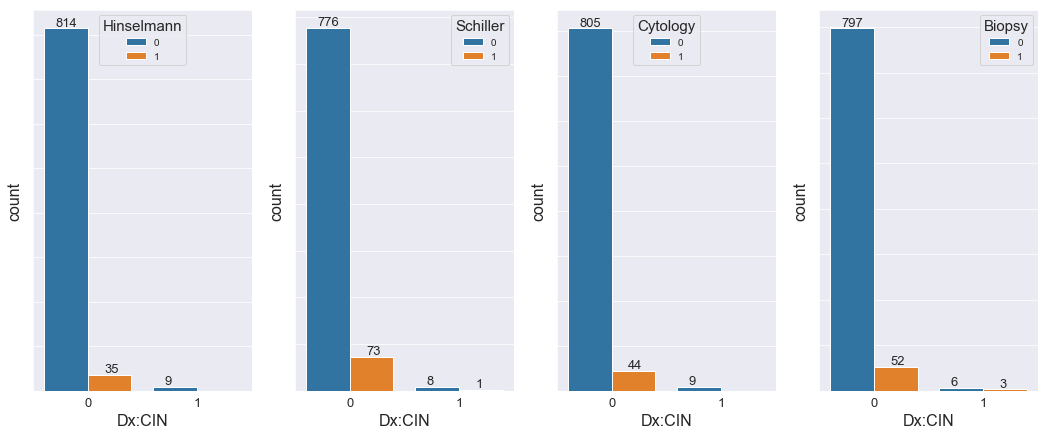

Dx:HPV


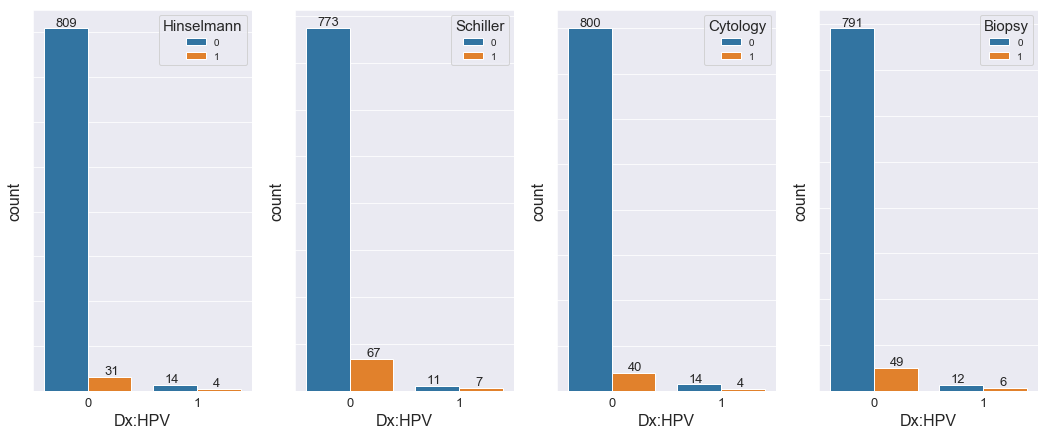

Dx:Result


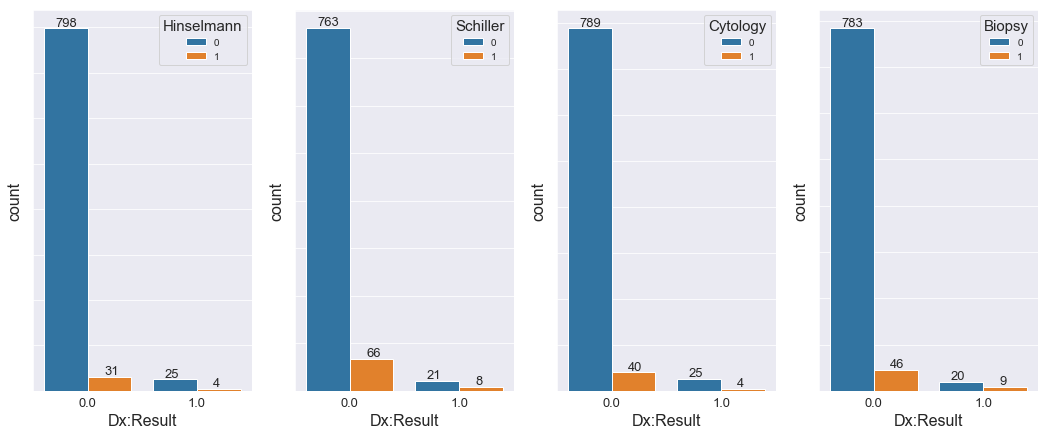

In [14]:
def create_plots(col, test, pos, ax):
    new_df = df[[col, test]].dropna().groupby([col, test])[col].count()
    val = [val for val in new_df]
    s = sns.countplot(df[col], hue=df[test], ax=ax[pos])
    ax[pos].annotate(val[0], xy=(-0.3, val[0]+5), fontsize=13)
    ax[pos].annotate(val[1], xy=(0.15, val[1]+5), fontsize=13)
    if(len(new_df)>2):
        ax[pos].annotate(val[2], xy=(0.7, val[2]+5), fontsize=13)
    if(len(new_df)>3):
        ax[pos].annotate(val[3], xy=(1.15, val[3]+5), fontsize=13)
    s.set_yticklabels(s.get_yticklabels(), fontdict={'fontsize':13})
    s.set_xticklabels(s.get_xticklabels(), fontdict={'fontsize':13})
    s.set_xlabel(s.get_xlabel(), fontsize=16)
    s.set_ylabel(s.get_ylabel(), fontsize=16)
    s.legend(title=test, title_fontsize=15)

def call_plots(col):
    f, ax = plt.subplots(nrows=1, ncols=4, figsize=(18, 7))
    create_plots(col, 'Hinselmann', 0, ax)
    create_plots(col, 'Schiller', 1, ax)
    create_plots(col, 'Cytology', 2, ax)
    create_plots(col, 'Biopsy', 3, ax)
    plt.show()

for col in categorical_features[0:18]:
    print(col)
    call_plots(col)

In [ ]:
# Inference

# Smokes: Most women(722 out of 845) do not smoke but the one who smokes have a higher chance
# of getting a cervical cancer.

# Hormonal Contraceptives: Most women(481 out of 750) uses contraceptive

# IUD: Most women(658 out of 741) do not use IUD

# STDs: Most women do not have STDs(674 out of 753) but the one who has, have a higher chance 
# of getting a cervical cancer.

# STDs:cervical condylomatosis & STDs:AIDS: None of the women have this STD

# STDs:vulvo-perineal condylomatosis: Most women(710 out of 753) do not have this STD, but the one who has, 
# have a higher chance of getting a cervical cancer.

# STDs:HIV: Most women(735 out of 753) do not have HIV but the one has, have a higher chance
# of getting a cervical cancer.

# Dx:Cancer: Most women(840 out of 858) were not diagnosed with any Cancer but the one who has, have a higher chance
# of getting a positive Schiller and Biopsy test(higher risk)

# Dx:HPV: Most women(840 out of 858) were not diagnosed with HPV but the one who tested positive have a higher chance
# of getting a positive Schiller and Biopsy test(higher risk)

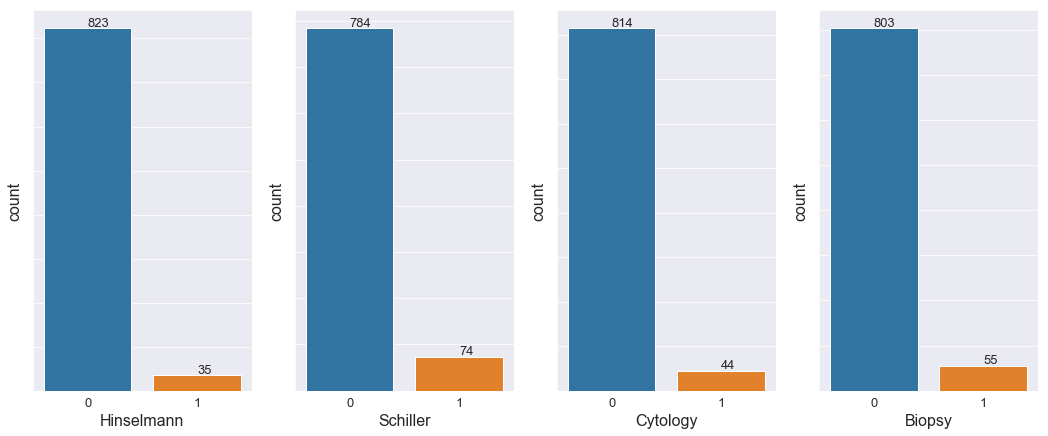

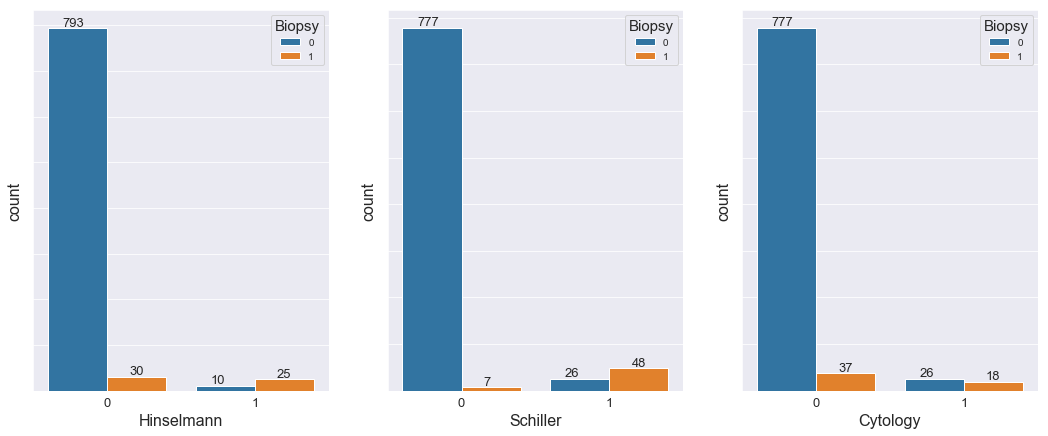

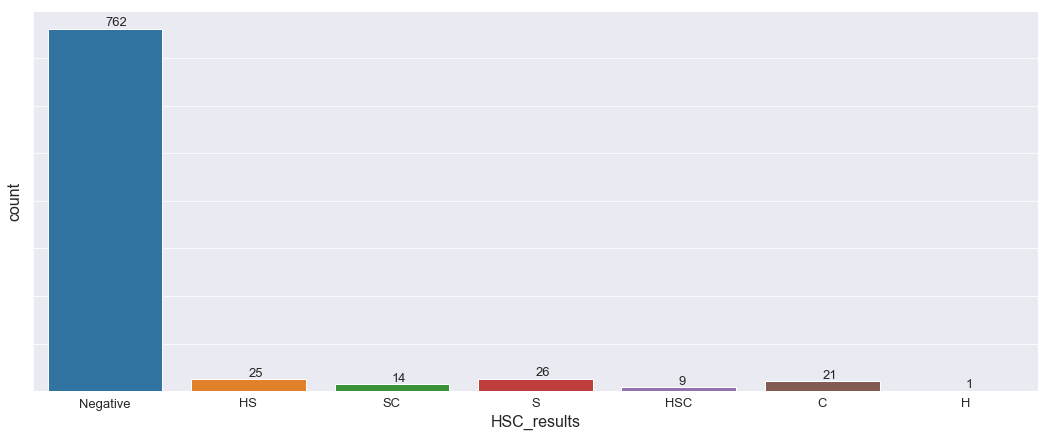

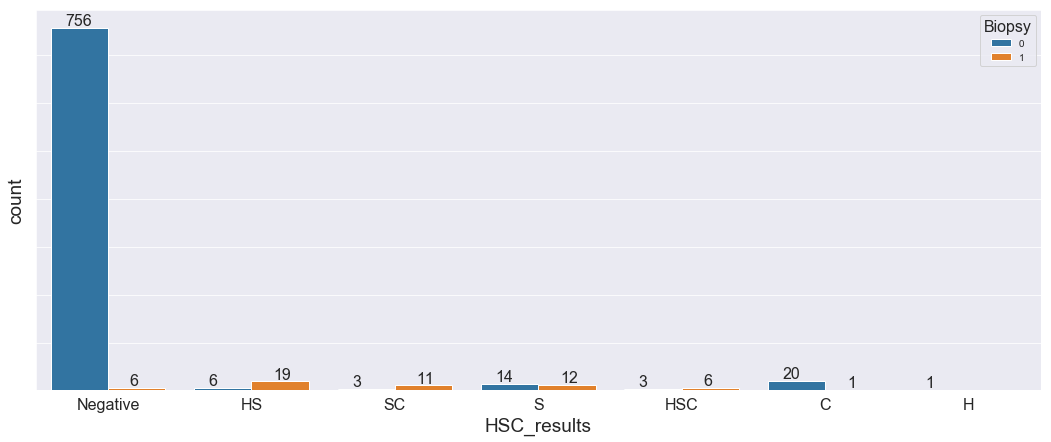

In [20]:
cols = ['Hinselmann', 'Schiller','Cytology', 'Biopsy']
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(18, 7))
for i,col in enumerate(cols):
    val = df[[col]].dropna().groupby([col])[col].count()
    s = sns.countplot(df[col], ax=ax[i])
    ax[i].annotate(val[0], xy=(0, val[0]+5), fontsize=13)
    ax[i].annotate(val[1], xy=(1, val[1]+5), fontsize=13)
    s.set_yticklabels(s.get_yticklabels(), fontdict={'fontsize':13})
    s.set_xticklabels(s.get_xticklabels(), fontdict={'fontsize':13})
    s.set_xlabel(s.get_xlabel(), fontsize=16)
    s.set_ylabel(s.get_ylabel(), fontsize=16)
# s.legend(title=test, title_fontsize=15)
plt.show()

cols = ['Hinselmann', 'Schiller','Cytology']
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 7))
for i,col in enumerate(cols):
    new_df = df[[col, 'Biopsy']].dropna().groupby([col, 'Biopsy'])[col].count()
    val = [val for val in new_df]
    s = sns.countplot(df[col], hue=df['Biopsy'], ax=ax[i])
    ax[i].annotate(val[0], xy=(-0.3, val[0]+5), fontsize=13)
    ax[i].annotate(val[1], xy=(0.15, val[1]+5), fontsize=13)
    if(len(new_df>2)):
        ax[i].annotate(val[2], xy=(0.7, val[2]+5), fontsize=13)
    if(len(new_df)>3):
        ax[i].annotate(val[3], xy=(1.15, val[3]+5), fontsize=13)
    s.set_yticklabels(s.get_yticklabels(), fontdict={'fontsize':13})
    s.set_xticklabels(s.get_xticklabels(), fontdict={'fontsize':13})
    s.set_xlabel(s.get_xlabel(), fontsize=16)
    s.set_ylabel(s.get_ylabel(), fontsize=16)
    s.legend(title='Biopsy', title_fontsize=15)
plt.show()


d = dict(df[['HSC_results']].dropna().groupby('HSC_results')['HSC_results'].count())
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 7))
s = sns.countplot(df['HSC_results'])
for i,label in enumerate(ax.get_xticklabels()):
    ax.annotate(d[label.get_text()], xy=(i, d[label.get_text()]+5), fontsize=13)
    s.set_yticklabels(s.get_yticklabels(), fontdict={'fontsize':13})
    s.set_xticklabels(s.get_xticklabels(), fontdict={'fontsize':13})
    s.set_xlabel(s.get_xlabel(), fontsize=16)
    s.set_ylabel(s.get_ylabel(), fontsize=16)
plt.show()


f, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 7))
d = dict(df[['HSC_results', 'Biopsy']].dropna().groupby(['HSC_results', 'Biopsy'])['HSC_results'].count())
val = [val for val in new_df]
s = sns.countplot(df['HSC_results'], hue=df['Biopsy'])
k=0
for i,label in enumerate(ax.get_xticklabels()):
    if (label.get_text(),0) in d.keys():
        ax.annotate(d[(label.get_text(),0)], xy=(i-0.3, d[(label.get_text(), 0)]+5), fontsize=16)
    if (label.get_text(),1) in d.keys():
        ax.annotate(d[(label.get_text(),1)], xy=(i+0.15, d[(label.get_text(),1)]+5), fontsize=16)
    s.set_yticklabels(s.get_yticklabels(), fontdict={'fontsize':16})
    s.set_xticklabels(s.get_xticklabels(), fontdict={'fontsize':16})
    s.set_xlabel(s.get_xlabel(), fontsize=19)
    s.set_ylabel(s.get_ylabel(), fontsize=19)
    s.legend(title='Biopsy', title_fontsize=16, loc='upper right')
plt.show()

In [ ]:
# Inference

# Hienselmann have 35 positive cases whereas Schiller have 74, Cytology have 44 and Biopsy have 55 positive cases

# From the second graph we came to know that Biopsy results are more positive where Hienselmann is positive(71.4%)
# than for Schiller(64.8%) and than for cytology(40.9%).

# Biopsy is positive even when Citoloy is negative (4.5%)
# Biopsy is positive even when Hienselmann is negative (3.6%)
# Biopsy is positive even when Schiller is negative (0.9%)
# Though this results are biased because of the effects of the other test results.

# Hienselmann & Schiller were positive for 25 cases out of which 19 were also tested positive for Biopsy(76%).
# Schiller and Cytology were positive for 14 cases out of which 11 were also tested positive for Biopsy(78.5%).
# Schiiller alone was positive for 26 cases out of which only 12 were tested positive for Biopsy(46.1%)
# Hienselmann, Cytology and Schiller were all positive for 9 cases out of which 6 were tested positive for Biopsy(66.66%). 

# Cytology test results alone didn't affect Biopsy test results.
# Hienselmann test alone observations are very less, and hence cannot make a statement.

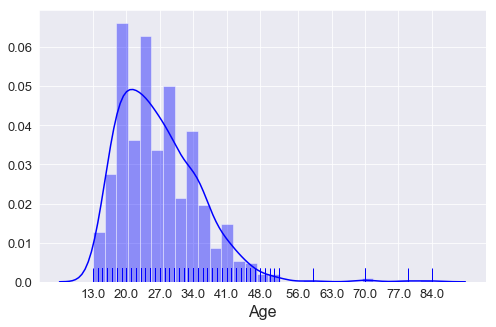

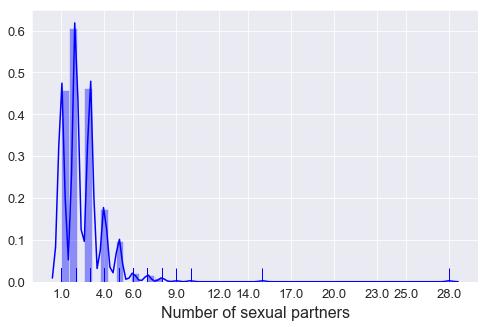

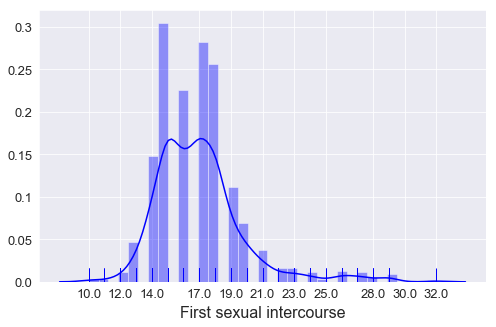

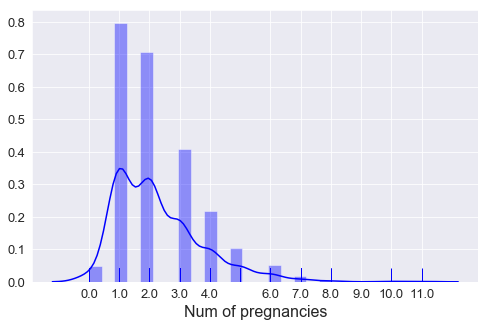

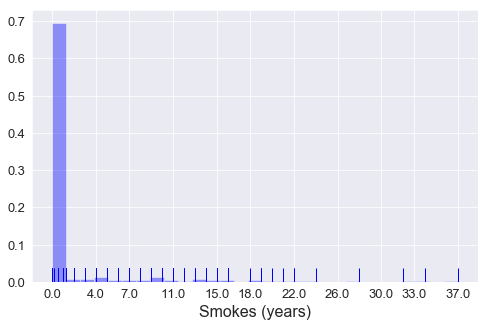

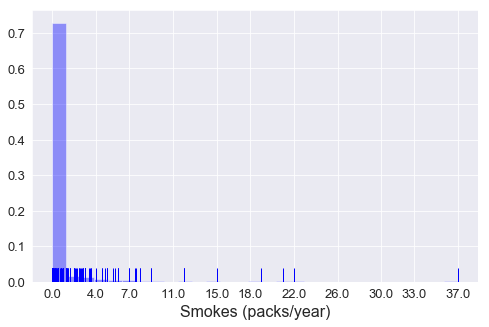

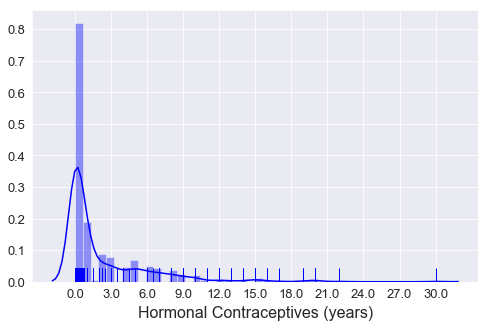

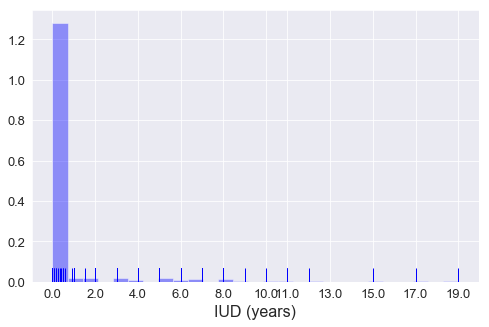

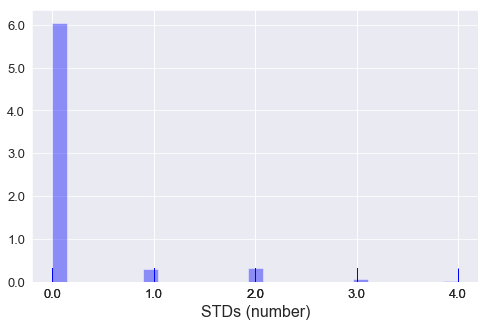

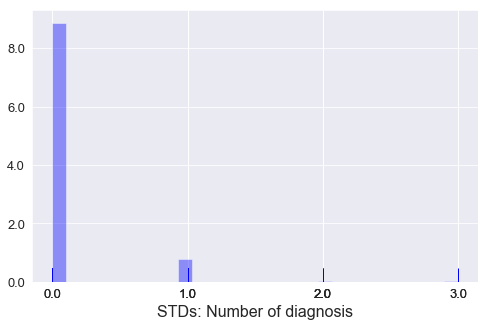

In [45]:
for col in df.columns:    
    if(col not in categorical_features):
        new_df = df[col].dropna().to_frame()
        count, bin_edges = np.histogram(new_df[col])
        bin_edges = np.round(bin_edges)
        fig, axs = plt.subplots(figsize=(8,5))
        s = sns.distplot(new_df[col], kde=True, color='blue', rug=True)
        s.set_xticks(bin_edges)
        s.set_yticklabels(np.round(s.get_yticks(), decimals=2), fontdict={'fontsize':13})
        s.set_xticklabels(bin_edges, fontdict={'fontsize':13})
        s.set_xlabel(s.get_xlabel(), fontsize=16)
        s.set_ylabel(s.get_ylabel(), fontsize=16)
plt.show()

In [958]:
# Inference

# Age: Most of the women have age between 20 to 40

# Number of sexual partners: Most of the women have 1 to 3 sexual partners

# First sexual intercourse: Most of the women had first sexual intercourse at age 15 to 18

# Num of pregnancies: Most women had 1 to 3 pregnancies

# Hormonal Contraceptives (years): Most omen used contraceptive mostly from past 0 to 3 years

In [14]:
for col in df.columns:    
    if((col == 'Age') | (col == 'Number of sexual partners') | (col == 'Num of pregnancies') | \
       (col == 'First sexual intercourse') | (col == 'Hormonal Contraceptives (years)')):
        print(col)
        print(df[col].value_counts())
        print("")

Age
23    54
18    50
21    46
20    45
19    44
24    39
25    39
26    38
28    37
30    35
17    35
29    33
27    33
22    30
35    29
33    28
31    27
36    24
34    24
16    23
15    21
32    18
37    17
41    13
40    12
39     9
38     9
45     6
44     6
42     6
43     5
14     5
46     3
48     2
49     2
52     2
70     2
84     1
79     1
47     1
50     1
51     1
59     1
13     1
Name: Age, dtype: int64

Number of sexual partners
2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
6.0       9
7.0       7
8.0       4
9.0       1
28.0      1
10.0      1
15.0      1
Name: Number of sexual partners, dtype: int64

First sexual intercourse
15.0    163
17.0    151
18.0    137
16.0    121
14.0     79
19.0     60
20.0     37
13.0     25
21.0     20
22.0      9
23.0      9
26.0      7
27.0      6
24.0      6
12.0      6
29.0      5
28.0      3
25.0      2
11.0      2
10.0      2
32.0      1
Name: First sexual intercourse, dtype: int64

Num of pregnancies
1.0     270
2.0 

(858, 35)


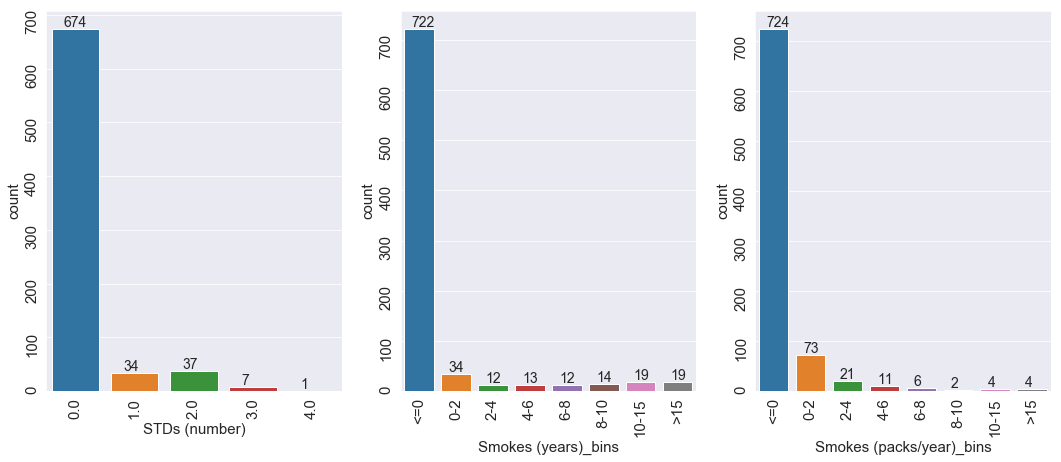

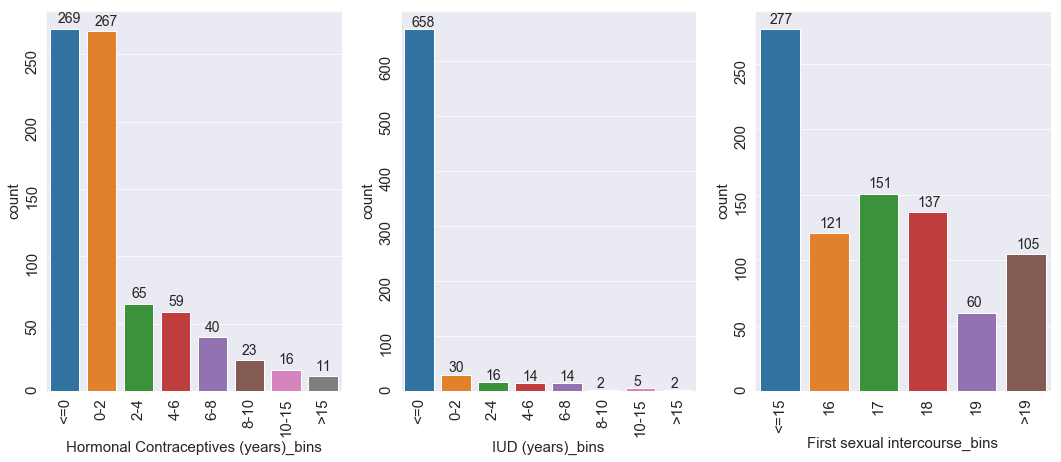

In [14]:
df_copy = df.copy()

df_copy['Smokes (years)_bins'] = pd.cut(df['Smokes (years)'].dropna(), bins=[-1,0,2,4,6,8,10,15,37],\
                                       labels=['<=0','0-2','2-4','4-6','6-8','8-10','10-15','>15'])
df_copy['Smokes (packs/year)_bins'] = pd.cut(df['Smokes (packs/year)'].dropna(), bins=[-1,0,2,4,6,8,10,15,37],\
                                       labels=['<=0','0-2','2-4','4-6','6-8','8-10','10-15','>15'])
df_copy['Hormonal Contraceptives (years)_bins'] = pd.cut(df['Hormonal Contraceptives (years)'].dropna(), bins=[-1,0,2,4,6,8,10,15,37],\
                                       labels=['<=0','0-2','2-4','4-6','6-8','8-10','10-15','>15'])
df_copy['IUD (years)_bins'] = pd.cut(df['IUD (years)'].dropna(), bins=[-1,0,2,4,6,8,10,15,37],\
                                       labels=['<=0','0-2','2-4','4-6','6-8','8-10','10-15','>15'])
df_copy['First sexual intercourse_bins'] = pd.cut(df['First sexual intercourse'].dropna(), bins=[9,15,16,17,18,19,37],\
                                            labels=['<=15','16','17','18','19', '>19'])
df_copy.drop(columns=['First sexual intercourse', 'Smokes (years)', 'Smokes (packs/year)', \
                      'Hormonal Contraceptives (years)','IUD (years)'], inplace=True)



total_features_copy = ['Age', 'Number of sexual partners', 'First sexual intercourse_bins', 'Num of pregnancies',\
                  'Smokes', 'Smokes (years)_bins', 'Smokes (packs/year)_bins', 'Hormonal Contraceptives',\
                  'Hormonal Contraceptives (years)_bins', 'IUD', 'IUD (years)_bins', 'STDs', 'STDs (number)',\
                  'STDs:condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',\
                  'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes',\
                  'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV',\
                  'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx:Result', 'Hinselmann', 'Schiller',\
                  'Cytology', 'HSC_results', 'Risk Assessment(HSC)', 'Biopsy', 'HSCB_results']


df_copy = df_copy[total_features_copy]
print(df_copy.shape)

def count_plot(columns, n):
    f, ax = plt.subplots(nrows=1, ncols=n, figsize=(18, 7))
    for i,col in enumerate(columns):
        d = dict(df_copy[[col]].groupby(col)[col].count())
        s = sns.countplot(df_copy[col], ax=ax[i])
        s.tick_params(labelsize=15, rotation=90)
        s.set_xlabel(s.get_xlabel(), fontsize=15)
        s.set_ylabel(s.get_ylabel(), fontsize=15)
        new_d = {str(key):value for key, value in d.items()}
        for j,label in enumerate(s.get_xticklabels()):
            s.annotate(new_d[label.get_text()], xy=(j-0.2, new_d[label.get_text()]+4),fontsize=14)
    plt.show()
    

count_plot(['STDs (number)', 'Smokes (years)_bins', 'Smokes (packs/year)_bins'], 3)
count_plot(['Hormonal Contraceptives (years)_bins', 'IUD (years)_bins', 'First sexual intercourse_bins'], 3)


In [ ]:
# Inference

# STDs (number): Most women do not have STDs but some have 1 or 2 STDs
# Hormonal Contraceptives (years)_bins: Most women do not use contraceptive or mostly using it from last 2 years
# First sexual intercourse_bins: Most of the women had first sexual intercourse at age <=15

In [60]:
# for col in df_copy.columns:    
#     if((col not in categorical_features) & (col != 'Age') & (col != 'Number of sexual partners') & \
#        (col != 'Num of pregnancies')):
#         print(col)
#         print(df_copy[col].value_counts())
#         print("")        

First sexual intercourse_bins
<=15    277
17      151
18      137
16      121
>19     105
19       60
Name: First sexual intercourse_bins, dtype: int64

Smokes (years)_bins
<=0      722
0-2       34
>15       19
10-15     19
8-10      14
4-6       13
6-8       12
2-4       12
Name: Smokes (years)_bins, dtype: int64

Smokes (packs/year)_bins
<=0      724
0-2       73
2-4       21
4-6       11
6-8        6
>15        4
10-15      4
8-10       2
Name: Smokes (packs/year)_bins, dtype: int64

Hormonal Contraceptives (years)_bins
<=0      269
0-2      267
2-4       65
4-6       59
6-8       40
8-10      23
10-15     16
>15       11
Name: Hormonal Contraceptives (years)_bins, dtype: int64

IUD (years)_bins
<=0      658
0-2       30
2-4       16
6-8       14
4-6       14
10-15      5
>15        2
8-10       2
Name: IUD (years)_bins, dtype: int64

STDs (number)
0.0    674
2.0     37
1.0     34
3.0      7
4.0      1
Name: STDs (number), dtype: int64

STDs: Number of diagnosis
0    787
1     68
2

In [59]:
# df_copy[[ 'Number of sexual partners', 'Biopsy', 'Age']].dropna().groupby(['Age', 'Number of sexual partners', 'Biopsy'])['Age'].count()

Number of sexual partners


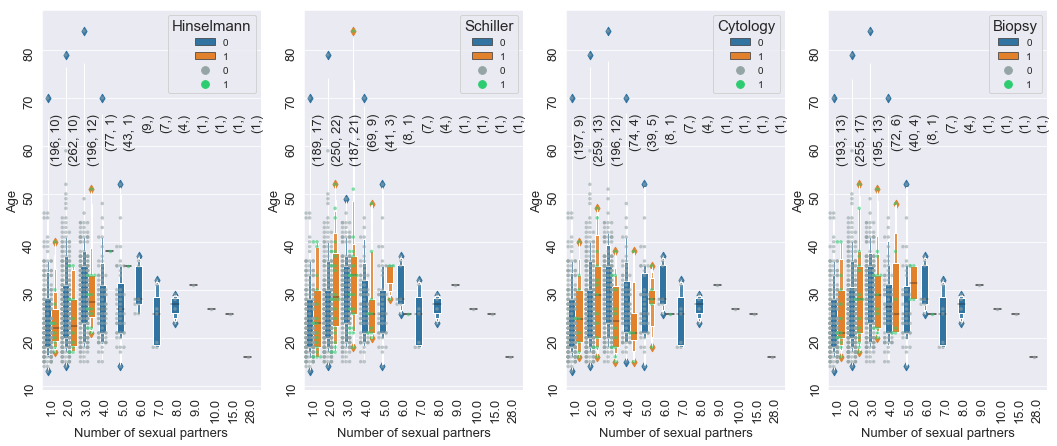

First sexual intercourse_bins


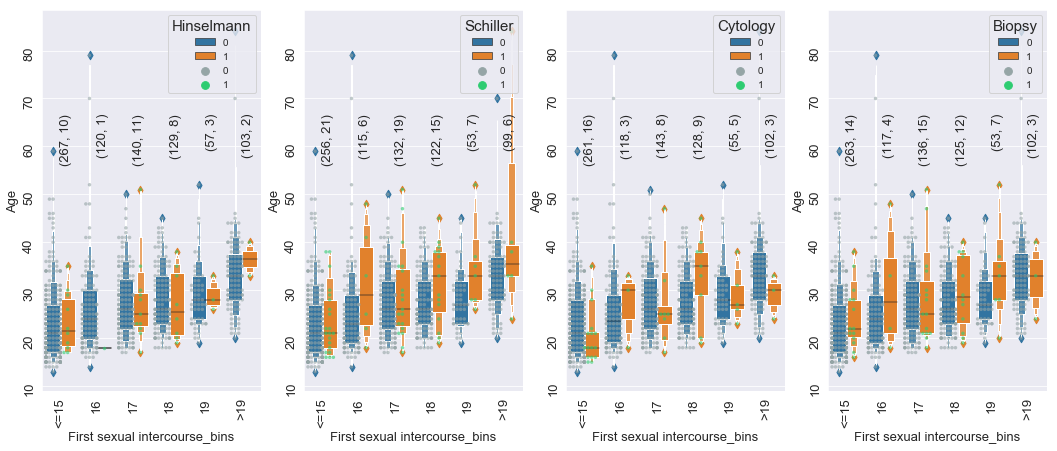

Num of pregnancies


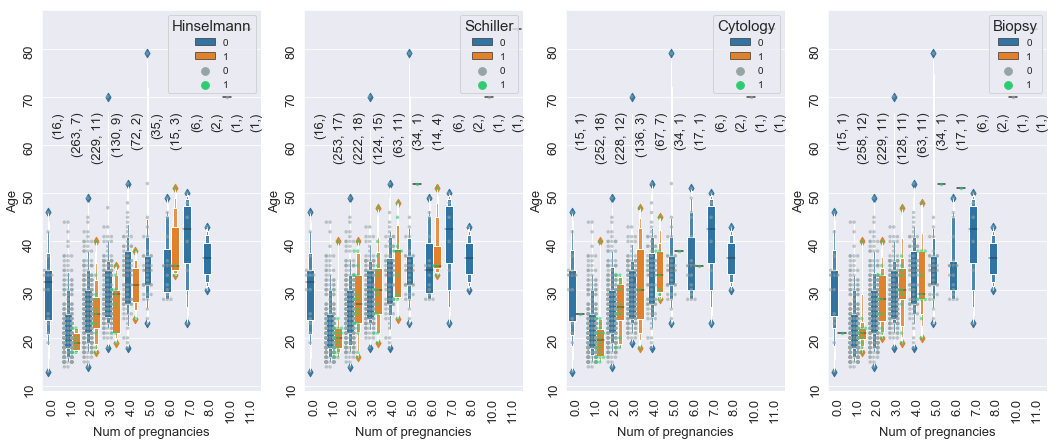

Smokes (years)_bins


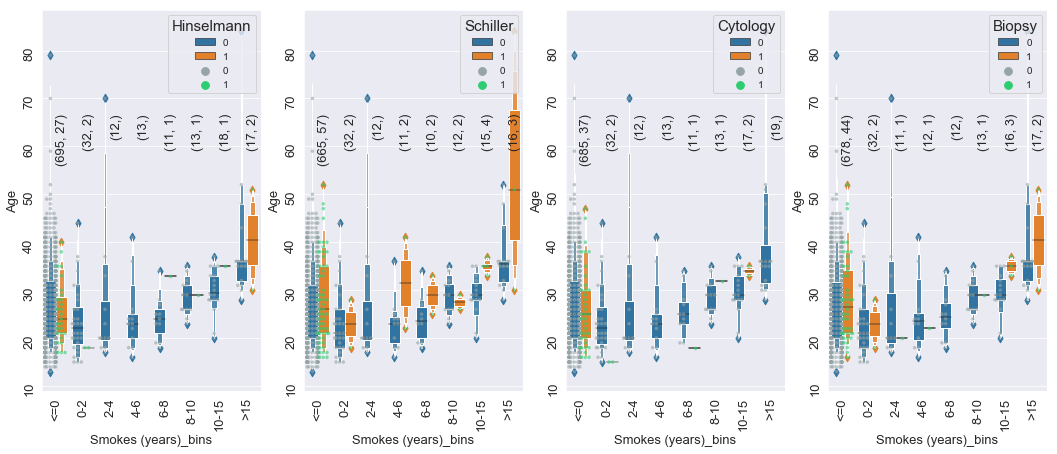

Smokes (packs/year)_bins


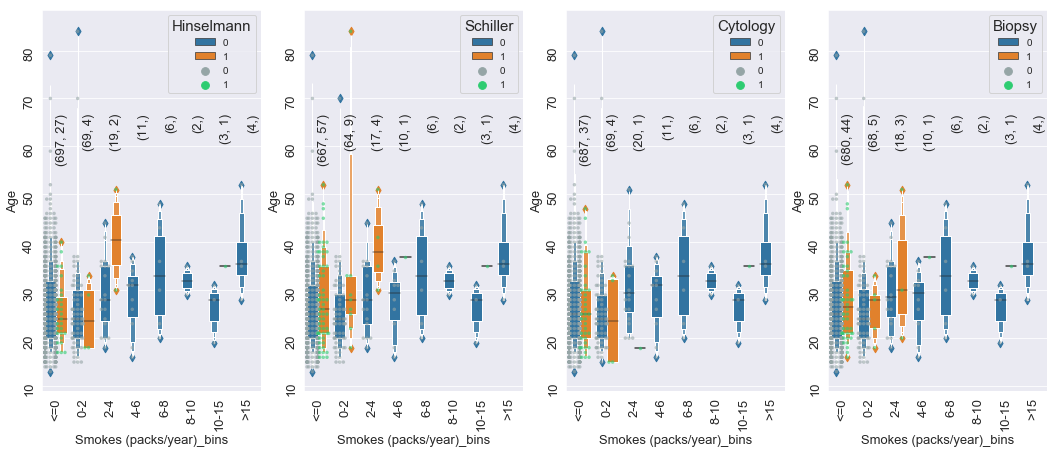

Hormonal Contraceptives (years)_bins


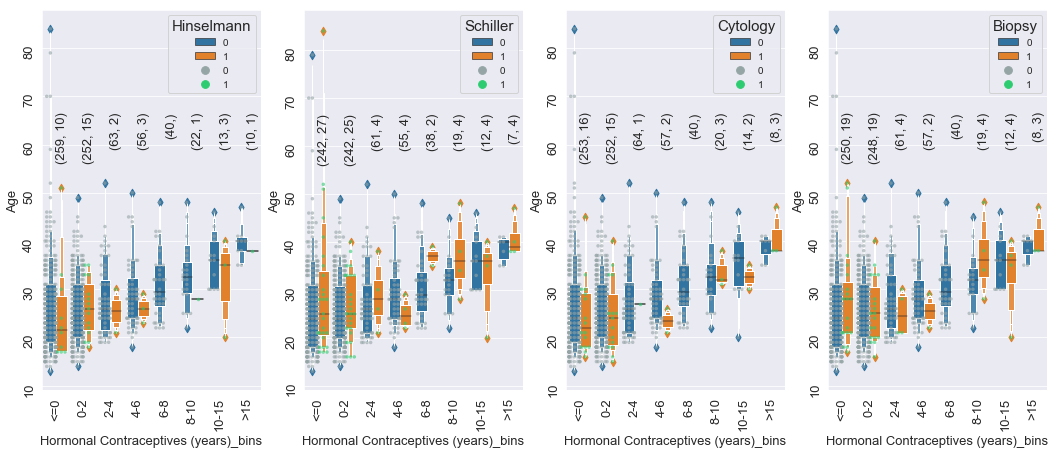

IUD (years)_bins


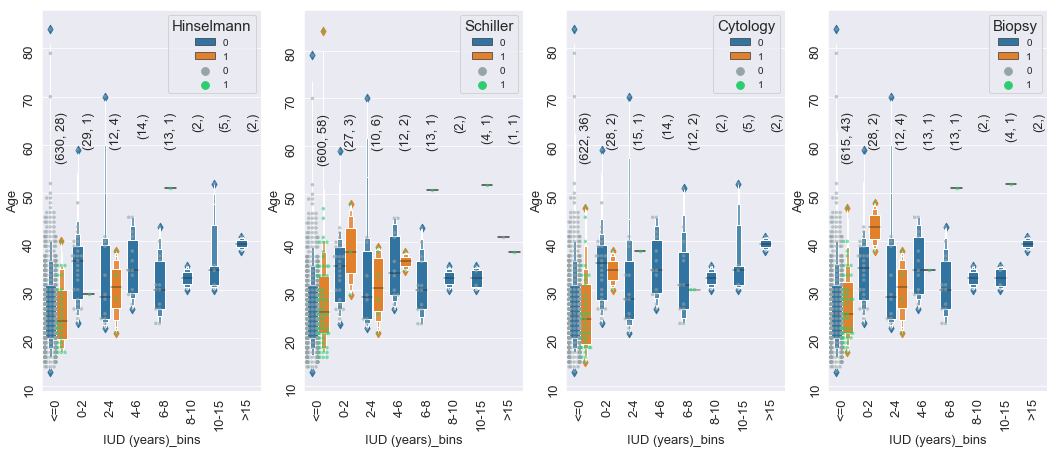

STDs (number)


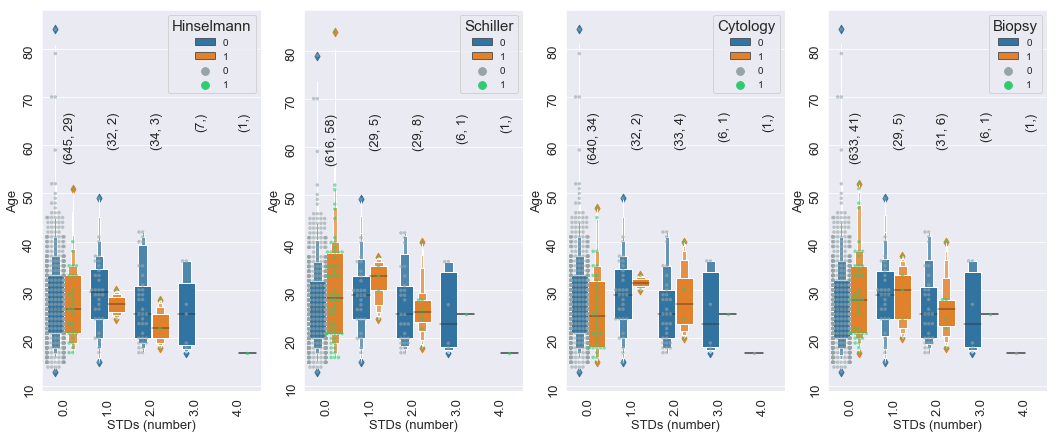

STDs: Number of diagnosis


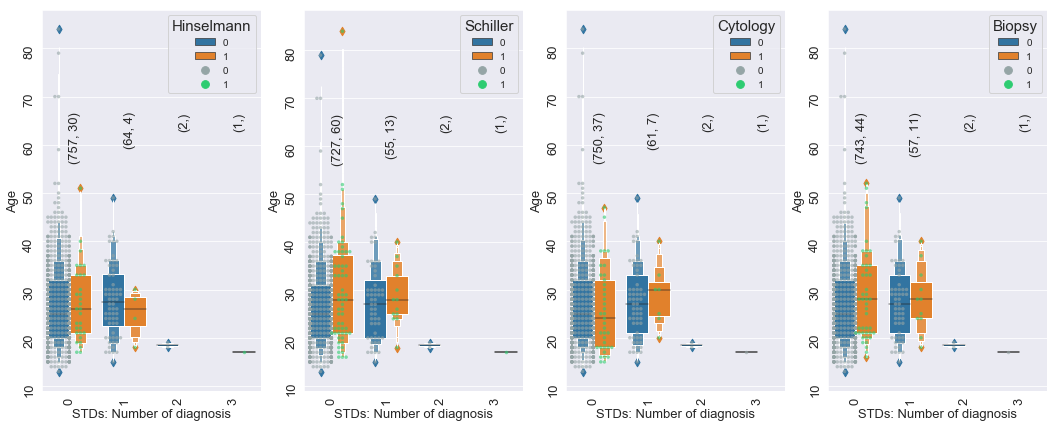

In [55]:
def create_pairplots(x1, y1, test, axs):
    dummy_df = df_copy[[x1, y1, test]].dropna().round(decimals=1)
    s = sns.boxenplot(x=x1, y=y1, hue=test, ax=axs, data=dummy_df)
    s = sns.swarmplot(x=x1, y=y1, hue=test, ax=axs, data=dummy_df, alpha=0.6, size=3.5,\
                     dodge=True, palette=sns.color_palette(['#95a5a6', '#2ecc71']))
    
    d=dict(df_copy[[ x1, test, y1]].dropna().groupby([x1, test])[y1].count())
    new_d={}
    for key,value in d.items():
        key=str(key[0])
        if key not in new_d.keys():
            new_d[key]= [value]
        else:
            new_d[key].append(value)
    new_d = {str(key):tuple(value) for key,value in new_d.items()}

    for j,label in enumerate(s.get_xticklabels()):
        s.annotate(new_d[label.get_text()], xy=(j, 65), rotation=90, fontsize=13)

    s.set_xlabel(s.get_xlabel(), fontsize=13)
    s.tick_params(labelsize=13, rotation=90)    
    s.set_ylabel(y1, fontsize=13, rotation=90)
    s.legend(title=test, title_fontsize=15, loc='upper right')

def call_pair_plots(col, y):
    f, ax = plt.subplots(nrows=1, ncols=4, figsize=(18, 7))
    create_pairplots(col, y, 'Hinselmann', ax[0])
    create_pairplots(col, y, 'Schiller', ax[1])
    create_pairplots(col, y, 'Cytology', ax[2])
    create_pairplots(col, y, 'Biopsy', ax[3])
    plt.show()

    
for col in df_copy.columns:
    if (col not in categorical_features) &(col!='Age'):
        print(col)
        call_pair_plots(col, 'Age')

In [647]:
# Inference

# With increase in age number of sexual partners encountered also increased but mostly had 1 to 3 sexual partners.
# Women with 4 to 6 sexual partners are at higher risks of getting a cervical cancer.
# We do not have many observations where sexual encounters is greater than 6 hence can't predict ccurately for those.
# Increase in the number of sexual partners, increases chances of getting cervical cancer.
# (6.3% 6.25% 6.25% 7.6% 9% 11.1%) -> (1 to 6)

# With age, number of pregnancies increased but mostly had 1 to 3 pregnancies.
# Women with higher number of pregnancies(3 to 4) have a higher chance of getting a cervical cancer.
# We do not have many observations where number of pregnancies is greater than 4 hence can't predict ccurately for those.
# Increase in the number of pregnancies, increases chances of getting cervical cancer.
# (6.25% 4.4% 4.5% 7.9% 14.8% 2.8%) -> (0 to 5)

# Most women do not have STDs, but still they are at a risk of getting cervical cancer.
# We do not have many observations where number of STDs is greater than 2 hence can't predict ccurately for those.
# Increase in the number of STDs, increases chances of getting cervical cancer.
# (6% 14.7% 16.2% 14.28%) -> (0 to 3)

# Women who smoke are at a higher chance of getting a cervical cancer. 

# Women who are using contraceptive from many years are at higher risk of getting a cervical cancer.
# From graph Women using contraceptive from past 8 to 15 years are at higher risk. 
# (17% 25%  27.2%) -> (8 to 15)

# Most women did not use IUD.
# IUD seems to be a safer choice than hormonal contraceptive.

# From graph it sems women who had first sexual intercourse at age 17-19 are at higher risk of getting cervical cancer
# and women are predominantly from age group 20 to 35 but still it is not concrete.
# (5% 3.3% 9.9% 8.7% 11.8%) -> (15 to 19)

# Support:
# https://www.cancercenter.com/cancer-types/cervical-cancer/risk-factors
# https://www.mayoclinic.org/diseases-conditions/cervical-cancer/symptoms-causes/syc-20352501
# https://www.mariekeating.ie/cancer-information/cervical-cancer/?gclid=Cj0KCQjwn7j2BRDrARIsAHJkxmz_3-nmeIwa3XMt3QCNnwWcHDq9i_Y72nUeI2vZb8GPnHnqV5pAjpYaAllGEALw_wcB
# https://search-proquest-com.ucc.idm.oclc.org/docview/2038570731?pq-origsite=summon
# https://www.cancer.gov/about-cancer/causes-prevention/risk/hormones/oral-contraceptives-fact-sheet
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1122763/
# https://www.cancer.gov/about-cancer/causes-prevention/risk/hormones/oral-contraceptives-fact-sheet#q6


Number of sexual partners


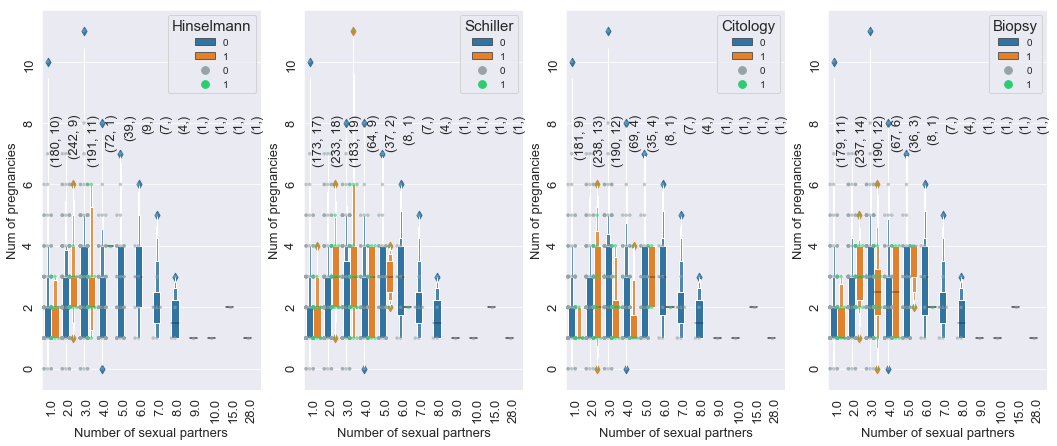

First sexual intercourse_bins


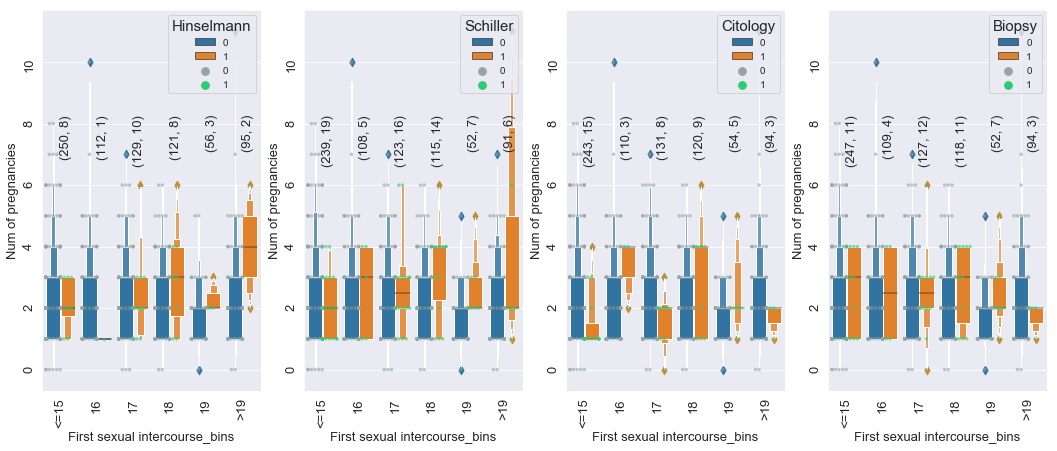

Smokes (years)_bins


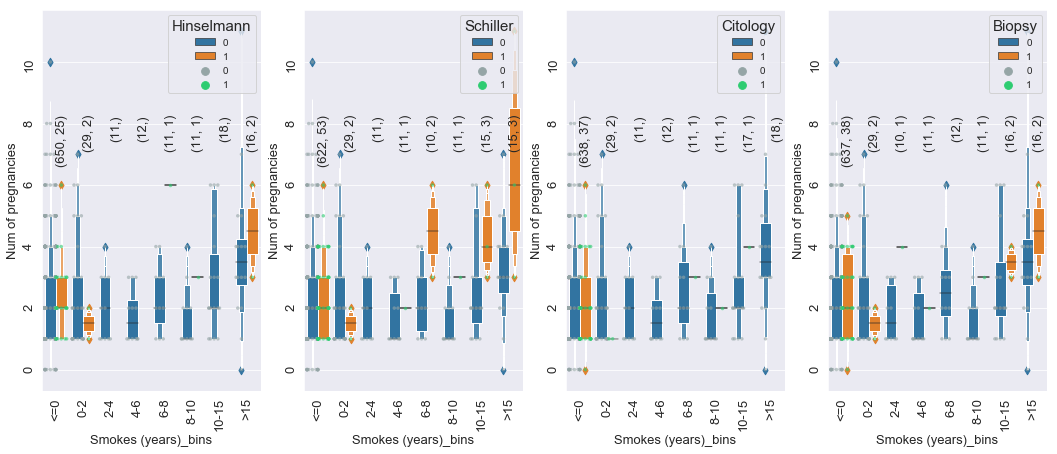

Smokes (packs/year)_bins


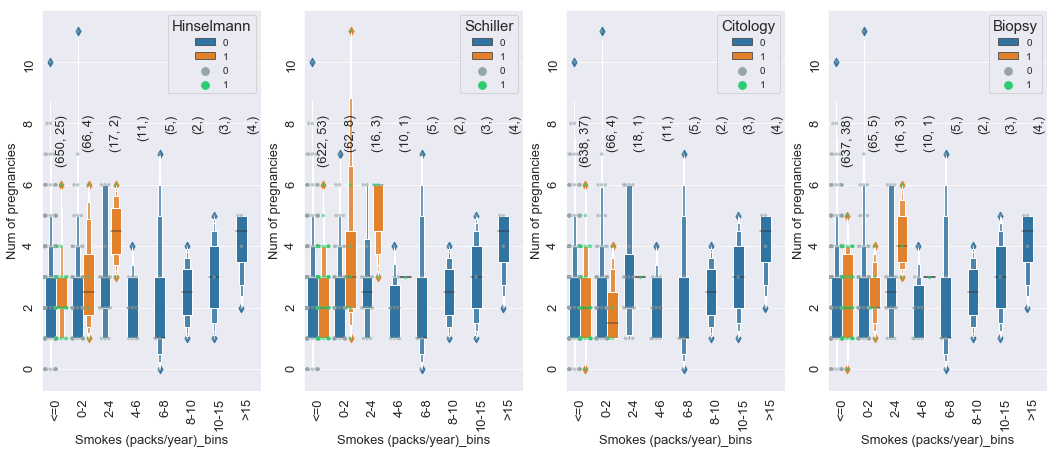

Hormonal Contraceptives (years)_bins


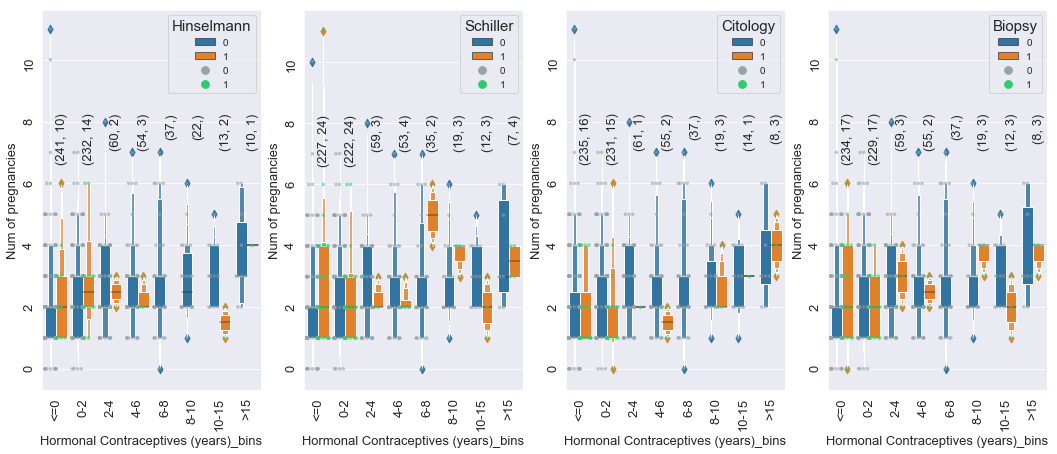

IUD (years)_bins


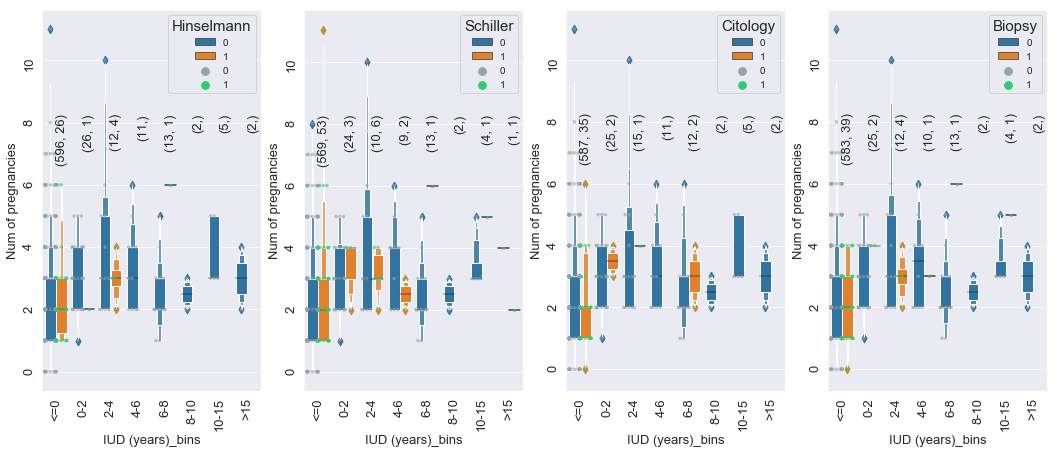

STDs (number)


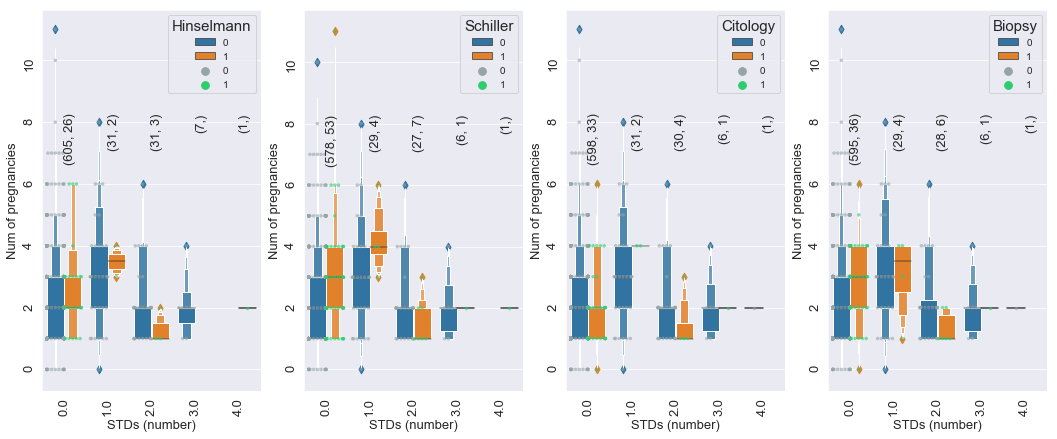

STDs: Number of diagnosis


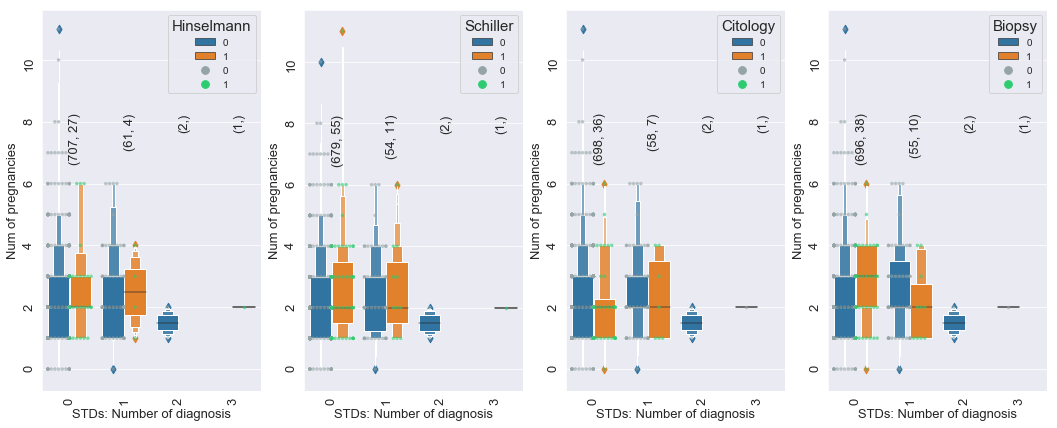

In [41]:
def create_pairplots(x1, y1, test, axs):
    dummy_df = df_copy[[x1, y1, test]].dropna().round(decimals=2)
    s = sns.boxenplot(x=x1, y=y1, hue=test, ax=axs, data=dummy_df)
    s = sns.swarmplot(x=x1, y=y1, hue=test, ax=axs, data=dummy_df, alpha=0.6, size=3.5,\
                     dodge=True,palette=sns.color_palette(['#95a5a6', '#2ecc71']))

    d=dict(df_copy[[ x1, test, y1]].dropna().groupby([x1, test])[y1].count())
    new_d={}
    for key,value in d.items():
        key=str(key[0])
        if key not in new_d.keys():
            new_d[key]= [value]
        else:
            new_d[key].append(value)
    new_d = {str(key):tuple(value) for key,value in new_d.items()}

    for j,label in enumerate(s.get_xticklabels()):
        s.annotate(new_d[label.get_text()], xy=(j, 8), rotation=90, fontsize=13)

    s.set_xlabel(s.get_xlabel(), fontsize=13)
    s.tick_params(labelsize=13, rotation=90)    
    s.set_ylabel(y1, fontsize=13, rotation=90)
    s.legend(title=test, title_fontsize=15, loc='upper right')

def call_pair_plots(col, y):
    f, ax = plt.subplots(nrows=1, ncols=4, figsize=(18, 7))
    create_pairplots(col, y, 'Hinselmann', ax[0])
    create_pairplots(col, y, 'Schiller', ax[1])
    create_pairplots(col, y, 'Cytology', ax[2])
    create_pairplots(col, y, 'Biopsy', ax[3])
    plt.show()

    
for col in df_copy.columns:
    if (col not in categorical_features) &(col!='Num of pregnancies') & (col!='Age'):
        print(col)
        call_pair_plots(col, 'Num of pregnancies')


In [161]:
# Inference

# Women with higher number of sexual partners(2 to 4) are at higher risk of getting cervical cancer.

# Women with more no. of STDs are at risk of getting cervical cancer.
# (5.7% 12.1% 17.64% 14.2%) -> (0 to 3)


# Women who smoke and who have more number of pregnancies are at higher risk of getting cervical cancer.

# Women who are using contraceptive from many years have a higher risk of getting cervical cancer.
# (13.6% 20% 27.2%) -> (8 to 15)

# Women using IUD for 2 to 4 yers are at higher risk compared to other women using IUD

# Women with more number of pregnancies and sexual intercourse at an early age are at higher risk 
# of getting cervical cancer.
# 4.2% 3.5% 8.6% 8.5% 11.8% -> (15 to 19)

# Support:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2670004/
# https://onlinelibrary.wiley.com/doi/full/10.1002/ijc.26250

[42  4  5  3  1  0  0] [ 0  5 10 15 20 25 30 35]


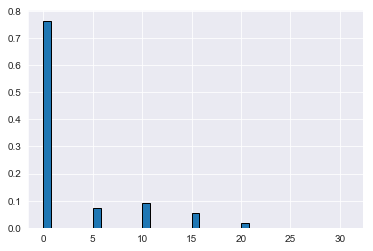

In [23]:
# df.loc[df['Biopsy'] == 1, 'Hormonal Contraceptives (years)'].dropna().shape

bins = np.arange(0,40,5)

hist, edges = np.histogram(df.loc[df['Biopsy'] == 1, 'Hormonal Contraceptives (years)'].dropna(), bins)
print(hist, edges)
freq = hist/float(hist.sum())

plt.bar(bins[:-1],freq, align="edge", ec="k" )

plt.show()

sns.distplot(df.loc[:, 'Hormonal Contraceptives (years)'].dropna(), kde=True, bins=22, norm_hist = True, hist=True)
# df_copy.loc[df_copy['Biopsy'] == 0, 'Hormonal Contraceptives (years)_bins']

First sexual intercourse_bins


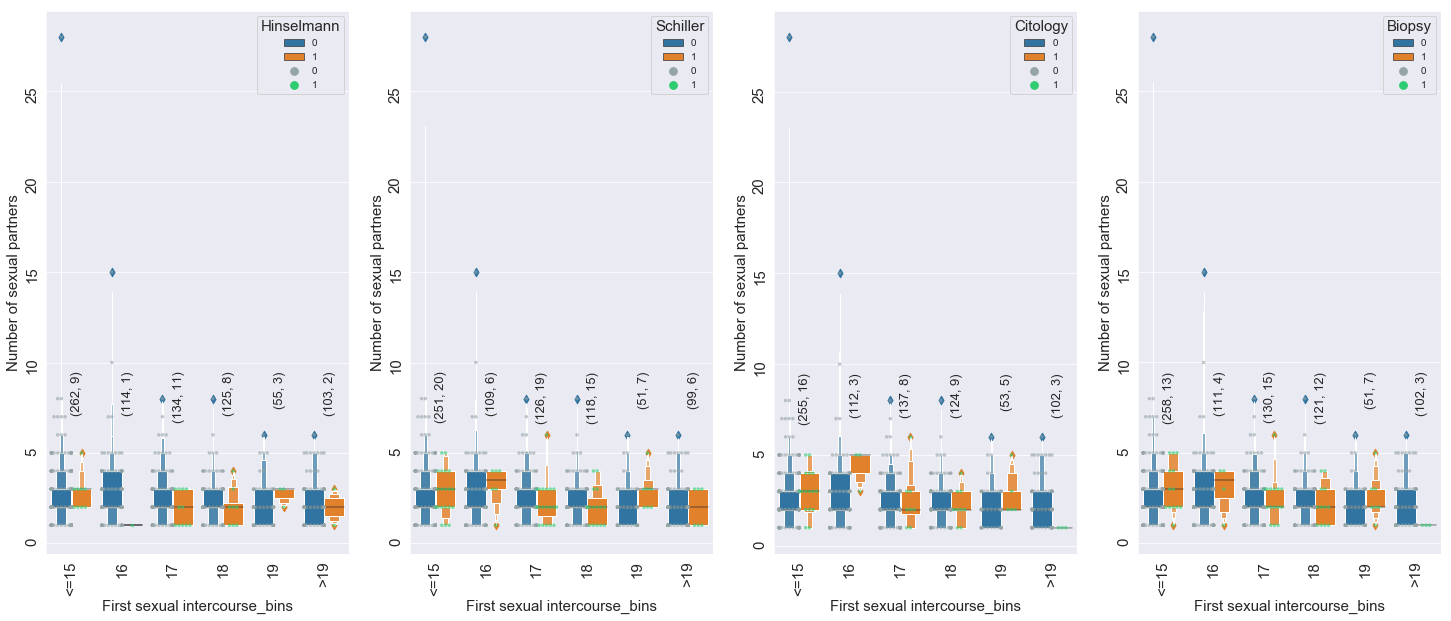

Smokes (years)_bins


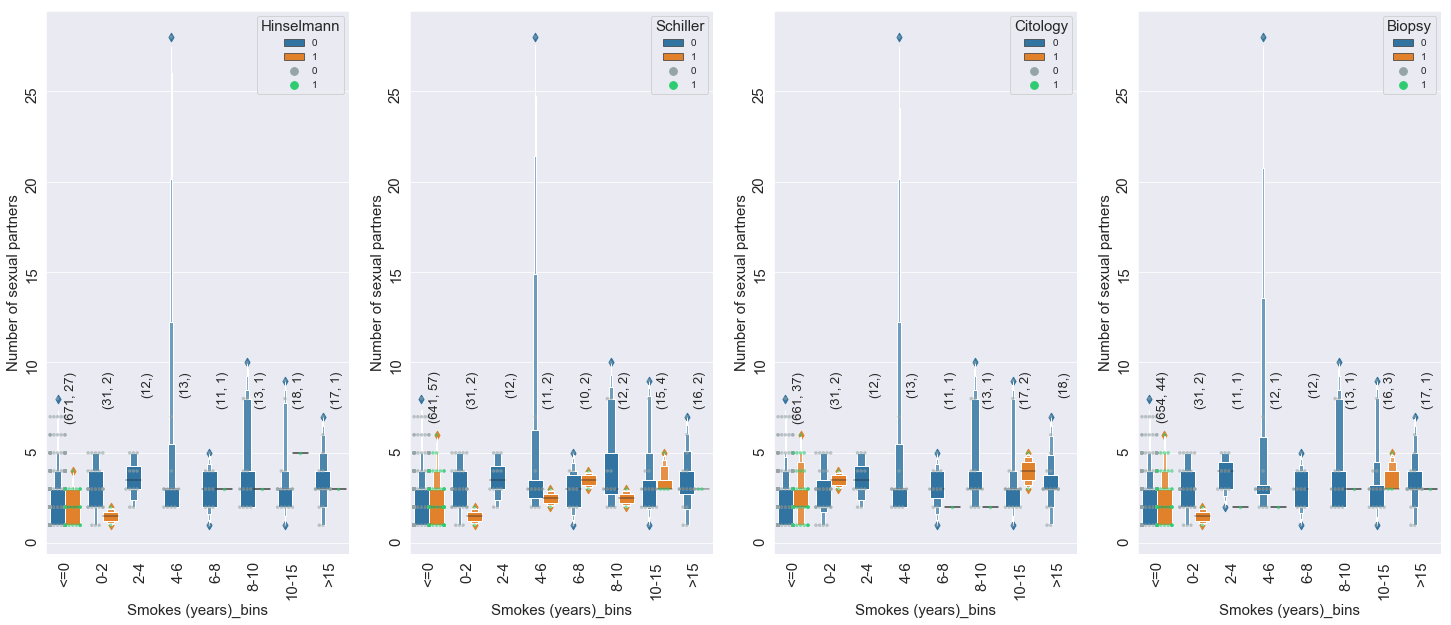

Smokes (packs/year)_bins


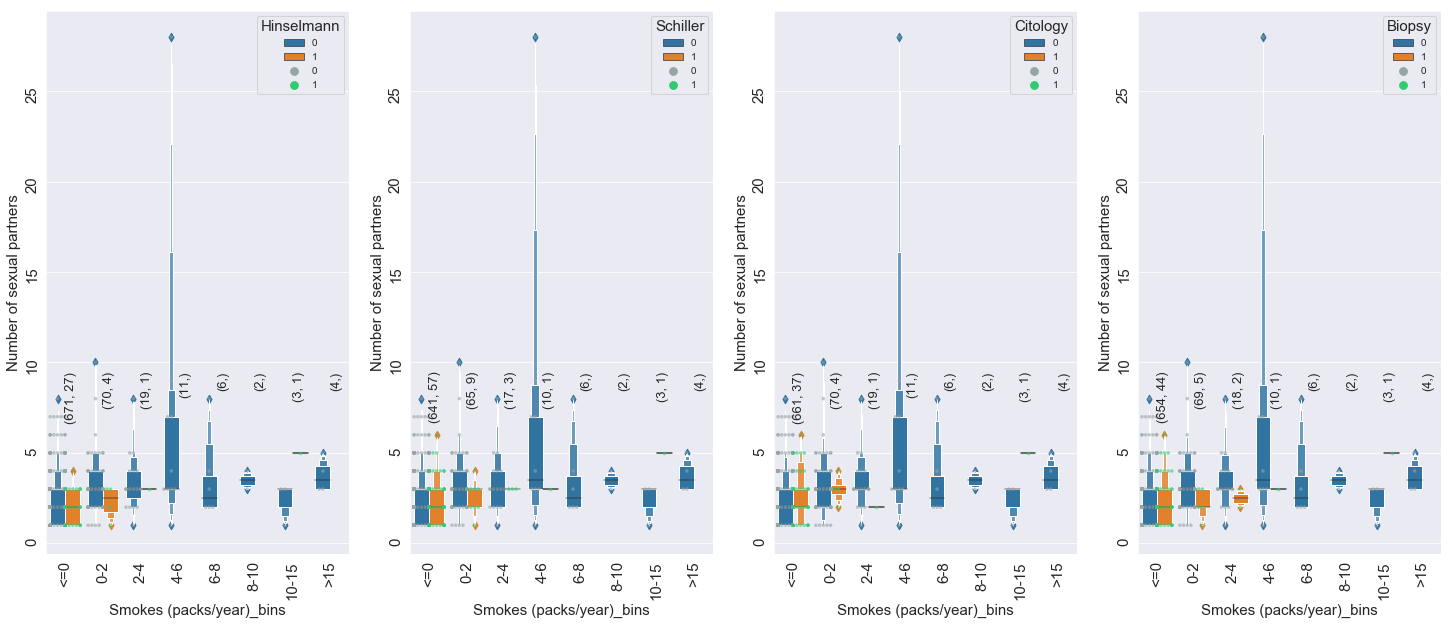

Hormonal Contraceptives (years)_bins


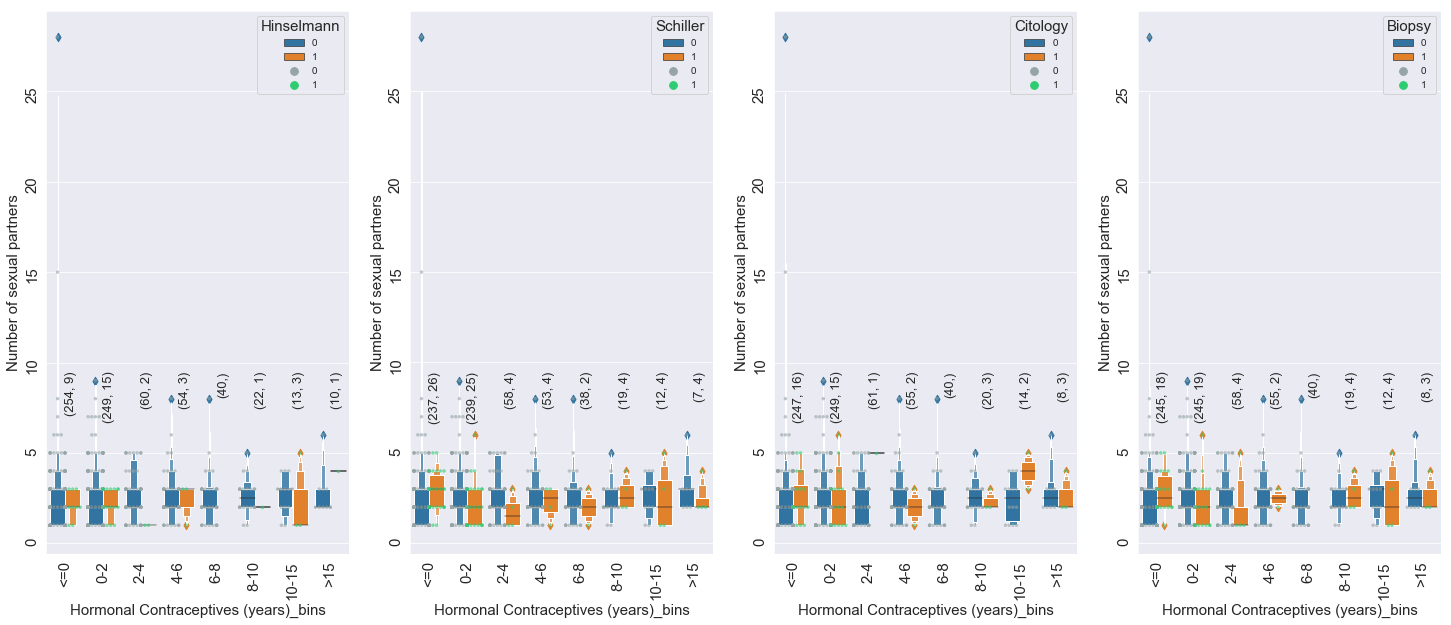

IUD (years)_bins


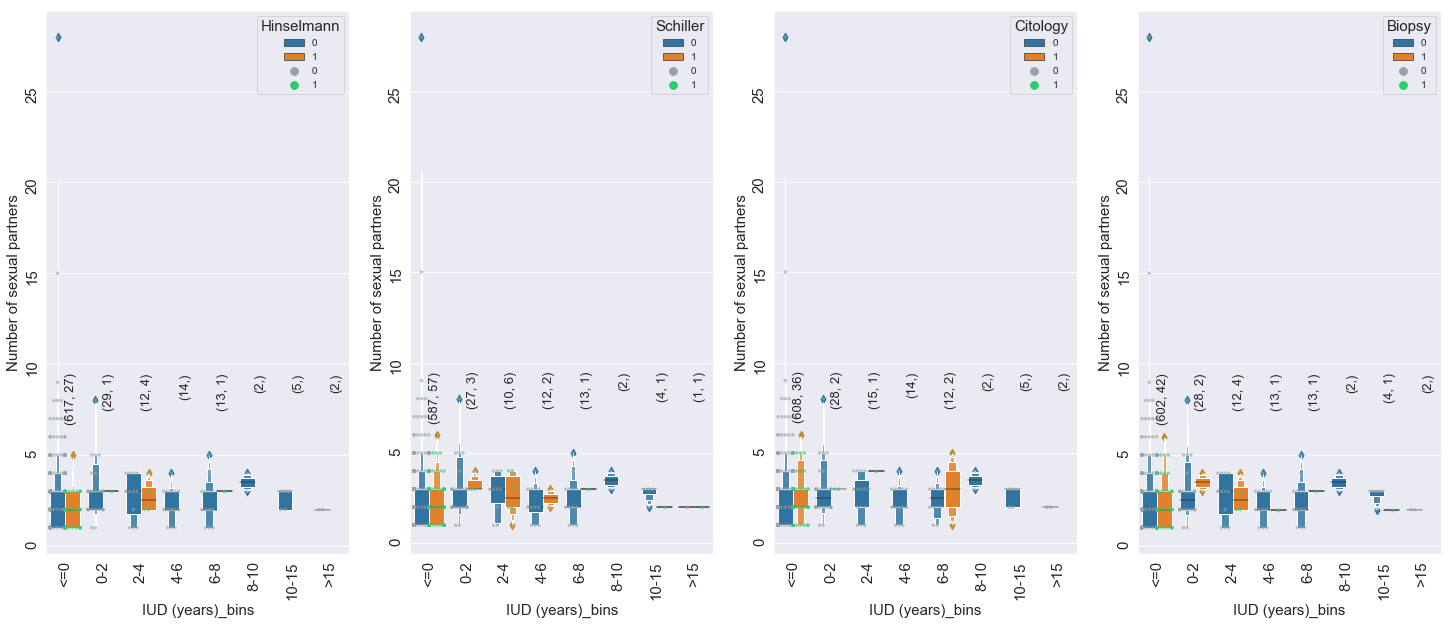

STDs (number)


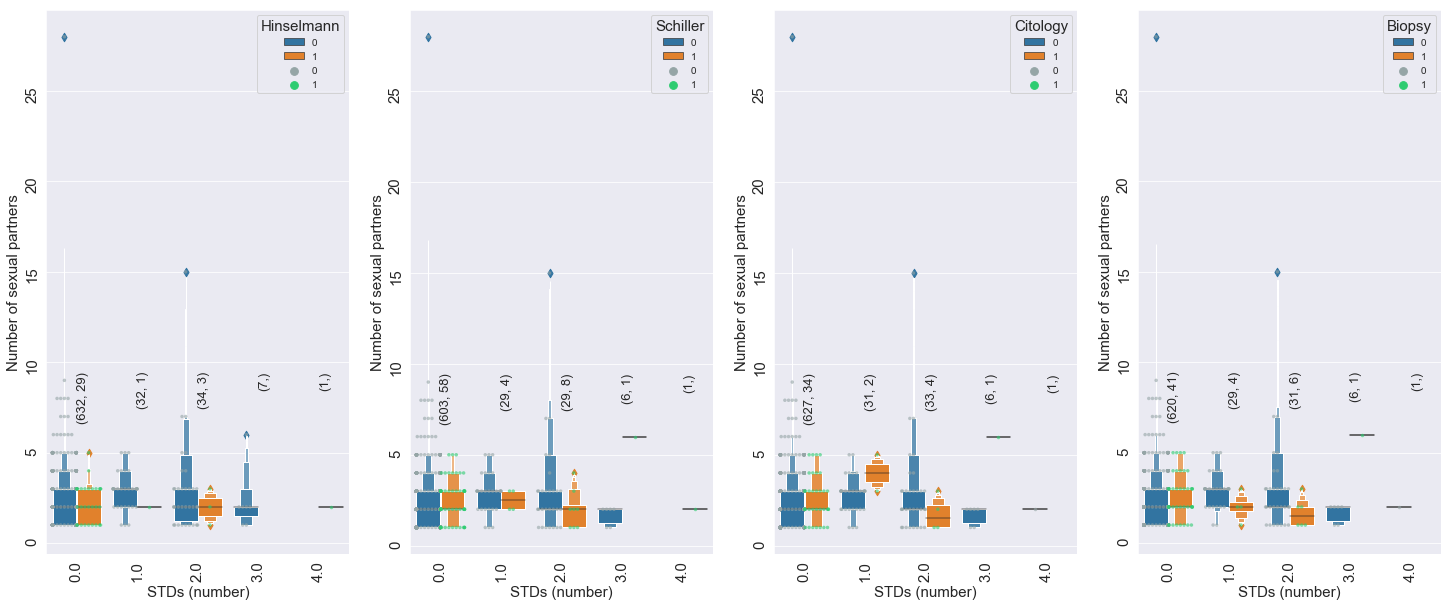

STDs: Number of diagnosis


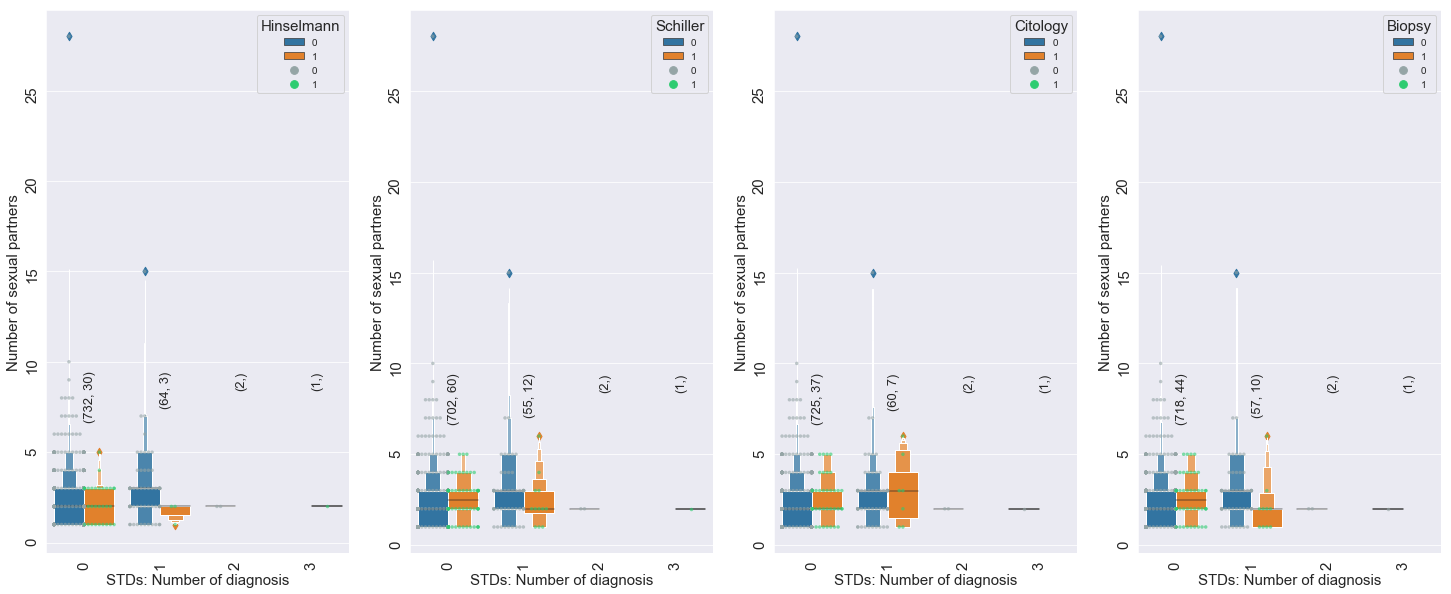

In [43]:
def create_pairplots(x1, y1, test, axs):
    dummy_df = df_copy[[x1, y1, test]].dropna().round(decimals=2)
    s = sns.boxenplot(x=x1, y=y1, hue=test, ax=axs, data=dummy_df)
    s = sns.swarmplot(x=x1, y=y1, hue=test, ax=axs, data=dummy_df, alpha=0.6, size=3.5,\
                     dodge=True, palette=sns.color_palette(['#95a5a6', '#2ecc71']))
    
    d=dict(df_copy[[ x1, test, y1]].dropna().groupby([x1, test])[y1].count())
    new_d={}
    for key,value in d.items():
        key=str(key[0])
        if key not in new_d.keys():
            new_d[key]= [value]
        else:
            new_d[key].append(value)
    new_d = {str(key):tuple(value) for key,value in new_d.items()}

    for j,label in enumerate(s.get_xticklabels()):
        s.annotate(new_d[label.get_text()], xy=(j, 9), rotation=90, fontsize=13)
    
    s.set_xlabel(s.get_xlabel(), fontsize=15)
    s.tick_params(labelsize=15, rotation=90)    
    s.set_ylabel(y1, fontsize=15, rotation=90)
#     s.set_ylim(0,16) # One extra observation is 28
    s.legend(title=test, title_fontsize=15, loc='upper right')

def call_pair_plots(col, y):
    f, ax = plt.subplots(nrows=1, ncols=4, figsize=(25, 10))
    create_pairplots(col, y, 'Hinselmann', ax[0])
    create_pairplots(col, y, 'Schiller', ax[1])
    create_pairplots(col, y, 'Cytology', ax[2])
    create_pairplots(col, y, 'Biopsy', ax[3])
    plt.show()

    
for col in df_copy.columns:
    if (col not in categorical_features) &(col!='Num of pregnancies') & (col!='Age') &\
    (col!='Number of sexual partners'):
        print(col)
        call_pair_plots(col, 'Number of sexual partners')


In [127]:
# Inference

# Women with more number of STDs(1 to 2) are at higher risk of getting a cervical cancer


In [16]:
def create_pairplots(x1, y1, col1, test, pos1):
    dummy_df = df_copy[[x1, y1, col1, test]].dropna().round(decimals=2)
    plot = sns.catplot(x=x1, y=y1, col=col1, hue=test, kind='boxen', data=dummy_df, aspect=10.5/8)

    for i in np.arange(2):
        if(i==0):
            dummy_df = df_copy.loc[(df_copy[col1]=='0.0') |(df_copy[col1]==0),\
                                   [x1, y1, col1, test]].dropna()
        elif(i==1):
            dummy_df = df_copy.loc[(df_copy[col1]=='1.0') | (df_copy[col1]==1)\
                                   ,[x1, y1, col1, test]].dropna()
        ax1 = plot.facet_axis(0,i)
        sns.swarmplot(x=x1, y=y1, hue=test, ax=ax1, data=dummy_df, alpha=0.6, size=3.5,\
                     dodge=True, palette=sns.color_palette(['#95a5a6', '#2ecc71']))

        d=dict(dummy_df[[ x1, test, y1, col1]].dropna().groupby([x1, test])[y1].count())
        new_d={}
        for key,value in d.items():
            key=str(key[0])
            if key not in new_d.keys():
                new_d[key]= [value]
            else:
                new_d[key].append(value)
        new_d = {str(key):tuple(value) for key,value in new_d.items()}

        for j,label in enumerate(ax1.get_xticklabels()):
            if(label.get_text() in new_d.keys()):
                ax1.annotate(new_d[label.get_text()], xy=(j, pos1), rotation=90, fontsize=12)
    plt.show()

create_pairplots('Number of sexual partners', 'Age', 'Smokes', 'Biopsy', 60)
create_pairplots('Number of sexual partners', 'Age', 'Hormonal Contraceptives', 'Biopsy', 60)
create_pairplots('Number of sexual partners', 'Age', 'IUD', 'Biopsy', 60)
create_pairplots('Number of sexual partners', 'Age', 'STDs', 'Biopsy', 60)
create_pairplots('Number of sexual partners', 'Age', 'Dx:Cancer', 'Biopsy', 60)
create_pairplots('Number of sexual partners', 'Age', 'Dx:CIN', 'Biopsy', 60)
create_pairplots('Number of sexual partners', 'Age', 'Dx:HPV', 'Biopsy', 60)
# create_pairplots('Number of sexual partners', 'Age', 'Risk Assessment(HSC)', 'Biopsy', 60)
# create_pairplots('Number of sexual partners', 'Age', 'HSC_results', 'Biopsy', 60)

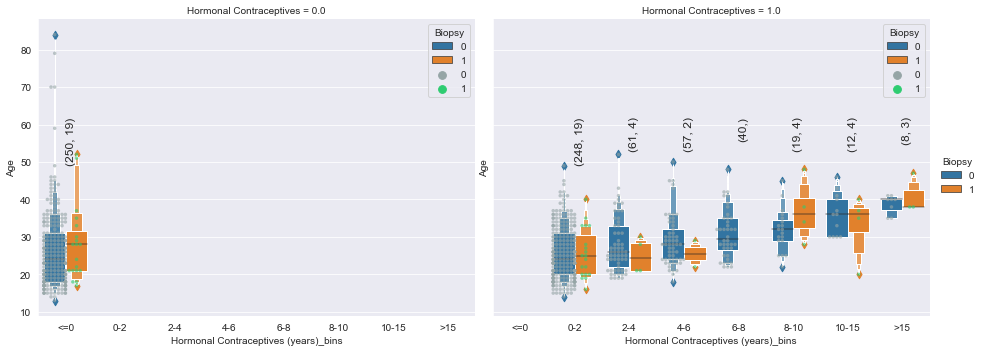

In [18]:
create_pairplots('Hormonal Contraceptives (years)_bins', 'Age', 'Hormonal Contraceptives', 'Biopsy', 60)

In [ ]:
#  Inference
# Given they have first sexual intercourse at same age and on average same number of pregnancies.

# People who smoke have a higher chance of getting a cervical cancer 
# People who have HPV virus have a higher chance of getting a cervical cancer 
# People who were diagnosed with cancer have a higher chance of getting a cervical cancer 
# People who were diagnosed with STD have a higher chance of getting a cervical cancer



# People with higher no. of pregnancies and higher no. of sexual partners have a higher chance 
# of getting cervical cancer irrespective of STDs

In [16]:
# m1 = pd.get_dummies(m, drop_first=True)
check_features = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',\
                  'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives',\
                  'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)',\
                  'STDs:condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',\
                  'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes',\
                  'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV',\
                  'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx:Result', 'Hinselmann', 'Schiller',\
                  'Cytology', 'Risk Assessment(HSC)', 'Biopsy']

m1 = df[check_features].dropna().copy()
for col in m1.columns:
    if col in ['Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)']:
        m1[col] = m1[col].apply(pd.to_numeric)
    else:
        m1[col] = m1[col].astype(str).astype(float).astype(int)
# m1.dtypes

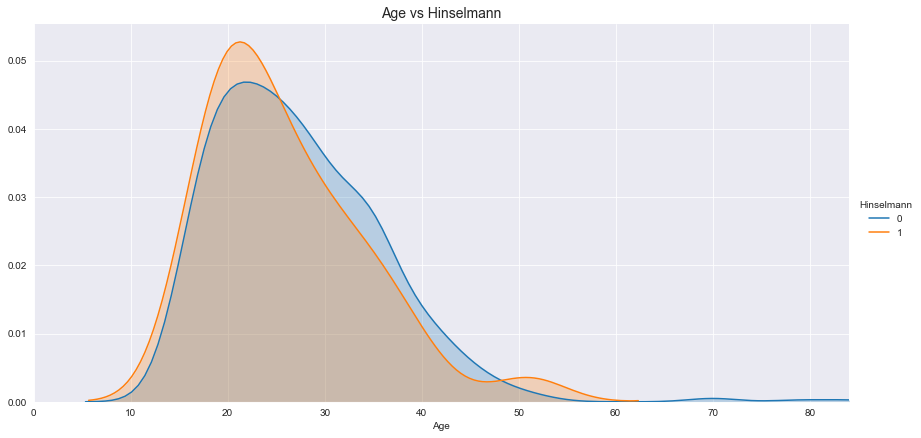

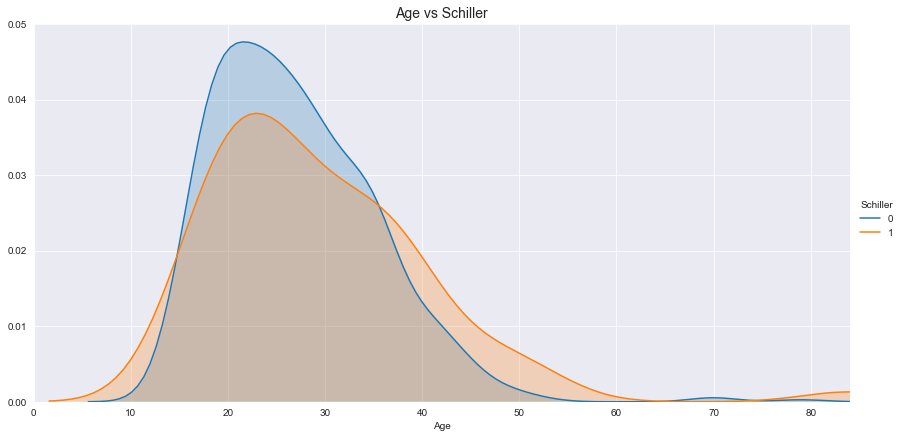

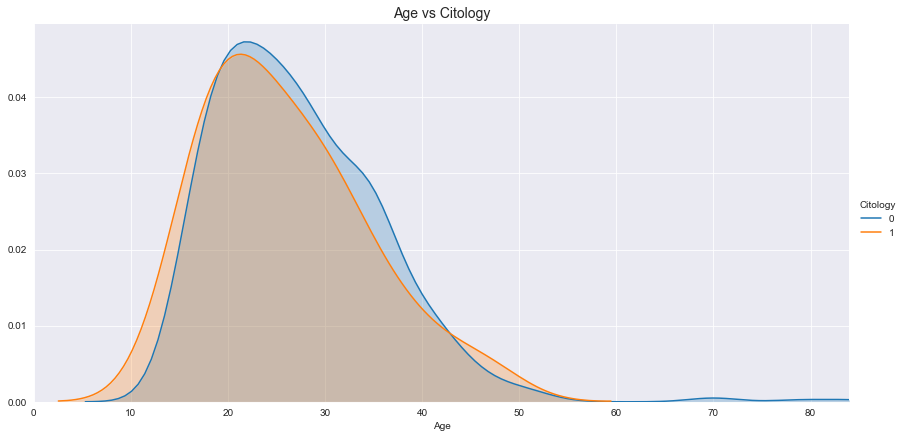

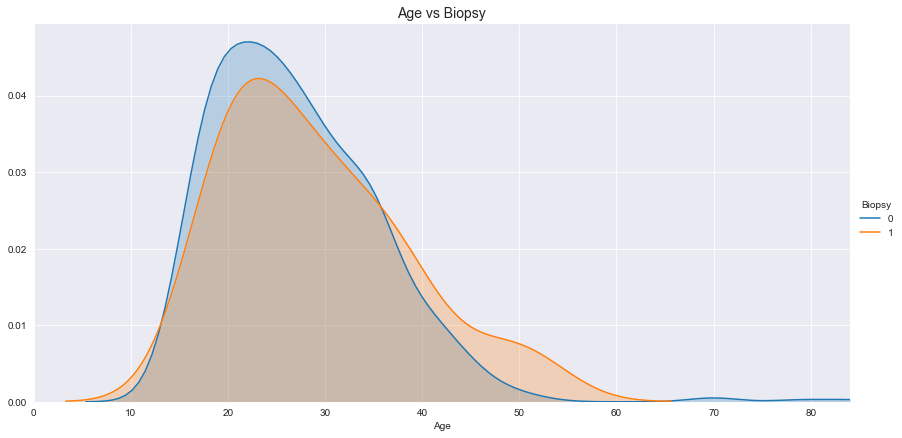

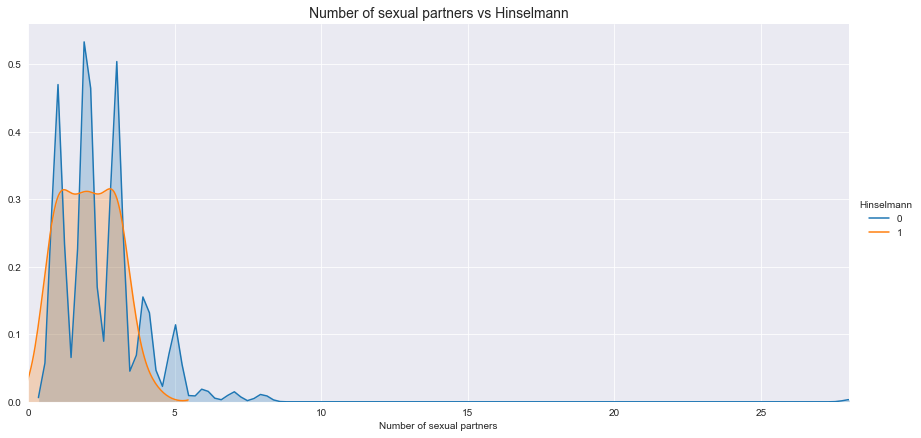

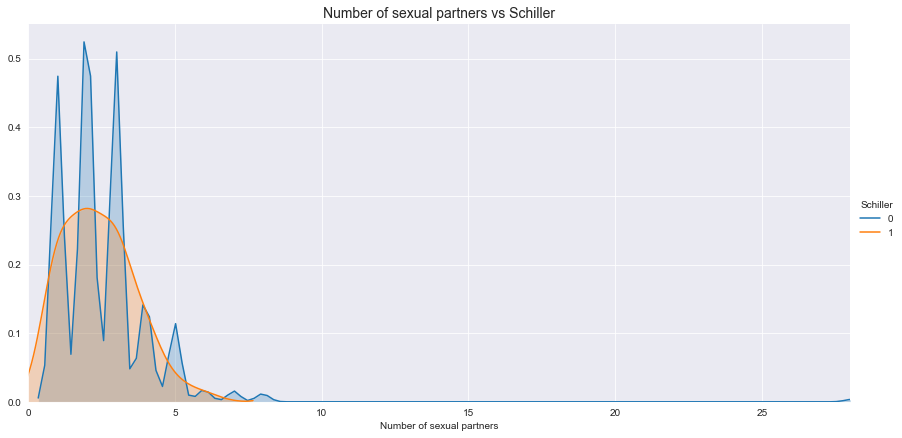

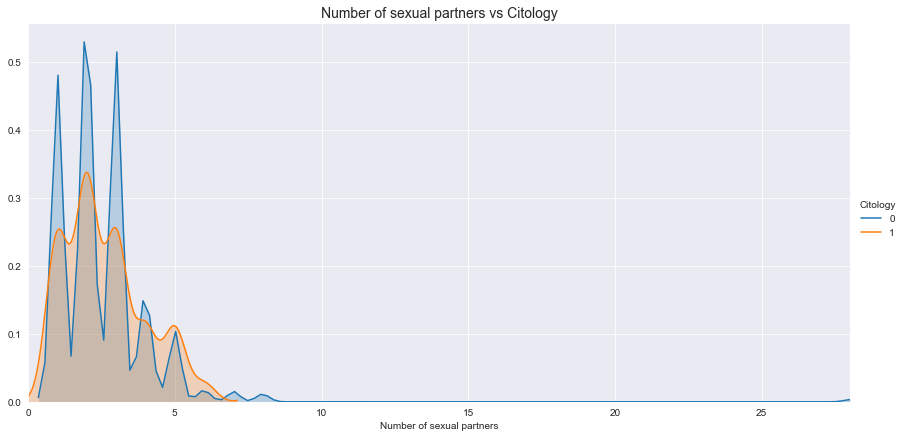

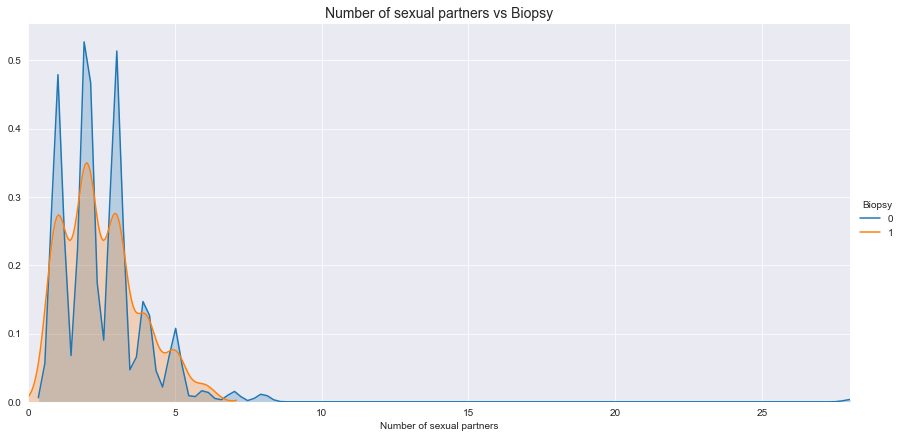

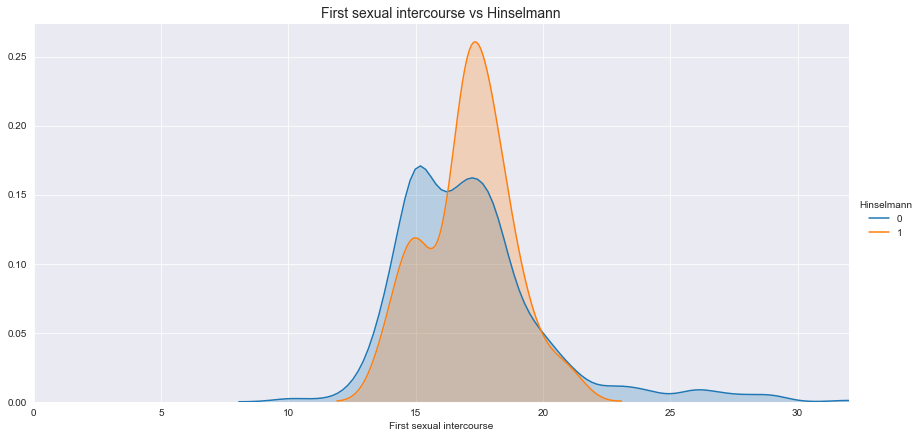

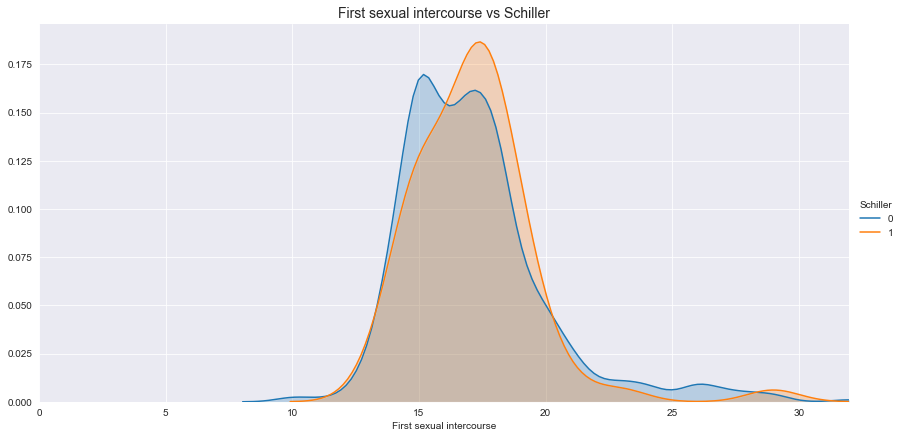

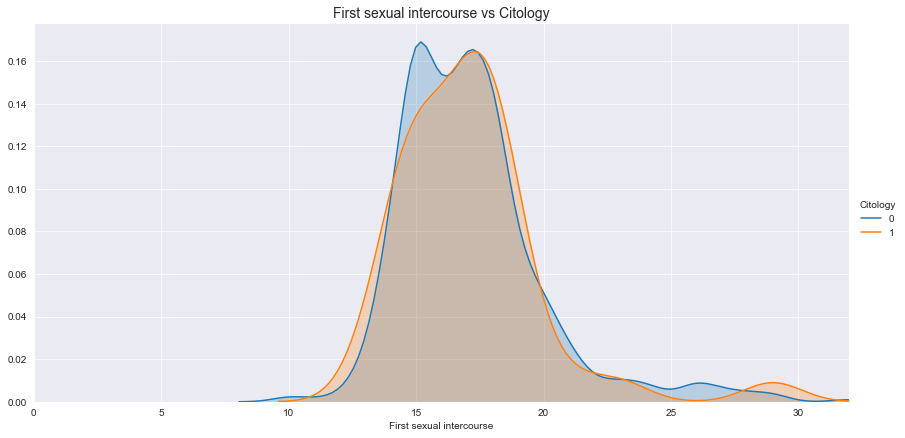

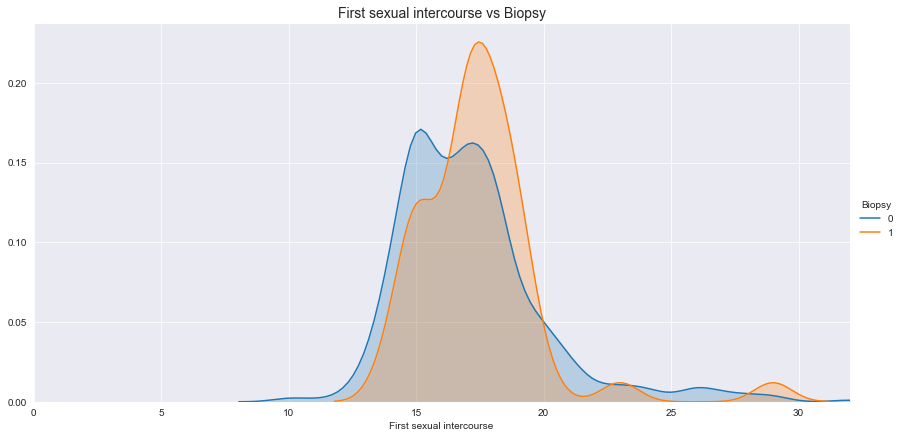

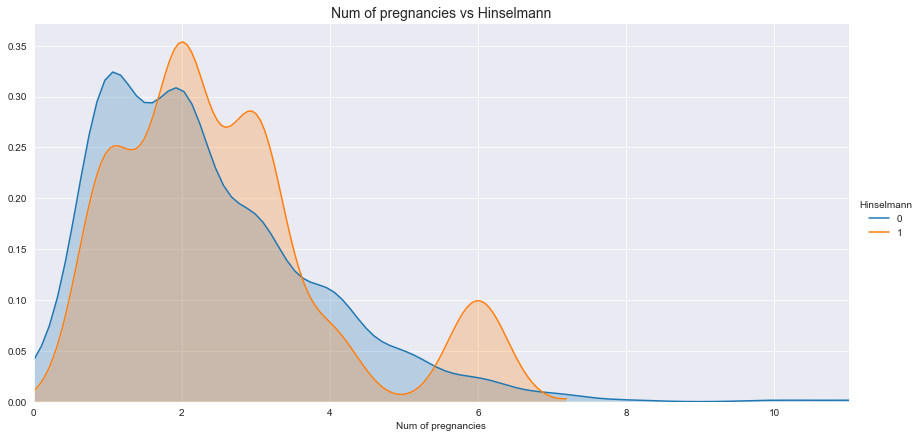

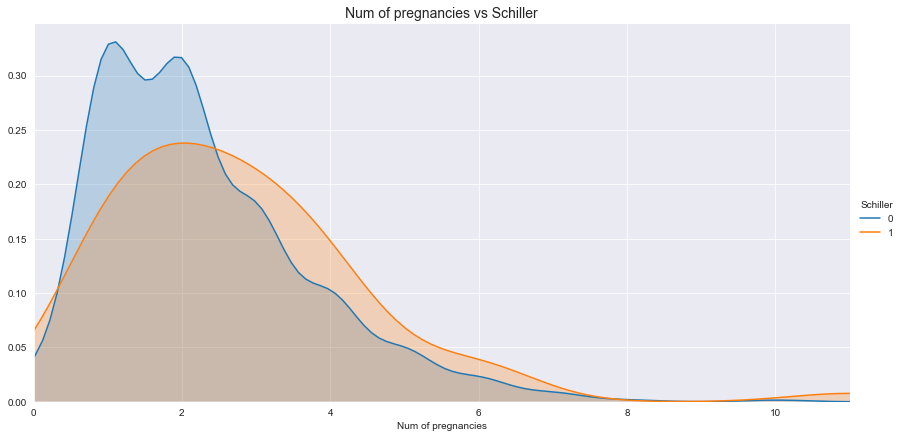

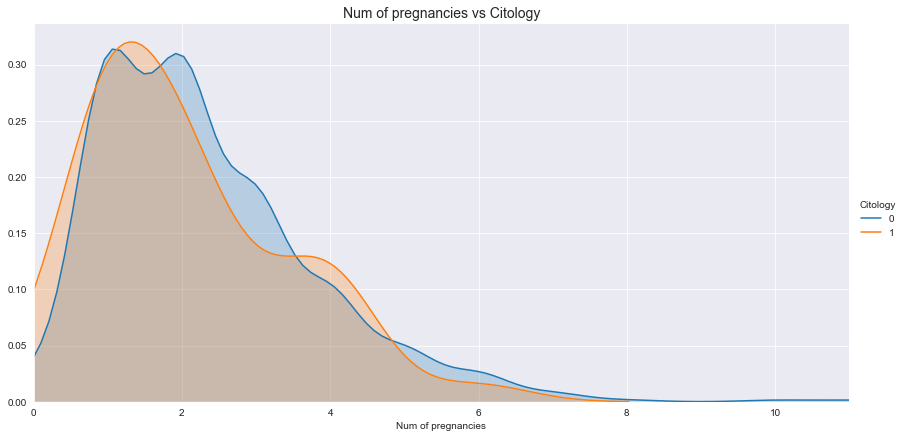

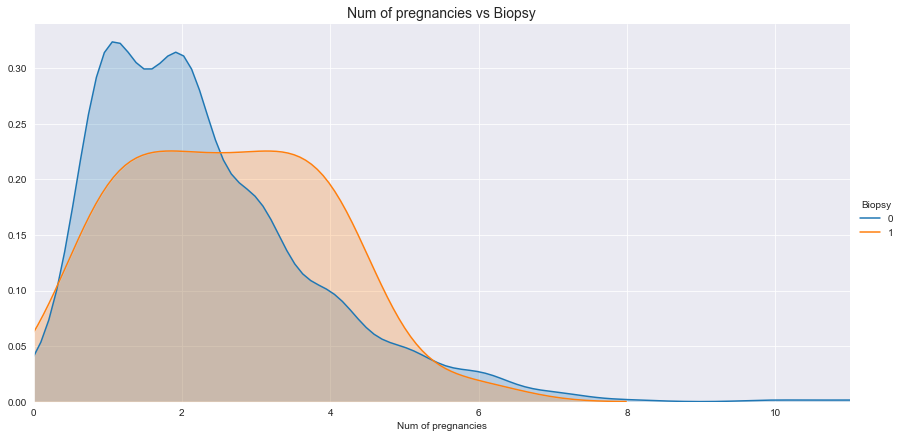

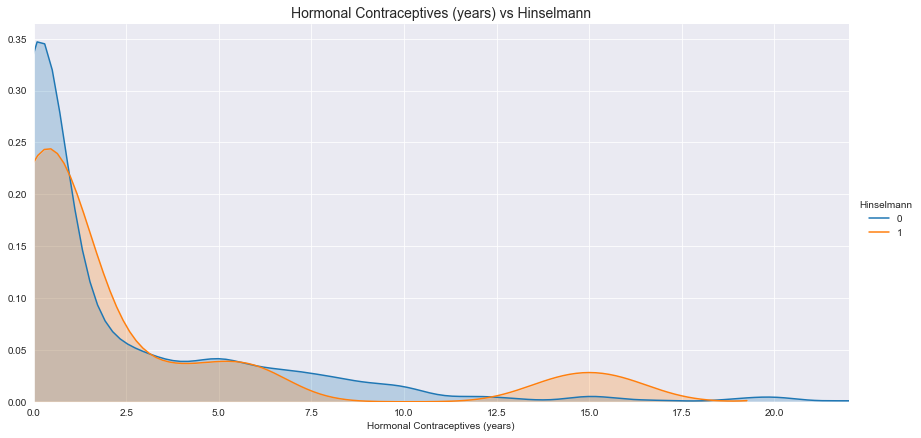

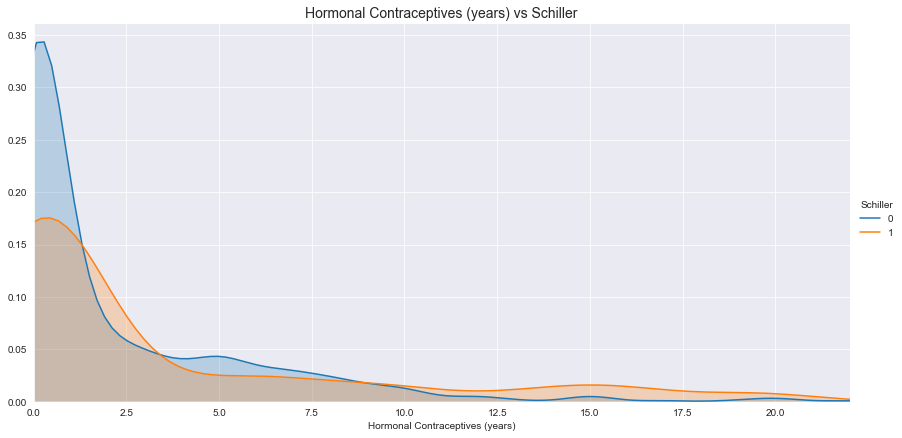

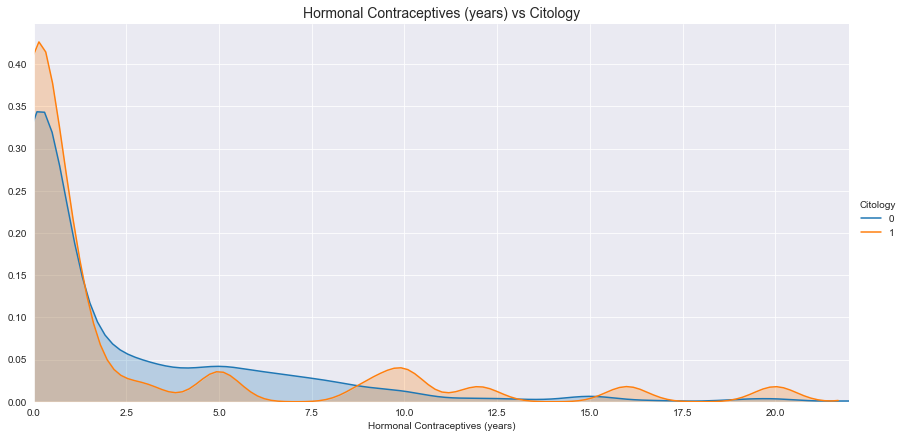

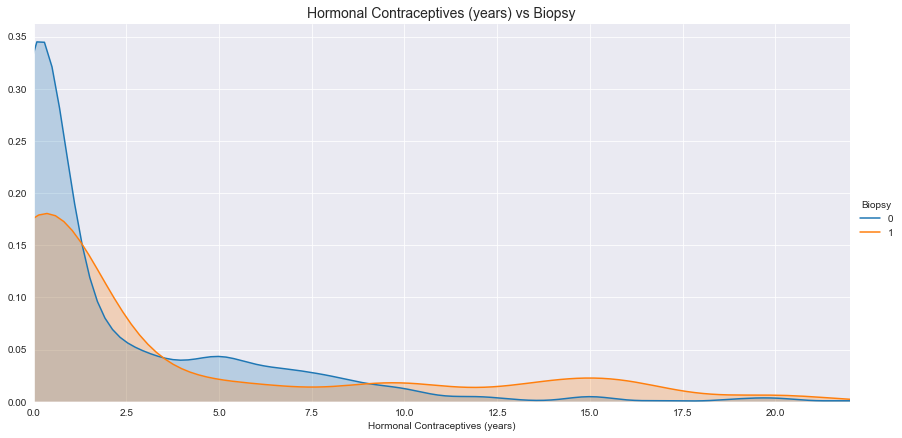

In [93]:
def kde_plot(column):
    for col in ['Hinselmann', 'Schiller', 'Cytology', 'Biopsy']:
        g = sns.FacetGrid(m1, hue=col, height=6, aspect=2)
        g = g.map(sns.kdeplot, column, shade=True).add_legend()
        oldest = m1[column].max()
        g.set(xlim=(0,oldest))
        plt.title(column + " vs " + col, fontdict={'fontsize':14})
        
for col in ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',\
                  'Hormonal Contraceptives (years)']:
    kde_plot(col)

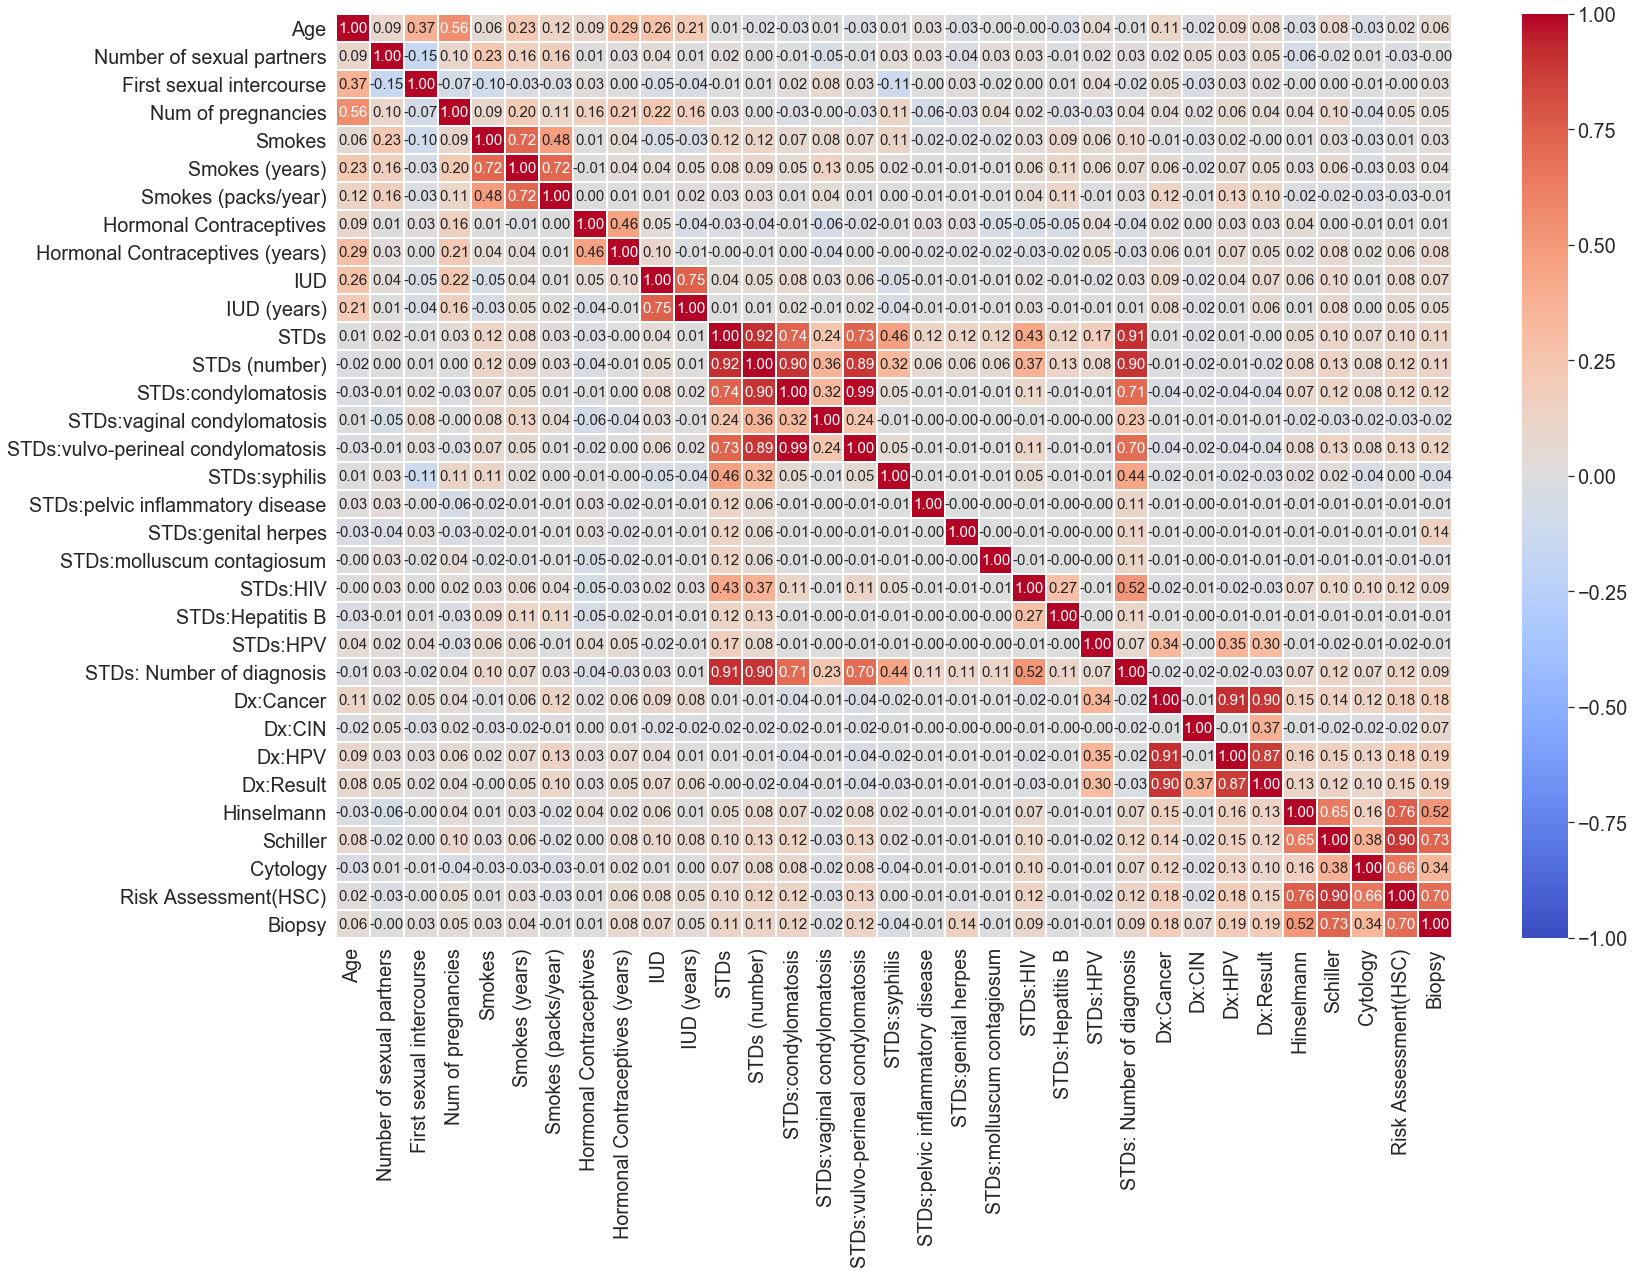

In [17]:
sns.set(font_scale=1.8)
plt.figure(figsize=(25,17))
sns.heatmap(m1.corr(),annot=True,fmt='.2f',linewidths=1, vmin=-1, vmax=1, center= 0,\
            cmap='coolwarm', annot_kws={'size': 15}, linecolor='white', square=False)

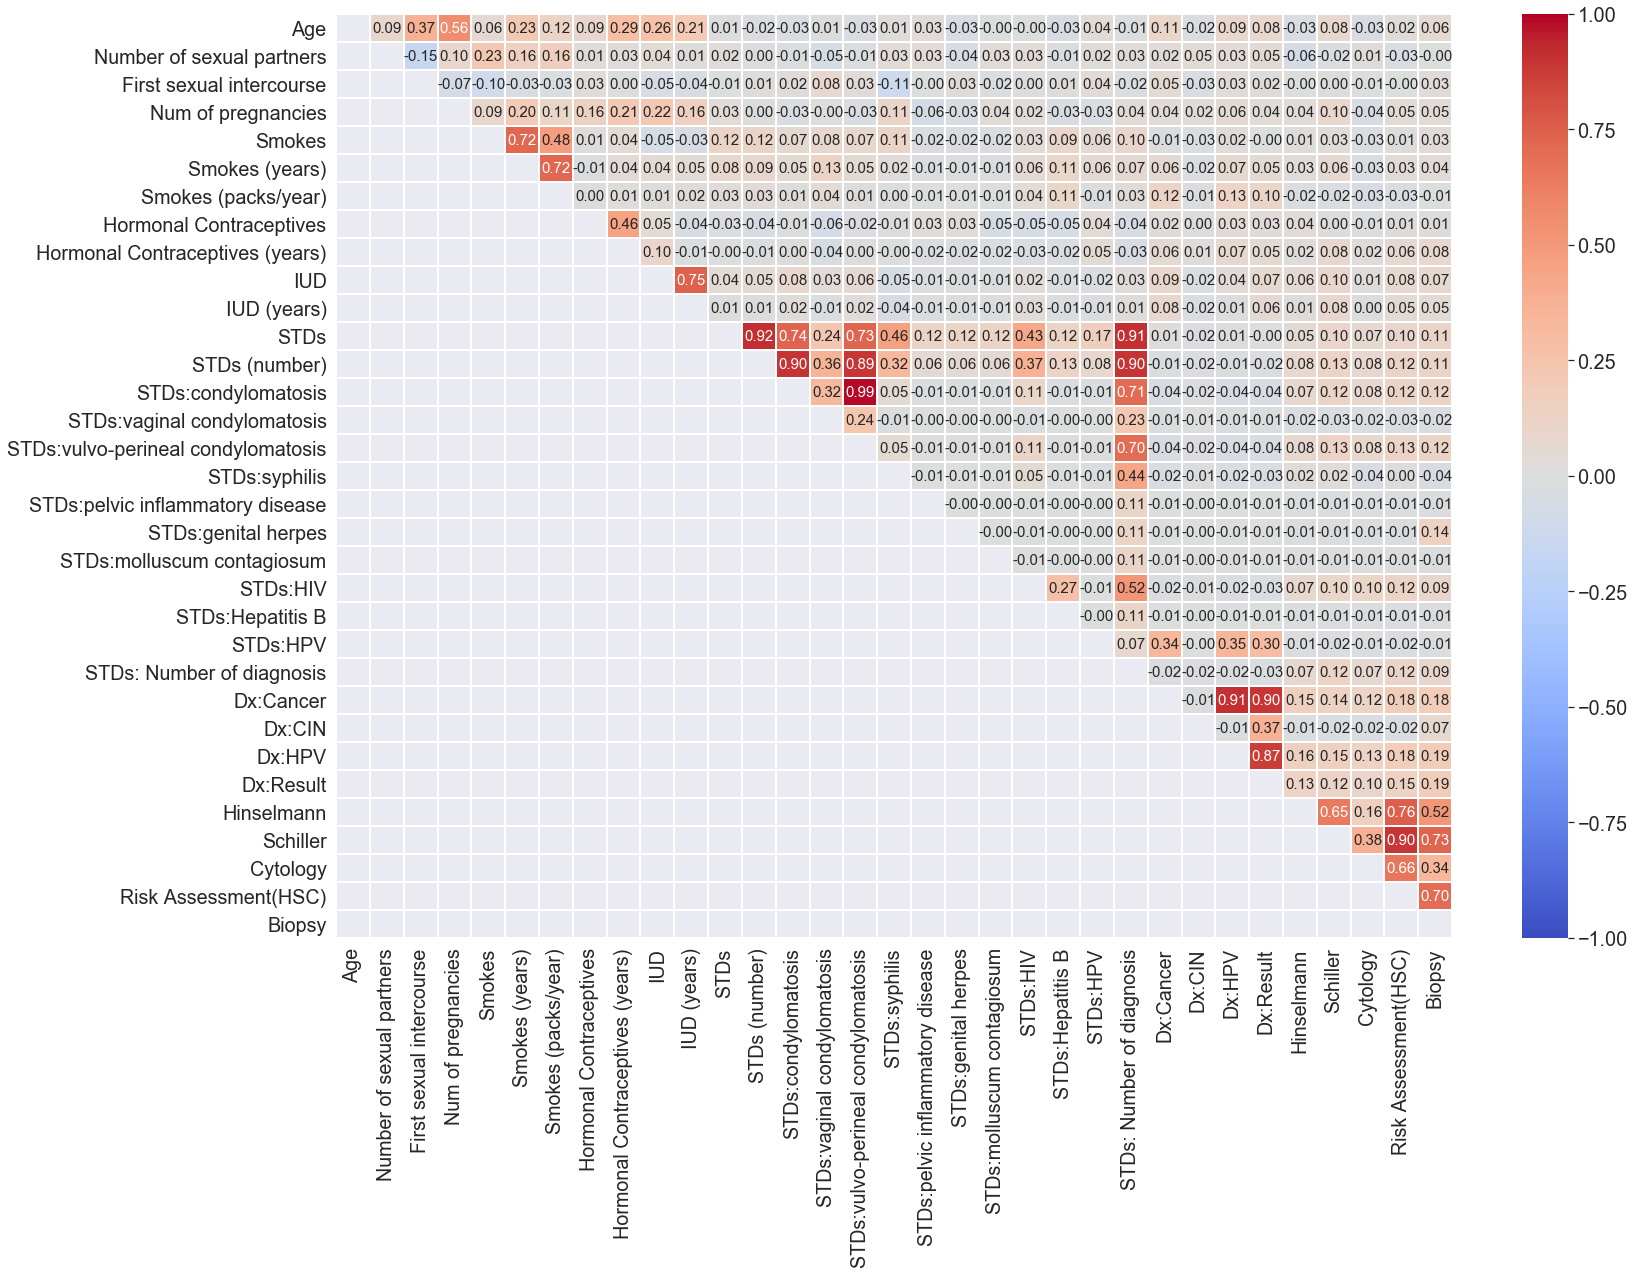

In [18]:
sns.set(font_scale=1.8)
plt.figure(figsize=(25,17))
matrix = np.tril(m1.corr())
sns.heatmap(m1.corr(),annot=True,fmt='.2f',linewidths=1, vmin=-1, vmax=1, center= 0,\
            cmap='coolwarm', annot_kws={'size': 15}, linecolor='white', square=False, mask = matrix)

In [48]:
# m = df_copy.copy()

# m[['Smokes (years)_bins','Smokes (packs/year)_bins','Hormonal Contraceptives (years)_bins',\
#             'IUD (years)_bins','First sexual intercourse_bins']]=\
# m[['Smokes (years)_bins','Smokes (packs/year)_bins','Hormonal Contraceptives (years)_bins',\
#             'IUD (years)_bins','First sexual intercourse_bins']].replace('-', '~', regex=True)
# m.replace('', np.nan, inplace=True)
# m.fillna('missing', inplace=True)
# m.to_csv('risk factors 0 to 3.csv', index=False)
# m.isnull().sum()
# m['Hormonal Contraceptives (years)_bins'].value_counts()

In [260]:
# Dense representation
m = df.dropna().copy()
m['HSC_results_n'] = m['HSC_results'].astype('category').cat.codes
m['HSCB_results_n'] = m['HSCB_results'].astype('category').cat.codes
# m.to_csv('dense_rep.csv', index=False)

In [15]:
m = df_copy.dropna().copy()
m[['Smokes (years)_bins','Smokes (packs/year)_bins','Hormonal Contraceptives (years)_bins',\
            'IUD (years)_bins','First sexual intercourse_bins']]=\
m[['Smokes (years)_bins','Smokes (packs/year)_bins','Hormonal Contraceptives (years)_bins',\
            'IUD (years)_bins','First sexual intercourse_bins']].replace('-', '~', regex=True)
m.to_csv('data_with_bins_without_missing_values.csv', index=False)

In [15]:
df['Risk Assessment(HSC)'].value_counts()

0    762
1     48
2     39
3      9
Name: Risk Assessment(HSC), dtype: int64

In [1421]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

def impute(var, new_df):
    df_var=new_df.copy()
    
    x_features_numerical = new_df.select_dtypes(include=['int64', 'float64']).columns.to_list()
    x_features_categorical = new_df.select_dtypes(include=['object']).columns.to_list()

    if var in x_features_categorical:
        flag=0
        x_features_categorical.remove(var)
    else:
        flag=1
        x_features_numerical.remove(var)
    
    for i in x_features_categorical:
        df_var[i]=df_var[i].fillna(df_var[i].mode()[0])
    for i in x_features_numerical:
        df_var[i]=df_var[i].fillna(df_var[i].median())

    df_var=df_var.astype('float')
    df_var[x_features_categorical]=df_var[x_features_categorical].replace(0,'no')
    df_var[x_features_categorical]=df_var[x_features_categorical].replace(1,'yes')
    df_var=pd.get_dummies(df_var)

    train_var = df_var[df_var[var].isnull()==False]
    test_var = df_var[df_var[var].isnull()]

    train_var_x = train_var.drop(var,axis=1)
    train_var_y = train_var[var]

    test_var_x=test_var.drop(var,axis=1)
    test_var_y=test_var[var]
    
    if flag==0:
        dt = RandomForestClassifier()
    else:
        dt = RandomForestRegressor()
        
    var_model = dt.fit(train_var_x,train_var_y)
    test_var[var]=var_model.predict(test_var_x)

    var_complete=pd.concat([train_var,test_var],axis=0)

    df_impute=new_df.copy()
    df_impute[var]=var_complete[var].sort_index()
    return(df_impute)

In [15]:
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

new_df = df.drop(['HSC_results', 'HSCB_results', 'Risk Assessment(HSC)'], axis=1).copy()
print(new_df.shape)

cols = []
for col in new_df.columns:
    if new_df[col].isnull().sum() > 0:
        cols.append(col)
        new_df = impute(col, new_df)

new_df['Risk Assessment(HSC)'] = new_df.loc[:, ['Hinselmann', 'Schiller', 'Cytology']].sum(axis=1)
new_df['Risk Assessment(HSC)'] = new_df['Risk Assessment(HSC)'].astype('object')
new_df.to_csv('imputed.csv', index=False)

In [92]:
from sklearn.metrics import (confusion_matrix ,classification_report, cohen_kappa_score, 
                             f1_score, fbeta_score, accuracy_score, roc_auc_score, roc_curve)
# from imblearn.metrics import (geometric_mean_score, make_index_balanced_accuracy)

from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle
plt.style.use('ggplot')

def fit_model(Y_pred, Y_test):
    confusion_matrix = pd.crosstab(Y_pred, Y_test, rownames=['Predicted'], colnames=['Actual'])
    print(confusion_matrix)
    print("\n")
    print(classification_report(Y_test, Y_pred))
    print("\n")
    print("Kappa: ", cohen_kappa_score(Y_test, Y_pred))
    print("\n")


def metrics_score(Y_test, Y_pred_prob):
    
    fpr, tpr, thresholds = roc_curve(Y_test,  Y_pred_prob)
    auc = roc_auc_score(Y_test, Y_pred_prob)
    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
    Y_pred = Y_pred_prob.copy()
    Y_pred[Y_pred>=thresholds[ix]] = 1
    Y_pred[Y_pred<thresholds[ix]] = 0
    pd.DataFrame(Y_pred, columns=["Prediction"]).to_csv('predicted_result.csv', index=True)
    confusion_matrix = pd.crosstab(Y_pred, Y_test, rownames=['Predicted'], colnames=['Actual'])
    print(confusion_matrix)    
    print("\n")
    print(classification_report(Y_test, Y_pred))
    print("\n")
    print("Area under the curve: ", auc)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.scatter(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for Binary data')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold')
    plt.legend()
    plt.show()

def roc_auc_curve(y_score, Y_test, n_classes = 4):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot of a ROC curve for a specific class
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i+1, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()

In [51]:
# for col in new_df.columns:
#     if col in categorical_features:
#         new_df[col] = new_df[col].astype('object')

# dt = new_df.copy()
# dt.drop(['STDs', 'STDs: Number of diagnosis', 'STDs:vulvo-perineal condylomatosis','Smokes', 'IUD','Hormonal Contraceptives']\
#         ,axis=1, inplace=True)



# dt = df.dropna().copy()
# dt.drop(['HSC_results', 'HSCB_results'], axis=1, inplace=True)
dt = df.dropna().copy()
dt.drop(['STDs', 'STDs: Number of diagnosis', 'STDs:vulvo-perineal condylomatosis','Smokes', 'IUD','Hormonal Contraceptives',\
         'HSC_results', 'HSCB_results'], axis=1, inplace=True)

# dt.to_csv('No_sampling_Risk(HSC).csv', index=False)
# other_df = dt.drop(['Hinselmann', 'Schiller', 'Cytology', 'Biopsy'], axis=1).loc[dt['Risk Assessment(HSC)']!=0, :]
# other_df.shape
dt.shape

(668, 27)

In [52]:
from imblearn.under_sampling import (RandomUnderSampler,
                                    NearMiss,
                                    InstanceHardnessThreshold,
                                    CondensedNearestNeighbour,
                                    EditedNearestNeighbours,
                                    RepeatedEditedNearestNeighbours,
                                    AllKNN,
                                    NeighbourhoodCleaningRule,
                                    OneSidedSelection,
                                    TomekLinks)
from collections import Counter
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from imblearn.combine import (SMOTETomek, SMOTEENN)
from imblearn.over_sampling import (SMOTE, SMOTENC, BorderlineSMOTE, SVMSMOTE, ADASYN)

def get_undersampling_model(X_train, Y_train, index=2, flag=0):
    models_u, names = [], []
    models_u.append(CondensedNearestNeighbour(random_state=1, n_seeds_S=100))
    names.append("CondensedNearestNeighbour")
    models_u.append(OneSidedSelection(n_neighbors=1, n_seeds_S=200))
    names.append("OneSidedSelection")
    models_u.append(NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5))
    names.append("NeighbourhoodCleaningRule")
    models_u.append(RepeatedEditedNearestNeighbours())
    names.append("RepeatedEditedNearestNeighbours")
    models_u.append(AllKNN(allow_minority=True))
    names.append("AllKNN")
    models_u.append(TomekLinks())
    names.append("Tomek")
    models_u.append(EditedNearestNeighbours())
    names.append("ENN")
    print("Undersampling technique used:", models_u[index])
    if flag==0:
        return(create_data(X_train, Y_train, models_u[index]))
    else:
        X_samp, Y_samp = models_u[index].fit_resample(X_train, Y_train)
        print("Target class after undersampling:", Counter(Y_samp))
        print("Data shape:", X_samp.shape)
        return(X_samp,Y_samp)

def create_data(X_train, Y_train, model):
    other_df = pd.concat([X_train, Y_train], axis=1)
#     scale = MinMaxScaler()
#     other_df[numeric_features] = scale.fit_transform(other_df[numeric_features])
#     other_df.to_csv('train_data.csv', index=False)
    other_df = other_df.loc[other_df['Risk Assessment(HSC)']!=0, :]
    Y_train[Y_train!=0]=1
    X2, Y2 = model.fit_resample(X_train, Y_train)
    sampled_0 = X2.loc[Y2==0, :]
    sampled_0['Risk Assessment(HSC)'] = 0
    print("Target class after undersampling:", Counter(Y2))
    data = pd.concat([sampled_0, other_df], axis=0)  
#     scale = MinMaxScaler()
#     data[numeric_features] = scale.fit_transform(data[numeric_features])
#     data.to_csv('Undersampled_train_data_check.csv', index=False)
    print("Overall data shape:", data.shape)
    print("Risk Assessment(HSC):", Counter(data['Risk Assessment(HSC)']))
    cols = data.drop('Risk Assessment(HSC)', axis=1).select_dtypes(include=['object']).columns
    data[cols] = data[cols].astype('str')
    return(data.drop('Risk Assessment(HSC)', axis=1), data['Risk Assessment(HSC)'])

def get_oversampling_model(X_train, Y_train, index=2):
    models_o, names = [], []
    models_o.append(SMOTE(random_state = 1, k_neighbors = 5))
    names.append("SMOTE")
    models_o.append(SMOTENC(categorical_features=[9,10,11,12,13,14,15,16,17,18,19,20,21], random_state=1))
    names.append("SMOTENC")
    models_o.append(SMOTETomek(random_state=1))
    names.append("SMOTE TOMEK")
    models_o.append(SMOTEENN(random_state=1))
    names.append("SMOTE ENN")
    models_o.append(SVMSMOTE(random_state=1))
    names.append("SVM SMOTE")
    models_o.append(BorderlineSMOTE(random_state=1, k_neighbors=5, kind='borderline-1'))
    names.append("BorderlineSMOTE 1")
    models_o.append(BorderlineSMOTE(random_state=1, k_neighbors=5, kind='borderline-2'))
    names.append("BorderlineSMOTE 2")
    models_o.append(ADASYN(random_state=1))
    names.append("ADASYN")
    print("Oversampled model used:", models_o[index])
    print(X_train.shape)
    X_samp, Y_samp = models_o[index].fit_resample(X_train, Y_train)
    print("Target class after oversampling:", Counter(Y_samp))
    print("Data shape:", X_samp.shape)
    return(X_samp,Y_samp)

In [97]:
# For Attribute radviz

# save_data = dt.drop(['Hinselmann', 'Schiller', 'Cytology'], axis=1).copy()
# scale = MinMaxScaler()
# save_data[numeric_features] = scale.fit_transform(save_data[numeric_features])
# save_data.to_csv('No_sampling_norm_Risk(HSC).csv', index=False)
dt = df.dropna().copy()
dt.drop(['STDs', 'STDs: Number of diagnosis', 'STDs:vulvo-perineal condylomatosis','Smokes', 'IUD','Hormonal Contraceptives',\
         'HSC_results', 'HSCB_results'], axis=1, inplace=True)

In [98]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler,RobustScaler,Normalizer
from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

def choose_targetcolumn(target, data):
    X = data.drop([target], axis=1)
    Y = data[target].astype('str').astype('float').astype('int')
    cols = X.select_dtypes(include=['object']).columns
    X[cols] = X[cols].astype('object')
#     .astype('float').astype('int')
    return(X,Y)

def get_scaling():
    scaling, name = [], []
    name.append("numeric_transformer_standard")
    scaling.append(Pipeline([('scaler', StandardScaler())]))
    name.append("numeric_transformer_minmax")
    scaling.append(Pipeline([('scaler', MinMaxScaler())]))
    name.append("numeric_transformer_robust")
    scaling.append(Pipeline([('scaler', RobustScaler())]))
    name.append("numeric_transformer_norm")
    scaling.append(Pipeline([('scaler', Normalizer())]))
    return(scaling,name)


# target = 'Cytology'
# X,Y = choose_targetcolumn(target, dt.drop(['Biopsy', 'Hinselmann', 'Schiller', 'Risk Assessment(HSC)'], axis=1))

target = 'Biopsy'
X,Y = choose_targetcolumn(target, dt.drop(['Cytology', 'Schiller', 'Risk Assessment(HSC)', 'Hinselmann'], axis=1))

# For undersampling
# X,Y = get_undersampling_model(X, Y, index=2)
# Y = label_binarize(Y, classes=[0,1,2,3])
# X[numeric_features] = numerical_transformer[0].fit_transform(X[numeric_features])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, test_size=0.2, random_state=1, stratify=Y)


numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numerical_transformer,scaling_name = get_scaling()
# categorical_transformer = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])

# preprocessor = ColumnTransformer
#     transformers=[
#         ('num', numerical_transformer[1], numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])


print("Y:", Counter(Y))
print("Y_train:", Counter(Y_train))
print("Y_test:", Counter(Y_test))

# For Multiclass

# For undersampling and oversampling
x_orig = X_train.copy()
y_orig = Y_train.copy()
x_orig[numeric_features] = numerical_transformer[3].fit_transform(x_orig[numeric_features])


# For undersampling
# X_train,Y_train = get_undersampling_model(X_train, Y_train, index=2)


X_train,Y_train = get_oversampling_model(X_train, Y_train, index=6)

print("Y_train:", Counter(Y_train))
print("Y_test:", Counter(Y_test))


# For Hinselmann
# X_train,Y_train = get_undersampling_model(X_train, Y_train, index=4, flag=1)
# X_train,Y_train = get_oversampling_model(X_train, Y_train, index=5)



X_train[numeric_features] = numerical_transformer[3].fit_transform(X_train[numeric_features])
X_test[numeric_features] = numerical_transformer[3].fit_transform(X_test[numeric_features])

Y: Counter({0: 623, 1: 45})
Y_train: Counter({0: 498, 1: 36})
Y_test: Counter({0: 125, 1: 9})
Oversampled model used: BorderlineSMOTE(kind='borderline-2', random_state=1)
(534, 22)
Target class after oversampling: Counter({0: 498, 1: 497})
Data shape: (995, 22)
Y_train: Counter({0: 498, 1: 497})
Y_test: Counter({0: 125, 1: 9})


In [65]:
# other_df = pd.concat([X_train, Y_train], axis=1)
# other_df = pd.concat([x_orig, y_orig], axis=1)
# other_df = pd.concat([X_test, Y_test], axis=1)
# other_df.to_csv('cytology_test.csv', index=True)

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.svm import SVC
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

diff_class_weight = int(Y_train.value_counts()[0]/Y_train.value_counts()[1])
print(diff_class_weight)

weights = {0:1, 1:1}
# weights = {0:1, 1:10, 2:10, 3:10}
# weights = {0:1, 1:1, 2:1, 3:1}
# weights = 'balanced'
# classifiers = [
#     LogisticRegression(random_state=1, class_weight=weights, max_iter=200), #multi_class='multinomial',
#     SVC(random_state=1, probability=True, class_weight=weights),
#     RandomForestClassifier(random_state=1, class_weight=weights),
#     DecisionTreeClassifier(random_state=1, class_weight=weights),
#     GradientBoostingClassifier(random_state=1),
#     RUSBoostClassifier(random_state=1),
#     EasyEnsembleClassifier(random_state=1),    
#     BalancedRandomForestClassifier(n_estimators=300, random_state=1, class_weight=weights),
#     BalancedBaggingClassifier(random_state=1),
#     AdaBoostClassifier(random_state=1),
#     XGBClassifier(seed=1, scale_pos_weight=diff_class_weight)
# ]

classifiers = [
    LogisticRegression(random_state=1), #multi_class='multinomial'
    SVC(random_state=1, probability=True),
    RandomForestClassifier(random_state=1),
    DecisionTreeClassifier(random_state=1),
    GradientBoostingClassifier(random_state=1),
    RUSBoostClassifier(random_state=1),
    EasyEnsembleClassifier(random_state=1),    
    BalancedRandomForestClassifier(random_state=1),
    BalancedBaggingClassifier(random_state=1),             
    AdaBoostClassifier(random_state=1),
    XGBClassifier(seed=1)
#     DecisionTreeClassifier(random_state=1,min_samples_split=3, min_samples_leaf=1, max_features='auto')
]

# classifiers =[
# EasyEnsembleClassifier(random_state=1, n_estimators=10)
# AdaBoostClassifier(learning_rate=1, random_state=1, n_estimators=50)
# BalancedRandomForestClassifier(random_state=1, criterion='gini', n_estimators=100)
#     ,max_leaf_nodes=3)
#                        max_depth=5, )
# DecisionTreeClassifier(random_state=1)
# ]

# estimator = GradientBoostingClassifier()
# estimator.get_params().keys()

1


test_accuracy 0.8522361984626136
test_precision 0.9022619410700727
test_recall 0.8522361984626136
test_f1_macro 0.872485287200839
test_f1_weighted 0.872485287200839
auc 0.6855952380952381


Best Threshold=0.433244, G-Mean=0.663
Actual      0  1
Predicted       
0.0        99  4
1.0        26  5


              precision    recall  f1-score   support

           0       0.96      0.79      0.87       125
           1       0.16      0.56      0.25         9

    accuracy                           0.78       134
   macro avg       0.56      0.67      0.56       134
weighted avg       0.91      0.78      0.83       134



Area under the curve:  0.6462222222222221


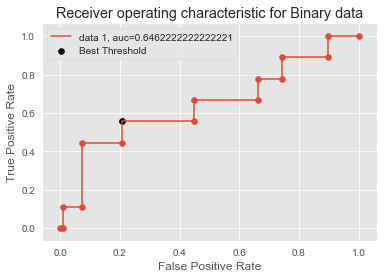



test_accuracy 0.8467505241090147
test_precision 0.8925340773217659
test_recall 0.8467505241090147
test_f1_macro 0.8656731078085901
test_f1_weighted 0.8656731078085901
auc 0.6491700680272109


Best Threshold=0.280088, G-Mean=0.618
Actual      0  1
Predicted       
0.0        86  4
1.0        39  5


              precision    recall  f1-score   support

           0       0.96      0.69      0.80       125
           1       0.11      0.56      0.19         9

    accuracy                           0.68       134
   macro avg       0.53      0.62      0.49       134
weighted avg       0.90      0.68      0.76       134



Area under the curve:  0.5795555555555556


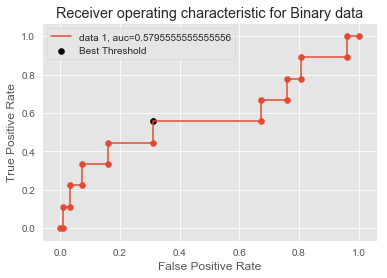



test_accuracy 0.8728511530398322
test_precision 0.8796373130349217
test_recall 0.8728511530398322
test_f1_macro 0.8752027514615325
test_f1_weighted 0.8752027514615325
auc 0.6186326530612245


Best Threshold=0.130000, G-Mean=0.690
Actual      0  1
Predicted       
0.0        67  1
1.0        58  8


              precision    recall  f1-score   support

           0       0.99      0.54      0.69       125
           1       0.12      0.89      0.21         9

    accuracy                           0.56       134
   macro avg       0.55      0.71      0.45       134
weighted avg       0.93      0.56      0.66       134



Area under the curve:  0.7128888888888888


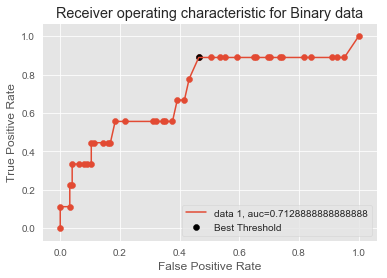



test_accuracy 0.839203354297694
test_precision 0.8833798030681814
test_recall 0.839203354297694
test_f1_macro 0.8583245678787236
test_f1_weighted 0.8583245678787236
auc 0.5481904761904761


Best Threshold=1.000000, G-Mean=0.438
Actual       0  1
Predicted        
0.0        108  7
1.0         17  2


              precision    recall  f1-score   support

           0       0.94      0.86      0.90       125
           1       0.11      0.22      0.14         9

    accuracy                           0.82       134
   macro avg       0.52      0.54      0.52       134
weighted avg       0.88      0.82      0.85       134



Area under the curve:  0.5431111111111111


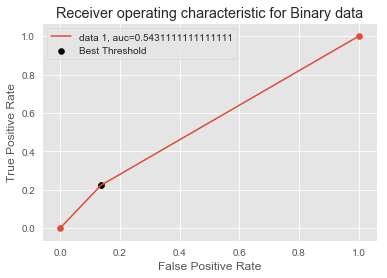



test_accuracy 0.8765897973445144
test_precision 0.8888105336564752
test_recall 0.8765897973445144
test_f1_macro 0.8813222033306678
test_f1_weighted 0.8813222033306678
auc 0.5549455782312924


Best Threshold=0.137197, G-Mean=0.570
Actual      0  1
Predicted       
0.0        61  3
1.0        64  6


              precision    recall  f1-score   support

           0       0.95      0.49      0.65       125
           1       0.09      0.67      0.15         9

    accuracy                           0.50       134
   macro avg       0.52      0.58      0.40       134
weighted avg       0.89      0.50      0.61       134



Area under the curve:  0.5315555555555556


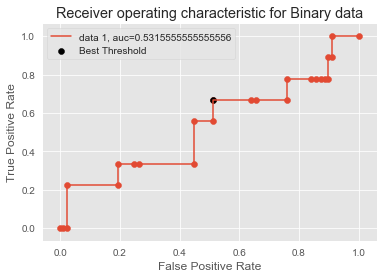



test_accuracy 0.8127882599580714
test_precision 0.879584029099734
test_recall 0.8127882599580714
test_f1_macro 0.8423349318939698
test_f1_weighted 0.8423349318939698
auc 0.5102278911564626


Best Threshold=0.495332, G-Mean=0.566
Actual      0  1
Predicted       
0.0        90  5
1.0        35  4


              precision    recall  f1-score   support

           0       0.95      0.72      0.82       125
           1       0.10      0.44      0.17         9

    accuracy                           0.70       134
   macro avg       0.52      0.58      0.49       134
weighted avg       0.89      0.70      0.77       134



Area under the curve:  0.4711111111111111


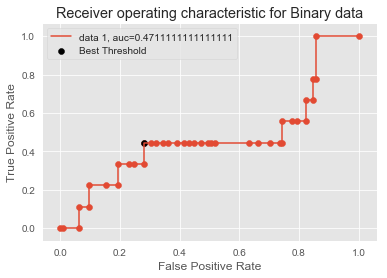



test_accuracy 0.8147798742138365
test_precision 0.8795413573754155
test_recall 0.8147798742138365
test_f1_macro 0.8435248275382211
test_f1_weighted 0.8435248275382211
auc 0.5160408163265305


Best Threshold=0.496246, G-Mean=0.587
Actual      0  1
Predicted       
0.0        97  5
1.0        28  4


              precision    recall  f1-score   support

           0       0.95      0.78      0.85       125
           1       0.12      0.44      0.20         9

    accuracy                           0.75       134
   macro avg       0.54      0.61      0.52       134
weighted avg       0.90      0.75      0.81       134



Area under the curve:  0.4951111111111111


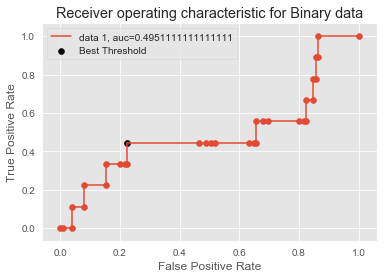



test_accuracy 0.8803284416491964
test_precision 0.880510154756769
test_recall 0.8803284416491964
test_f1_macro 0.8795602024907261
test_f1_weighted 0.8795602024907261
auc 0.6097857142857144


Best Threshold=0.271084, G-Mean=0.643
Actual      0  1
Predicted       
0.0        93  4
1.0        32  5


              precision    recall  f1-score   support

           0       0.96      0.74      0.84       125
           1       0.14      0.56      0.22         9

    accuracy                           0.73       134
   macro avg       0.55      0.65      0.53       134
weighted avg       0.90      0.73      0.80       134



Area under the curve:  0.6853333333333333


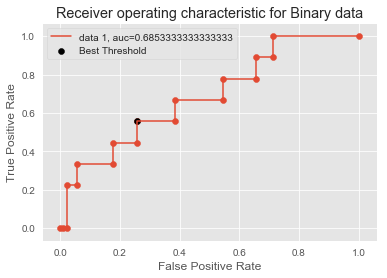



test_accuracy 0.8858141160027954
test_precision 0.8862899824728325
test_recall 0.8858141160027954
test_f1_macro 0.8849207043507791
test_f1_weighted 0.8849207043507791
auc 0.6128299319727891


Best Threshold=0.700000, G-Mean=0.575
Actual       0  1
Predicted        
0.0        124  6
1.0          1  3


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       125
           1       0.75      0.33      0.46         9

    accuracy                           0.95       134
   macro avg       0.85      0.66      0.72       134
weighted avg       0.94      0.95      0.94       134



Area under the curve:  0.6235555555555555


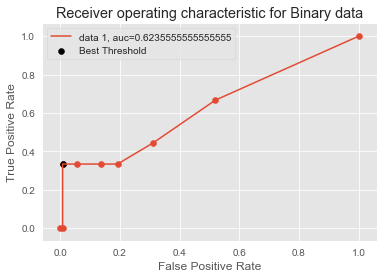



test_accuracy 0.8147099930118799
test_precision 0.8797299372225756
test_recall 0.8147099930118799
test_f1_macro 0.8433256196878911
test_f1_weighted 0.8433256196878911
auc 0.5210612244897959


Best Threshold=0.495089, G-Mean=0.563
Actual      0  1
Predicted       
0.0        89  5
1.0        36  4


              precision    recall  f1-score   support

           0       0.95      0.71      0.81       125
           1       0.10      0.44      0.16         9

    accuracy                           0.69       134
   macro avg       0.52      0.58      0.49       134
weighted avg       0.89      0.69      0.77       134



Area under the curve:  0.4702222222222222


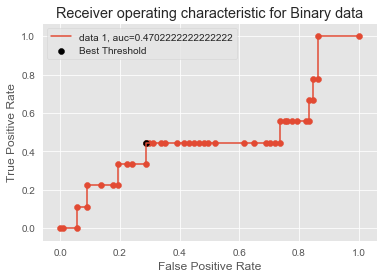



test_accuracy nan
test_precision nan
test_recall nan
test_f1_macro nan
test_f1_weighted nan
auc nan


ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields STDs:condylomatosis, STDs:vaginal condylomatosis, STDs:syphilis, STDs:pelvic inflammatory disease, STDs:genital herpes, STDs:molluscum contagiosum, STDs:HIV, STDs:Hepatitis B, STDs:HPV, Dx:Cancer, Dx:CIN, Dx:HPV, Dx:Result

In [47]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, RepeatedStratifiedKFold
from numpy import mean, std, absolute
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_validate

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average = 'weighted'),
    'recall': make_scorer(recall_score, average = 'weighted'),
    'f1_macro': make_scorer(f1_score, average = 'weighted'),
    'f1_weighted': make_scorer(f1_score, average = 'weighted'),
    'auc': make_scorer(roc_auc_score, multi_class='ovr', needs_proba=True)}

for i, classifier in enumerate(classifiers):
    if(i!=len(classifiers)-1):
        print(classifier)
    else:
        X_train[categorical_features] = X_train[categorical_features].astype('str').astype('float').astype('int')
        X_test[categorical_features] = X_test[categorical_features].astype('str').astype('float').astype('int')
        
        x_orig[categorical_features] = x_orig[categorical_features].astype('str').astype('float').astype('int')
        print("XgBoost")
    print("\n")
    pipe = Pipeline([#         ('preprocessor', preprocessor),
        ('classifier', classifier)])#         ('classifier', OneVsRestClassifier(classifier))])

# Cross validate
    
    imba_pipeline = Pipeline([('smote', BorderlineSMOTE(random_state=1, k_neighbors=5, kind='borderline-2')), 
                              ('classifier', classifier)])
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    scores = cross_validate(imba_pipeline, x_orig, y_orig, scoring=scoring, cv=cv, n_jobs=1)
    print("test_accuracy", mean(scores['test_accuracy']))
    print("test_precision", mean(scores['test_precision']))
    print("test_recall", mean(scores['test_recall']))
    print("test_f1_macro", mean(scores['test_f1_macro']))
    print("test_f1_weighted", mean(scores['test_f1_weighted']))
    print("auc", mean(scores['test_auc']))


    pipe.fit(X_train, Y_train)

# Multi classification with ROC
#     Y_pred = pipe.predict_proba(X_test)
#     fit_model(np.argmax(Y_pred, axis=1), np.argmax(Y_test, axis=1))
#     roc_auc_curve(Y_pred, Y_test)
    
# Multi classification

#     Y_pred = pipe.predict_proba(X_test)
#     fit_model(np.argmax(Y_pred, axis=1), Y_test)
#     pd.DataFrame(np.argmax(Y_pred, axis=1), columns=['Model Output']).to_csv('result.csv', index=False)

# Binary Classification

    Y_pred_prob = pipe.predict_proba(X_test)[:,1]

# Classification report    

#     Y_pred = Y_pred_prob.copy()
#     Y_pred[Y_pred>=0.51] = 1
#     Y_pred[Y_pred<0.51] = 0
#     confusion_matrix = pd.crosstab(Y_pred, Y_test, rownames=['Predicted'], colnames=['Actual'])
#     print(confusion_matrix)    
#     print("\n")
#     print(classification_report(Y_test, Y_pred))
    print("\n")
    metrics_score(Y_test, Y_pred_prob)
    
    print("\n")

In [ ]:
score_best = 0
lr = 0
n_e = 0
new_l = []

def classifier_func(n_estimators1, learning_rate1):
    global score_best
    global lr
    global n_e
    global new_l
    print("n_estimators", n_estimators1)
    print("learning_rate", learning_rate1)
#     classifiers = AdaBoostClassifier(learning_rate=learning_rate1, random_state=1, n_estimators=n_estimators1)
#     classifiers = RUSBoostClassifier(learning_rate=learning_rate1, random_state=1, n_estimators=n_estimators1)
# #     classifiers = EasyEnsembleClassifier(random_state=1, n_estimators=n_estimators1)
#     classifiers = BalancedRandomForestClassifier(random_state=1, criterion='gini', n_estimators=n_estimators1,
#                                                  class_weight='balanced'
#                                                  min_samples_leaf=5,
#                                                  max_depth = 5)
        #     , max_depth=2i
#     classifiersj= SVC(random_state=1, probability=True, C=n_estimators1, kernel = 'rbf', gamma=learning_rate1,
#                      class_weight='balanced')
    classifiers = DecisionTreeClassifier(random_state=1, criterion='gini', 
                                         max_features='sqrt',
                                         min_samples_split=n_estimators1,
                                        min_samples_leaf=learning_rate1,
                                         class_weight = 'balanced')
#                                         max_depth = max_leaf_nodes1, 
#                                         max_leaf_nodes=learning_rate1)
    classifiers.fit(X_train, Y_train)
    Y_pred_prob = classifiers.predict_proba(X_test)[:,1]
    Y_pred = Y_pred_prob.copy()
    Y_pred[Y_pred>=0.51] = 1
    Y_pred[Y_pred<0.51] = 0
    score = roc_auc_score(Y_test, Y_pred_prob)
    print("AUC", score)
    if(score > score_best):
        score_best = score
        lr = learning_rate1
        n_e = n_estimators1
        new_l.append([score_best, n_e, lr, m_l])
#     metrics_score(Y_test, Y_pred, Y_pred_prob)

# learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
# n_estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 
#                 250, 300, 350, 400, 450, 500]
# min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
min_samples_leaf = [2, 3, 4, 5, 6, 7, 8, 9, 10]
max_leaf_nodes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for i in range(len(min_samples_leaf)):
    for j in range(len(max_leaf_nodes)):
        classifier_func(min_samples_leaf[i], max_leaf_nodes[j])
print("\n")
        

In [2044]:
print(new_l)

[[0.498015873015873, 2, 1, 0], [0.6026785714285714, 2, 2, 0], [0.6507936507936509, 3, 1, 0]]


In [1368]:
# X_train[categorical_features] = X_train[categorical_features].astype('str').astype('float').astype('int')
# X_test[categorical_features] = X_test[categorical_features].astype('str').astype('float').astype('int')

Performing model optimizations...

Estimator: Logistic Regression
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    0.7s finished


Best params: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best training accuracy: 0.933
AUC: 0.681 
Best Threshold=0.059051, G-Mean=0.685
Actual      0  1
Predicted       
0.0        88  3
1.0        37  6


              precision    recall  f1-score   support

           0       0.97      0.70      0.81       125
           1       0.14      0.67      0.23         9

    accuracy                           0.70       134
   macro avg       0.55      0.69      0.52       134
weighted avg       0.91      0.70      0.78       134



Area under the curve:  0.6808888888888889


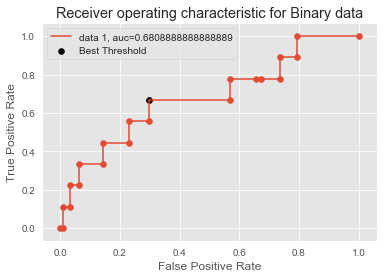

In [95]:
grid_params_lr = [{'penalty': ['l1', 'l2'],
                   'C': [1.0, 0.5, 0.1, 0.01, 0.001, 10],
                   'solver': ['newton-cg', 'lbfgs', 'liblinear']}] 

grid_params_svc = [{'kernel': ['rbf'],
                    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#                     'class_weight' : [weights, 'balanced', 'auto'],
                    'C': [0.1, 1, 10, 100, 1000]}]

grid_params_rf =  [{'n_estimators' : range(50,250,50),
                   'max_depth' : range(2,10,1),
                   'criterion' : ['gini','entropy'],
                   'max_leaf_nodes' : range(2,10,1),
                   'max_features' : ['auto','log2', 'sqrt']}] 

grid_params_dt = [{ 'criterion' : ['gini','entropy'],
                   'splitter' : ['best','random'],  
                   'max_depth' : range(2,10,1),
                   'max_features' : ['auto','log2', 'sqrt']}] 

grid_params_gbm = [{ "learning_rate" : [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
#                     "min_samples_split" : np.linspace(0.1, 0.5, 12),
#                     "min_samples_leaf" : np.linspace(0.1, 0.5, 12),
                    'max_depth' : range(2,10,1),
                    "max_features" : ["log2","sqrt", "auto"],
#                     "subsample" : [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
                    'n_estimators' : range(50,250,50)}] 

# grid_params_rus = [{'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6],
#                    'n_estimators': range(20,200,10)
#                    }]

# grid_params_een = [{'n_estimators':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}] 


grid_params_brf = [{'criterion': ['gini', 'entropy'],
                    'max_depth' : range(1,20,1),
                    'n_estimators' : range(100,250,50),
                    'max_features' : ["log2","sqrt", "auto"],
                    'max_leaf_nodes' : range(2,10,1)}]


# grid_params_ab = [{'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6],
#                    'n_estimators': range(20,200,10)
#                    }]

grid_params_xgb = [{
    "learning_rate"     : [0.05, 0.10, 0.20, 0.25, 0.30, 0.4, 0.5] ,
#                      "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
#                      "min_child_weight" : [ 1, 3, 5, 7 ],
                     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 1, 1.5, 2],
#                      "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
                     "scale_pos_weight" : [1, 2, 3, 4, 5, 7, 9, 11, 13, 15]}]



# Construct grid searches

gs_lr = GridSearchCV(estimator=classifiers[0],
                     param_grid=grid_params_lr,
                     cv=3,
                     n_jobs=-1,
                     verbose=2,
                     pre_dispatch='2*n_jobs',
                     refit=True)
   

gs_svc = GridSearchCV(estimator=classifiers[1],
                      param_grid=grid_params_svc,
                      scoring = 'roc_auc',
                      cv=3,
                      n_jobs=-1,
                      verbose=2,
                      pre_dispatch='2*n_jobs',
                      refit=True)

gs_rf = GridSearchCV(estimator=classifiers[2],
                     param_grid=grid_params_rf,
                      scoring = 'roc_auc',
                      cv=3,
                      n_jobs=-1,
                      verbose=2,
                      pre_dispatch='2*n_jobs',
                      refit=True)

gs_dt = GridSearchCV(estimator=classifiers[3],
                         param_grid=grid_params_dt,
                         scoring='roc_auc',
                         cv=3,
                         n_jobs=-1,
                         verbose=2,
                         pre_dispatch='2*n_jobs',
                         refit=True)

gs_gbm = GridSearchCV(estimator=classifiers[4],
                         param_grid=grid_params_gbm,
                         scoring='roc_auc',
                         cv=3,
                         n_jobs=-1,
                         verbose=2,
                         pre_dispatch='2*n_jobs',
                         refit=True)

# gs_rus = GridSearchCV(estimator=classifiers[5],
#                         param_grid=grid_params_rus,
#                         scoring='roc_auc',
#                         cv=3,
#                         n_jobs=1,
#                         verbose=2,
#                         pre_dispatch='2*n_jobs',
#                         refit=True)
# gs_een = GridSearchCV(estimator=classifiers[6],
#                           param_grid=grid_params_een,
#                           scoring='roc_auc',
#                           cv=3,
# #                          n_jobs=-1,
#                          verbose=2,
#                          pre_dispatch='2*n_jobs',
#                          refit=True)

gs_brf = GridSearchCV(estimator=classifiers[7],
                          param_grid=grid_params_brf,
                          scoring='roc_auc',
                          cv=3,
                          n_jobs=-1,
                          verbose=2,
                          pre_dispatch='2*n_jobs',
                          refit=True)

# gs_ab = GridSearchCV(estimator=AdaBoostClassifier(random_state=1),
#                         param_grid=grid_params_ab,
#                         scoring='roc_auc',
#                         cv=3,
#                         n_jobs=-1,
#                         verbose=2,
#                         pre_dispatch='2*n_jobs',
#                         refit=True)


gs_xgb = GridSearchCV(estimator=classifiers[10],
                      param_grid=grid_params_xgb,
                      scoring = 'roc_auc',
                      cv=3,
                      n_jobs=-1,
                      verbose=2,
                      pre_dispatch='2*n_jobs',
                      refit=True)


# List of pipelines for ease of iteration
# grids = [gs_lr, gs_svc, gs_rf, gs_dt, gs_gbm, gs_brf, gs_xgb] #gs_rus, gs_een, gs_ab, gs_xgb

grids = [gs_lr]
# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'SVC', 
             2: 'Random Forest', 3: 'Decision Tree', 
             4: 'Gradient Boost',
             5: 'Balanced Random Forest',
#              5: 'RUS Boost', 6: 'Easy Ensemble', 7: 'Balanced RF', 8: 'Balanced Bagging', 
             6: 'XgBoost'}

grid_dict = {0:'Balanced RF'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(x_orig, y_orig)
    print('Best params: %s' % gs.best_params_)
    print('Best training accuracy: %.3f' % gs.best_score_)
    y_pred = gs.predict_proba(X_test)
    print('AUC: %.3f ' % roc_auc_score(Y_test, y_pred[:,1]))
    Y_pred_prob = gs.predict_proba(X_test)[:,1]
#     Y_pred = Y_pred_prob.copy()
#     Y_pred[Y_pred>=0.51] = 1
#     Y_pred[Y_pred<0.51] = 0
#     metrics_score(Y_test, Y_pred_prob)
    metrics_score(Y_test, Y_pred_prob)
    print("\n")

In [56]:
def choose_model_list(param):
    
    if(param['model'] == 'lr'):
        classifier = LogisticRegression(C = param['C'], 
                                        solver = param['solver'], 
#                                         class_weight = param['class_weight'],
                                        random_state=1)

    elif(param['model'] == 'svc'):
        classifier = SVC(C = param['C'],
                                         gamma = param['gamma'],
                                         kernel = param['kernel'],
#                                          class_weight = param['class_weight'],
                                         probability = True,
                                         random_state=1)
    
    elif(param['model'] == 'rf'):
        classifier = RandomForestClassifier(criterion = param['criterion'],
                                        n_estimators = param['n_estimators'],
                                        max_features = param['max_features'],
#                                         class_weight = param['class_weight'],
                                        max_depth = param['max_depth'],
                                        max_leaf_nodes = param['max_leaf_nodes'],
                                        random_state=1)
    elif(param['model'] == 'dt'):
        classifier = DecisionTreeClassifier(max_depth = param['max_depth'],
                                        max_features = param['max_features'],
                                        criterion = param['criterion'],
                                        splitter = param['splitter'],
#                                         class_weight = param['class_weight'],
                                        random_state=1)
    elif(param['model'] == 'gbm'):
        classifier = GradientBoostingClassifier(
                                        learning_rate = param['learning_rate'],
                                        max_leaf_nodes = param['max_leaf_nodes'],
                                        max_depth = param['max_depth'],
                                        max_features = param['max_features'],
                                        n_estimators = param['n_estimators'],
                                        random_state=1)
        
    elif(param['model'] == 'brf'):
        classifier = BalancedRandomForestClassifier(criterion = param['criterion'],
                                        n_estimators = param['n_estimators'],
                                        max_features = param['max_features'],
#                                         class_weight = param['class_weight'],
                                        max_depth = param['max_depth'],
                                        max_leaf_nodes = param['max_leaf_nodes'],
                                        random_state=1)
    elif(param['model'] == 'xgb'):
        classifier = XGBClassifier(n_estimators = param['n_estimators'],
                                        max_depth = param['max_depth'],
                                        learning_rate = param['learning_rate'],
                                        gamma = param['gamma'],
                                        min_child_weight = param['min_child_weight'],
                                        subsample = param['subsample'],
                                        colsample_bytree = param['colsample_bytree'],
                                        seed=1)
    print(param['model'])
    classifier.fit(X_train, Y_train)
    Y_pred_prob = classifier.predict_proba(X_test)[:,1]
#     Y_pred = Y_pred_prob.copy()
#     print('AUC: %.3f ' % roc_auc_score(Y_test, Y_pred))
#     Y_pred[Y_pred>=0.51] = 1
#     Y_pred[Y_pred<0.51] = 0
#     metrics_score(Y_test, Y_pred, Y_pred_prob)
    metrics_score(Y_test, Y_pred_prob)
    print("\n")

new best:                                             
0.6824897959183673                                    
{'C': 0.0008068149919639427, 'class_weight': {0: 1, 1: 1}, 'model': 'lr', 'solver': 'liblinear'}
CrossValAUCMean:                                      
0.6824897959183673                                    
{'C': 0.0008068149919639427, 'class_weight': {0: 1, 1: 1}, 'model': 'lr', 'solver': 'liblinear'}
new best:                                                                        
0.6932721088435374                                                               
{'C': 0.07002700435558948, 'class_weight': {0: 1, 1: 1}, 'model': 'lr', 'solver': 'liblinear'}
CrossValAUCMean:                                                                 
0.6932721088435374                                                               
{'C': 0.07002700435558948, 'class_weight': {0: 1, 1: 1}, 'model': 'lr', 'solver': 'liblinear'}
CrossValAUCMean:                                                    

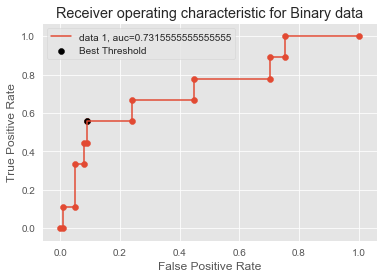



new best:                                             
0.6563503401360544                                    
{'C': 1, 'class_weight': {0: 1, 1: 1}, 'gamma': 1, 'kernel': 'linear', 'model': 'svc'}
CrossValAUCMean:                                      
0.6563503401360544                                    
{'C': 1, 'class_weight': {0: 1, 1: 1}, 'gamma': 1, 'kernel': 'linear', 'model': 'svc'}
CrossValAUCMean:                                                                 
0.3549897959183673                                                               
{'C': 1, 'class_weight': {0: 1, 1: 1}, 'gamma': 0.0001, 'kernel': 'sigmoid', 'model': 'svc'}
CrossValAUCMean:                                                                 
0.5447789115646259                                                               
{'C': 100, 'class_weight': {0: 1, 1: 1}, 'gamma': 1, 'kernel': 'poly', 'model': 'svc'}
CrossValAUCMean:                                                                 
0.585142857142

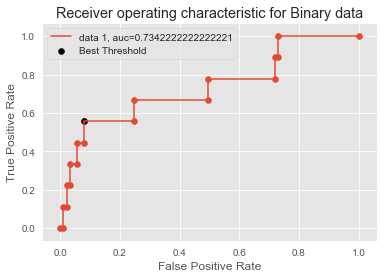



new best:                                             
0.6614149659863946                                    
{'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 12, 'max_features': 'log2', 'max_leaf_nodes': 6, 'model': 'rf', 'n_estimators': 150}
CrossValAUCMean:                                      
0.6614149659863946                                    
{'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 12, 'max_features': 'log2', 'max_leaf_nodes': 6, 'model': 'rf', 'n_estimators': 150}
CrossValAUCMean:                                                                 
0.630858843537415                                                                
{'class_weight': {0: 1, 1: 1}, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'model': 'rf', 'n_estimators': 150}
CrossValAUCMean:                                                                 
0.6607789115646259                                                              

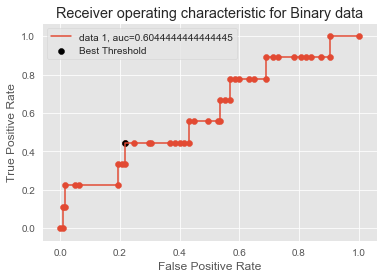



new best:                                             
0.6183163265306123                                    
{'class_weight': {0: 1, 1: 1}, 'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'model': 'dt', 'splitter': 'random'}
CrossValAUCMean:                                      
0.6183163265306123                                    
{'class_weight': {0: 1, 1: 1}, 'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'model': 'dt', 'splitter': 'random'}
CrossValAUCMean:                                                                 
0.5436802721088434                                                               
{'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'model': 'dt', 'splitter': 'random'}
CrossValAUCMean:                                                                 
0.5306020408163266                                                               
{'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_

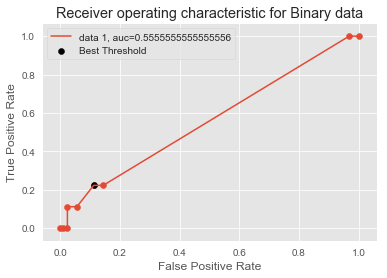



new best:                                             
0.5433469387755101                                    
{'learning_rate': 0.28, 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'model': 'gbm', 'n_estimators': 100}
CrossValAUCMean:                                      
0.5433469387755101                                    
{'learning_rate': 0.28, 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'model': 'gbm', 'n_estimators': 100}
new best:                                                                        
0.5660612244897958                                                               
{'learning_rate': 0.11, 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'model': 'gbm', 'n_estimators': 150}
CrossValAUCMean:                                                                 
0.5660612244897958                                                               
{'learning_rate': 0.11, 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 

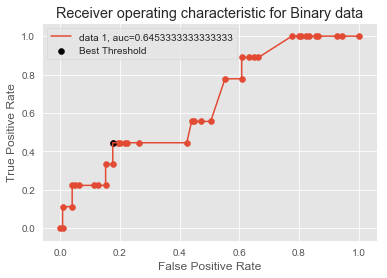



new best:                                             
0.6598129251700681                                    
{'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 13, 'max_features': 'auto', 'max_leaf_nodes': 5, 'model': 'brf', 'n_estimators': 100}
CrossValAUCMean:                                      
0.6598129251700681                                    
{'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 13, 'max_features': 'auto', 'max_leaf_nodes': 5, 'model': 'brf', 'n_estimators': 100}
new best:                                                                        
0.6700510204081633                                                               
{'class_weight': {0: 1, 1: 1}, 'criterion': 'entropy', 'max_depth': 17, 'max_features': 'log2', 'max_leaf_nodes': 5, 'model': 'brf', 'n_estimators': 150}
CrossValAUCMean:                                                                 
0.6700510204081633                                                          

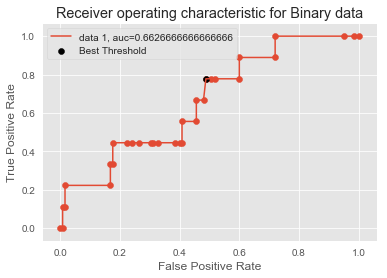



new best:                                             
0.5394353741496599                                    
{'colsample_bytree': 0.79, 'gamma': 0.34, 'learning_rate': 0.21, 'max_depth': 10, 'min_child_weight': 6.0, 'model': 'xgb', 'n_estimators': 110, 'subsample': 0.27}
CrossValAUCMean:                                      
0.5394353741496599                                    
{'colsample_bytree': 0.79, 'gamma': 0.34, 'learning_rate': 0.21, 'max_depth': 10, 'min_child_weight': 6.0, 'model': 'xgb', 'n_estimators': 110, 'subsample': 0.27}
CrossValAUCMean:                                                                 
0.5375510204081633                                                               
{'colsample_bytree': 0.75, 'gamma': 0.49, 'learning_rate': 0.35000000000000003, 'max_depth': 26, 'min_child_weight': 7.0, 'model': 'xgb', 'n_estimators': 45, 'subsample': 0.61}
new best:                                                                        
0.5858027210884353           

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields STDs:condylomatosis, STDs:vaginal condylomatosis, STDs:syphilis, STDs:pelvic inflammatory disease, STDs:genital herpes, STDs:molluscum contagiosum, STDs:HIV, STDs:Hepatitis B, STDs:HPV, Dx:Cancer, Dx:CIN, Dx:HPV, Dx:Result

In [96]:
from hyperopt import STATUS_OK
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score,  StratifiedKFold

best = 0
param ={}
def objective(space):
    warnings.filterwarnings(action='ignore', category=DeprecationWarning)

    if(space['model'] == 'lr'):
        classifier = LogisticRegression(C = space['C'], 
                                    solver = space['solver'])
#                                     class_weight = space['class_weight'])
    elif(space['model'] == 'svc'):
        classifier = SVC(C = space['C'],
                                    kernel = space['kernel'],
                                    gamma = space['gamma'],
                                    probability=True)
#                                     class_weight = space['class_weight'])
    elif(space['model'] == 'rf'):
        classifier = BalancedRandomForestClassifier(max_depth = space['max_depth'],
                                    max_features = space['max_features'],
                                    n_estimators = space['n_estimators'],
                                    criterion = space['criterion'],
                                    max_leaf_nodes = space['max_leaf_nodes'])
#                                     class_weight = space['class_weight'])
    elif(space['model'] == 'dt'):
        classifier = DecisionTreeClassifier(max_depth = space['max_depth'],
                                    max_features = space['max_features'],
                                    criterion = space['criterion'],
                                    splitter = space['splitter'])
#                                     class_weight = space['class_weight'])
    elif(space['model'] == 'gbm'):
        classifier = GradientBoostingClassifier(
                                    learning_rate = space['learning_rate'],
                                    max_leaf_nodes = space['max_leaf_nodes'],
                                    max_depth = space['max_depth'],
                                    max_features = space['max_features'],
                                    n_estimators = space['n_estimators'])
    elif(space['model'] == 'brf'):
        classifier = RandomForestClassifier(max_depth = space['max_depth'],
                                    max_features = space['max_features'],
                                    n_estimators = space['n_estimators'],
                                    criterion = space['criterion'],
                                    max_leaf_nodes = space['max_leaf_nodes'])
#                                     class_weight = space['class_weight'])
    elif(space['model'] == 'xgb'):
        x_orig[categorical_features] = x_orig[categorical_features].astype('str').astype('float').astype('int')
        X_test[categorical_features] = X_test[categorical_features].astype('str').astype('float').astype('int')
        classifier = XGBClassifier(n_estimators = space['n_estimators'],
                                   max_depth = int(space['max_depth']),
                                   learning_rate = space['learning_rate'],
                                   gamma = space['gamma'],
                                   min_child_weight = space['min_child_weight'],
                                   subsample = space['subsample'],
                                   colsample_bytree = space['colsample_bytree'])
        
#     classifier.fit(X_train, Y_train)
#     cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
#     accuracies = cross_val_score(classifier, X_train, Y_train, scoring='roc_auc', cv=cv, n_jobs=1)
#     CrossValMean = accuracies.mean()
    
    scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average = 'weighted'),
    'recall': make_scorer(recall_score, average = 'weighted'),
    'f1_macro': make_scorer(f1_score, average = 'weighted'),
    'f1_weighted': make_scorer(f1_score, average = 'weighted'),
    'auc': make_scorer(roc_auc_score, needs_proba=True)}
    
    imba_pipeline = Pipeline([('smote', BorderlineSMOTE(random_state=1, k_neighbors=5, kind='borderline-2')), 
                              ('classifier', classifier)])
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    scores = cross_validate(imba_pipeline, x_orig, y_orig, scoring=scoring, cv=cv, n_jobs=1)
#     print("auc", mean(scores['test_auc']))
    CrossValMean = mean(scores['test_auc'])
    
    global best
    global param
    
    if CrossValMean > best:
        best = CrossValMean
        param = space
        print ('new best:', best, param)
    print("CrossValAUCMean:", CrossValMean, space)
    return{'loss':-CrossValMean, 'status': STATUS_OK }


space_lr = {
            'model': 'lr',
            'C' : hp.loguniform('C', low=-4*np.log(10), high=4*np.log(10)),
            'solver' : hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear']),
            'class_weight' : hp.choice('class_weight', [weights])}

space_svc = { 
            'model':'svc',
             'C': hp.choice('C', [0.1, 1, 10, 100]),
             'kernel': hp.choice('kernel', ['linear', 'sigmoid', 'poly', 'rbf']),
             'gamma': hp.choice('gamma', [1, 0.1, 0.001, 0.0001]),
             'class_weight' : hp.choice('class_weight', [weights])}

space_rf = {
            'model':'rf',
            'max_depth': hp.choice('max_depth', range(1,20)),
            'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2']),
            'n_estimators': hp.choice('n_estimators', range(100, 250, 50)),
            'criterion': hp.choice('criterion', [ "entropy","gini"]),
            'max_leaf_nodes' : hp.choice('max_leaf_nodes', range(2,10)),
            'class_weight' : hp.choice('class_weight', [weights])}
space_dt = {
            'model' : 'dt',
            'max_depth': hp.choice('max_depth', range(1,20)),
            'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2']),
            'splitter': hp.choice('splitter', ['random', 'best']),
            'criterion': hp.choice('criterion', ["entropy","gini"]),
            'class_weight' : hp.choice('class_weight', [weights])}


space_gbm = {
            'model' : 'gbm',
            'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
            'max_depth': hp.choice('max_depth', range(1,20)),
            'max_leaf_nodes' : hp.choice('max_leaf_nodes', range(2,10)),
            'n_estimators': hp.choice('n_estimators', range(100, 250, 50)),
            'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2'])}

space_brf = {
            'model':'brf',
            'max_depth': hp.choice('max_depth', range(1,20)),
            'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2']),
            'n_estimators': hp.choice('n_estimators', range(100, 250, 50)),
            'criterion': hp.choice('criterion', [ "entropy","gini"]),
            'max_leaf_nodes' : hp.choice('max_leaf_nodes', range(2,10)),
            'class_weight' : hp.choice('class_weight', [weights])}


space_xgb = {
            'model':'xgb',
            'max_depth' : hp.choice('max_depth', range(5, 30, 1)),
            'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
            'n_estimators' : hp.choice('n_estimators', range(20, 205, 5)),
            'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
            'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
            'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
            'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01)}


space_list = [space_lr, space_svc, space_rf, space_dt, space_gbm, space_brf, space_xgb]
for space in space_list:
    trials = Trials()
    optim = fmin(fn=objective,
                 space=space,
                 algo=tpe.suggest,
                 max_evals=50,
                 trials=trials)
    print ('Best:', best, param)
    choose_model_list(param)
    best = 0
    param = {}

Actual       0  1
Predicted        
0.0          3  0
1.0        125  6


              precision    recall  f1-score   support

           0       1.00      0.02      0.05       128
           1       0.05      1.00      0.09         6

    accuracy                           0.07       134
   macro avg       0.52      0.51      0.07       134
weighted avg       0.96      0.07      0.05       134





Area under the curve:  0.4921875


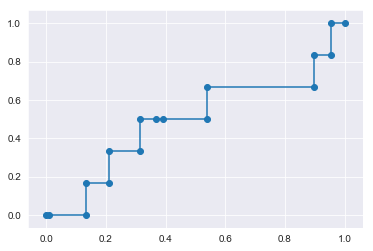

In [372]:

pipe = Pipeline([
        ('preprocessor', preprocessor), ('classifier', classifiers[7])])

pipe.fit(X_train1, Y_train1)

# fit_model(pipe.predict(X_test), Y_test)
Y_pred_proba = pipe.predict_proba(X_test)[:,1]
Y_pred_brf = Y_pred_proba.copy()
Y_pred_brf[Y_pred_brf>0.5] = 1
Y_pred_brf[Y_pred_brf<0.5] = 0

metrics_score(Y_test, Y_pred_brf, Y_pred_proba)

In [370]:
Counter(Y_train1)

Counter({0: 510, 1: 24})

In [90]:
# pd.DataFrame(Y_pred, columns=["Prediction"]).to_csv('shubh.csv', index=False)

In [1252]:
from imblearn.over_sampling import SMOTE

print("Before Sampling")
print(Counter(Y))

X = m.iloc[:, 0:22]
X['Biopsy'] = m['Biopsy']
Y = m['Risk Assessment(HSC)']

sm = SMOTE(random_state = 1, k_neighbors = 5)
X_samp, Y_samp = sm.fit_resample(X, Y) 

print("After Sampling")
print(Counter(Y_samp))

Before Sampling
Counter({0: 428, 1: 39, 2: 36, 3: 7})


ValueError: Unknown label type: 'unknown'

In [5]:
a = np.random.randn(4, 3) # a.shape = (4, 3)
b = np.random.randn(3, 2) # b.shape = (3, 2)
c = a*b
print(a)
print(b)
print(c)

ValueError: operands could not be broadcast together with shapes (4,3) (3,2) 

In [1028]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


from imblearn.under_sampling import CondensedNearestNeighbour
# cnn = CondensedNearestNeighbour(random_state=1, n_seeds_S=100) # doctest: +SKIP
# X_smt, Y_smt = cnn.fit_resample(X, Y)

from imblearn.under_sampling import TomekLinks
# tl = TomekLinks()
# X_smt, Y_smt = tl.fit_sample(X_train, Y_train)

from imblearn.under_sampling import EditedNearestNeighbours
# enn = EditedNearestNeighbours()
# X_smt, Y_smt = enn.fit_resample(X_train, Y_train)

from imblearn.combine import SMOTETomek
# smt = SMOTETomek(random_state=1)
# X_smt, Y_smt = smt.fit_resample(X_train, Y_train)

from imblearn.combine import SMOTEENN
# smt = SMOTEENN(random_state=1)
# X_smt, Y_smt = smt.fit_resample(X_train, Y_train)

from imblearn.over_sampling import SVMSMOTE
# smt = SVMSMOTE(random_state=1)
# X_smt, Y_smt = smt.fit_sample(X_train, Y_train)

from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 1, k_neighbors = 4)
# X_smt, Y_smt = smt.fit_resample(X_train, Y_train)

from imblearn.over_sampling import SMOTENC
# smote_nc = SMOTENC(categorical_features=[1,3,8,9,10,11,12,13,14,15,16,17,18,19,20,21]\
#                    , random_state=0)
# X_smt, Y_smt = smote_nc.fit_resample(X_train, Y_train)

from imblearn.over_sampling import BorderlineSMOTE
# sm = BorderlineSMOTE(random_state=1, k_neighbors=4, kind='borderline-2')
# X_smt, Y_smt = sm.fit_resample(X_train, Y_train)


from imblearn.over_sampling import ADASYN
# ada = ADASYN(random_state=1)
# X_smt, Y_smt = ada.fit_resample(X_train, Y_train)

# print(Counter(Y_smt))

print(Counter(Y_train))
print(Counter(Y_test))

rf = RandomForestClassifier(n_estimators=300, random_state=1)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
confusion_matrix = pd.crosstab(Y_pred_rf, Y_test)
print(confusion_matrix)
print("\n")
print(multiclass_roc_auc_score(Y_test, Y_pred_rf), end="\n\n")

from sklearn.ensemble import GradientBoostingClassifier
baseline = GradientBoostingClassifier(random_state=1)
baseline.fit(X_train, Y_train)
Y_pred_gbm = baseline.predict(X_test)
confusion_matrix = pd.crosstab(Y_pred_gbm, Y_test)
print(confusion_matrix)
print("\n")
print(multiclass_roc_auc_score(Y_test, Y_pred_gbm))


In [325]:
# Tomek

X = m.drop(['Hinselmann','Schiller','Cytology', 'Risk Assessment(HSC)', 'Biopsy', 'HSC_results', 'HSCB_results',\
            'HSC_results_n', 'HSCB_results_n'], axis=1)
Y = m['Biopsy']


from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X, Y = tl.fit_sample(X, Y)

In [326]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, test_size=0.2, random_state=1, stratify=Y)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Counter(Y_train))
print(Counter(Y_test))

(522, 22)
(131, 22)
(522,)
(131,)
Counter({0: 486, 1: 36})
Counter({0: 122, 1: 9})


In [327]:
from imblearn.over_sampling import SMOTE

print("Before Sampling")
print(Counter(Y_train))

sm = SMOTE(random_state = 1, k_neighbors = 5)
X_train_res, Y_train_res = sm.fit_sample(X_train, Y_train.ravel()) 

print("After Sampling")
print(Counter(Y_train_res))

Before Sampling
Counter({0: 486, 1: 36})
After Sampling
Counter({0: 486, 1: 486})


In [330]:
diff_class_weight = int(Y_train.value_counts()[0]/Y_train.value_counts()[1])
diff_class_weight

15

In [336]:
Y_train.value_counts()

0    468
1     31
2     29
3      6
Name: Risk Assessment(HSC), dtype: int64

In [21]:
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.metrics import f1_score, fbeta_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.metrics import (geometric_mean_score, make_index_balanced_accuracy)

def metrics_score(Y_test, Y_pred, Y_pred_prob):
    print("f-beta 1: ",f1_score(Y_test,Y_pred))
    print("f-beta 2: ",fbeta_score(Y_test,Y_pred,beta=2.0))
    print("\n")
    print(pd.crosstab(Y_pred, Y_test))
    print("\n")
    print(classification_report(Y_test, Y_pred))
    print("\n")
    print('The geometric mean is {}'.format(geometric_mean_score(Y_test, Y_pred)))
    
    fpr, tpr, _ = roc_curve(Y_test,  Y_pred_prob)
    auc = roc_auc_score(Y_test, Y_pred_prob)
    print("\n")
    print("Area under the curve: ", auc)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.scatter(fpr, tpr)
    plt.show()
    

In [330]:
# Balanced Random Forest classifier using Hyper-parameter tuning

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

def Balanced_RandomForest_parameter_tuning(X_train, Y_train):
    param_grid = { 
       'n_estimators': [100, 300, 500],
       'min_samples_leaf': [2, 3, 4],
       'max_features': ['auto', 'sqrt', 'log2'],
       'criterion' :['gini', 'entropy'],
        'max_depth': [8, 10, 12]
    }

    brf = BalancedRandomForestClassifier(random_state=1)

    ftwo_scorer = make_scorer(fbeta_score, beta=1)

    cv_brf = GridSearchCV(estimator=brf, 
                         param_grid=param_grid, 
                         scoring = 'roc_auc',
                         cv=3,
                         n_jobs=-1,
                         verbose=2,
                         pre_dispatch='2*n_jobs',
                         refit=True)
    cv_brf.fit(X_train, Y_train)
    return(cv_brf)

In [342]:
# Balanced Random Forest classifier using different weights & Hyper-parameter tuning

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def Balanced_RandomForest_weights_parameter_tuning(X_train, Y_train):
    param_grid = { 
       'n_estimators': [100, 300, 500],
       'min_samples_leaf': [2, 3, 4],
       'max_features': ['auto', 'sqrt', 'log2'],
       'criterion' :['gini', 'entropy'],
        'max_depth': [8, 10, 12]
    }

    brf = BalancedRandomForestClassifier(random_state=1, class_weight={0:1,1:diff_class_weight})

    cv_rfc = GridSearchCV(estimator=brf, 
                         param_grid=param_grid, 
                         scoring = 'roc_auc',
                         cv=3, 
                         n_jobs=-1,
                         verbose=2,
                         pre_dispatch='2*n_jobs',
                         refit=True)
    cv_rfc.fit(X_train, Y_train)
    return(cv_rfc)

In [368]:
def RandomForest_parameter_tuning(X_train, Y_train):
    param_grid = { 
       'n_estimators': [100, 300, 500],
       'min_samples_leaf': [2, 3, 4],
       'max_features': ['auto', 'sqrt', 'log2'],
       'criterion' :['gini', 'entropy'],
        'max_depth': [8, 10, 12]
    }

    rf = RandomForestClassifier(random_state=1)

    ftwo_scorer = make_scorer(fbeta_score, beta=1)

    cv_rf = GridSearchCV(estimator=rf, 
                         param_grid=param_grid, 
                         scoring = 'roc_auc',
                         cv=3,
                         n_jobs=-1,
                         verbose=2,
                         pre_dispatch='2*n_jobs',
                         refit=True)
    cv_rf.fit(X_train, Y_train)
    return(cv_rf)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:  3.8min finished


f-beta 1:  0.2580645161290322
f-beta 2:  0.3448275862068965


Biopsy    0  1
row_0         
0.0     104  5
1.0      18  4


              precision    recall  f1-score   support

           0       0.95      0.85      0.90       122
           1       0.18      0.44      0.26         9

    accuracy                           0.82       131
   macro avg       0.57      0.65      0.58       131
weighted avg       0.90      0.82      0.86       131



The geometric mean is 0.6155247143313103


Area under the curve:  0.7504553734061931


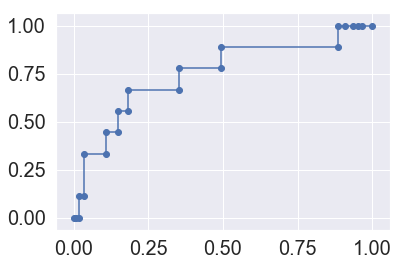

In [333]:
# Balanced Random Forest using Hyper-parameter tuning

# cv_brf = Balanced_RandomForest_parameter_tuning(X_train, Y_train)
# cv_brf.best_params_
Y_pred_proba = cv_brf.predict_proba(X_test)[:,1]
Y_pred_brf = Y_pred_proba.copy()
Y_pred_brf[Y_pred_brf>0.57] = 1
Y_pred_brf[Y_pred_brf<0.57] = 0

metrics_score(Y_test, Y_pred_brf, Y_pred_proba)

f-beta 1:  0.29090909090909095
f-beta 2:  0.4878048780487805


Biopsy   0  1
row_0        
0.0     84  1
1.0     38  8


              precision    recall  f1-score   support

           0       0.99      0.69      0.81       122
           1       0.17      0.89      0.29         9

    accuracy                           0.70       131
   macro avg       0.58      0.79      0.55       131
weighted avg       0.93      0.70      0.78       131



The geometric mean is 0.7823182587179576


Area under the curve:  0.7859744990892531


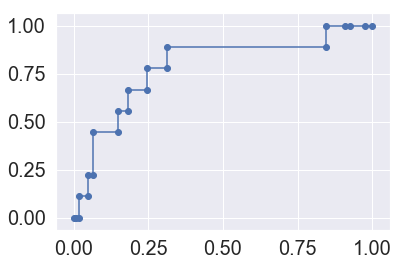

In [357]:
# Balanced Random Forest classifier using different weights & Hyper-parameter tuning

# cv_rfc = Balanced_RandomForest_weights_parameter_tuning(X_train, Y_train)
# cv_rfc.best_params_
Y_pred_proba = cv_rfc.predict_proba(X_test)[:,1]

Y_pred_brf = Y_pred_proba.copy()

Y_pred_brf[Y_pred_brf>0.75] = 1
Y_pred_brf[Y_pred_brf<0.75] = 0

metrics_score(Y_test, Y_pred_brf, Y_pred_proba)


f-beta 1:  0.3333333333333333
f-beta 2:  0.5072463768115942


Biopsy   0  1
row_0        
0.0     96  2
1.0     26  7


              precision    recall  f1-score   support

           0       0.98      0.79      0.87       122
           1       0.21      0.78      0.33         9

    accuracy                           0.79       131
   macro avg       0.60      0.78      0.60       131
weighted avg       0.93      0.79      0.84       131



The geometric mean is 0.7823182587179576


Area under the curve:  0.7941712204007286


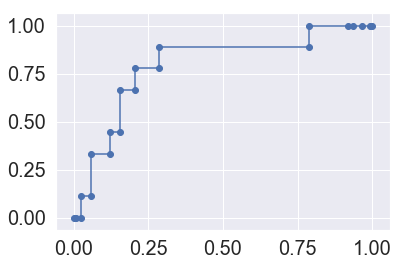

In [364]:
# Balanced Random Forest classifier using weights but without hyper-parameter tuning

from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=300, random_state=1, class_weight={0:1,1:diff_class_weight})
brf.fit(X_train,Y_train)
Y_pred_proba = brf.predict_proba(X_test)[:,1]
Y_pred_brf = Y_pred_proba.copy()
Y_pred_brf[Y_pred_brf>0.77] = 1
Y_pred_brf[Y_pred_brf<0.77] = 0

metrics_score(Y_test, Y_pred_brf, Y_pred_proba)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:  5.1min finished


f-beta 1:  0.15384615384615383
f-beta 2:  0.125


Biopsy    0  1
row_0         
0.0     119  8
1.0       3  1


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       122
           1       0.25      0.11      0.15         9

    accuracy                           0.92       131
   macro avg       0.59      0.54      0.55       131
weighted avg       0.89      0.92      0.90       131



The geometric mean is 0.32920946322053474


Area under the curve:  0.5865209471766849


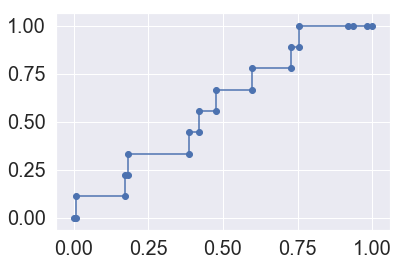

In [366]:
# Balanced Random Forest classifier using SMOTE data and hyper-parameter tuning

from imblearn.ensemble import BalancedRandomForestClassifier

# cv_brf = Balanced_RandomForest_parameter_tuning(X_train_res, Y_train_res)
# cv_brf.best_params_
Y_pred_proba = cv_brf.predict_proba(X_test)[:,1]
Y_pred_brf = Y_pred_proba.copy()
Y_pred_brf[Y_pred_brf>0.57] = 1
Y_pred_brf[Y_pred_brf<0.57] = 0

metrics_score(Y_test, Y_pred_brf, Y_pred_proba)

In [369]:
# Random Forest classification using class-weight but without hyper-parameter tuning

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, class_weight= {0:1, 1:diff_class_weight}, random_state=1)
rf.fit(X_train,Y_train)

Y_pred_rf = rf.predict(X_test)
print(f1_score(Y_test,Y_pred_rf))
print(fbeta_score(Y_test,Y_pred_rf,beta=2.0))
confusion_matrix = pd.crosstab(Y_pred_rf, Y_test)
print(confusion_matrix)
print("\n")


# Random Forest classification using Smote data but without hyper-parameter tuning

rf = RandomForestClassifier(n_estimators=300, random_state=1)
rf.fit(X_train_res, Y_train_res)

Y_pred_rf = rf.predict(X_test)
print(f1_score(Y_test,Y_pred_rf))
print(fbeta_score(Y_test,Y_pred_rf,beta=2.0))
confusion_matrix = pd.crosstab(Y_pred_rf, Y_test)
print(confusion_matrix)


# Random Forest classification using Smote data & hyper-parameter tuning

rf = RandomForest_parameter_tuning(X_train_res, Y_train_res)
Y_pred_rf = rf.predict(X_test)
print(f1_score(Y_test,Y_pred_rf))
print(fbeta_score(Y_test,Y_pred_rf,beta=2.0))
confusion_matrix = pd.crosstab(Y_pred_rf, Y_test)
print(confusion_matrix)


0.0
0.0
Biopsy    0  1
row_0         
0       120  9
1         2  0


0.11764705882352941
0.11363636363636363
Biopsy    0  1
row_0         
0       115  8
1         7  1
Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:  2.7min finished


0.11764705882352941
0.11363636363636363
Biopsy    0  1
row_0         
0       115  8
1         7  1


f-beta 1:  0.380952380952381
f-beta 2:  0.41666666666666663


Biopsy    0  1
row_0         
0.0     114  5
1.0       8  4


              precision    recall  f1-score   support

           0       0.96      0.93      0.95       122
           1       0.33      0.44      0.38         9

    accuracy                           0.90       131
   macro avg       0.65      0.69      0.66       131
weighted avg       0.92      0.90      0.91       131



The geometric mean is 0.6444381634013363


Area under the curve:  0.674863387978142


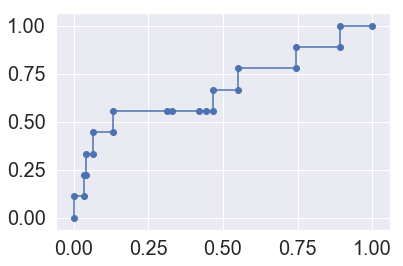

f-beta 1:  0.3157894736842105
f-beta 2:  0.32608695652173914


Biopsy    0  1
row_0         
0.0     115  6
1.0       7  3


              precision    recall  f1-score   support

           0       0.95      0.94      0.95       122
           1       0.30      0.33      0.32         9

    accuracy                           0.90       131
   macro avg       0.63      0.64      0.63       131
weighted avg       0.91      0.90      0.90       131



The geometric mean is 0.5605422823242008


Area under the curve:  0.6657559198542804


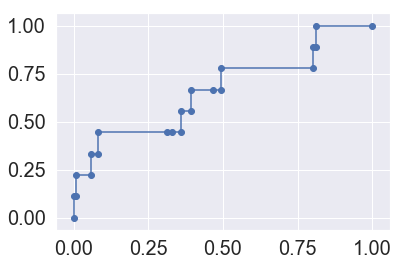

In [370]:
# XGBoost classification without hyper-parameter tuning

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(seed=1)
xgb.fit(X_train,Y_train)

Y_pred_proba = xgb.predict_proba(X_test)[:,1]
Y_pred_xgb = Y_pred_proba.copy()

Y_pred_xgb[Y_pred_xgb>0.10] = 1
Y_pred_xgb[Y_pred_xgb<0.10] = 0

metrics_score(Y_test, Y_pred_xgb, Y_pred_proba)


# XGBoost classififcation using class-weight as a hyper-parameter

xgb = XGBClassifier(scale_pos_weight=diff_class_weight,seed=1)
xgb.fit(X_train,Y_train)

Y_pred_proba = xgb.predict_proba(X_test)[:,1]
Y_pred_xgb = Y_pred_proba.copy()

Y_pred_xgb[Y_pred_xgb>0.55] = 1
Y_pred_xgb[Y_pred_xgb<0.55] = 0

metrics_score(Y_test, Y_pred_xgb, Y_pred_proba)

In [440]:
# XGBoost classififcation using hyper-parameter tuning

def XGB_parameter_weights_tuning(X_train, Y_train):
    xgb = XGBClassifier(seed=1)
    parameters = {
         "eta"    : [0.05, 0.10, 0.15] ,
         "max_depth"        : [ 5, 7, 10],
#          "min_child_weight" : [ 1, 3, 5],
         "gamma"            : [ 0.0, 0.1, 0.2],
#          "colsample_bytree" : [ 0.3, 0.4, 0.5 ],
        "max_delta_step" : [1, 2, 3, 4, 5],
        "booster" : ['gbtree', 'gblinear', 'dart'],
        "scale_pos_weight" : [1, 3, 5, 7, 9, 11, 13, 15],
        "eval_metric" : ['auc']
         }

    cv_xgb = GridSearchCV(xgb,
                        parameters,
                        scoring='roc_auc',
                        cv=3,
                        n_jobs=-1,
                        verbose=2,
                        pre_dispatch='2*n_jobs',
                        refit=True)

    cv_xgb.fit(X_train, Y_train)
    return(cv_xgb)

Fitting 3 folds for each of 3240 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3286 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 4824 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6526 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 8388 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 9565 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 9720 out of 9720 | elapsed:  9.6min finished


0.6282578875171468 {'booster': 'gblinear', 'eta': 0.15, 'eval_metric': 'auc', 'gamma': 0.0, 'max_delta_step': 1, 'max_depth': 5, 'scale_pos_weight': 9} 

f-beta 1:  0.27272727272727276
f-beta 2:  0.30612244897959184


Biopsy    0  1
row_0         
0.0     112  6
1.0      10  3


              precision    recall  f1-score   support

           0       0.95      0.92      0.93       122
           1       0.23      0.33      0.27         9

    accuracy                           0.88       131
   macro avg       0.59      0.63      0.60       131
weighted avg       0.90      0.88      0.89       131



The geometric mean is 0.5531825457855197


Area under the curve:  0.7422586520947176


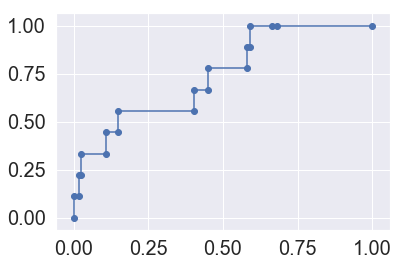

In [441]:
# XGBoost classififcation using weights & hyper-parameter tuning

cv_xgb = XGB_parameter_weights_tuning(X_train, Y_train)
print(cv_xgb.best_score_, cv_xgb.best_params_, end=' \n\n')

# means = cv_xgb.cv_results_['mean_test_score']
# params = cv_xgb.cv_results_['params']

# for mean, param in zip(means, params):
#     print(mean, param)
#     print("")

Y_pred_proba = cv_xgb.predict_proba(X_test)[:,1]
Y_pred_xgb = Y_pred_proba.copy()

Y_pred_xgb[Y_pred_xgb>0.64] = 1
Y_pred_xgb[Y_pred_xgb<0.64] = 0

metrics_score(Y_test, Y_pred_xgb, Y_pred_proba)

In [442]:
# XGBoost classififcation using hyper-parameter tuning

def XGB_parameter_tuning(X_train, Y_train):
    xgb = XGBClassifier(seed=1)
    parameters = {
         "eta"    : [0.05, 0.10, 0.15] ,
         "max_depth"        : [ 5, 7, 10],
         "min_child_weight" : [ 1, 3, 5],
         "gamma"            : [ 0.0, 0.1, 0.2],
         "colsample_bytree" : [ 0.3, 0.4, 0.5 ],
        "max_delta_step" : [1, 2, 3, 4, 5],
        "booster" : ['gbtree', 'gblinear', 'dart']
         }

    cv_xgb = GridSearchCV(xgb,
                        parameters,
                        scoring='roc_auc',
                        cv=3,
                        n_jobs=-1,
                        verbose=2,
                        pre_dispatch='2*n_jobs',
                        refit=True)

    cv_xgb.fit(X_train, Y_train)
    return(cv_xgb)

Fitting 3 folds for each of 3645 candidates, totalling 10935 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

f-beta 1:  0.16216216216216214
f-beta 2:  0.23437499999999997


Biopsy   0  1
row_0        
0.0     97  6
1.0     25  3


              precision    recall  f1-score   support

           0       0.94      0.80      0.86       122
           1       0.11      0.33      0.16         9

    accuracy                           0.76       131
   macro avg       0.52      0.56      0.51       131
weighted avg       0.88      0.76      0.81       131



The geometric mean is 0.5148080442304409


Area under the curve:  0.6821493624772312


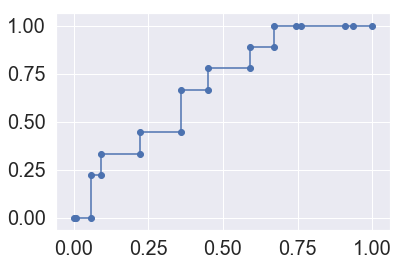

In [443]:
# XGBoost classififcation using Smote data & hyper-parameter tuning

cv_xgb = XGB_parameter_tuning(X_train_res, Y_train_res)
Y_pred_proba = cv_xgb.predict_proba(X_test)[:,1]
Y_pred_xgb = Y_pred_proba.copy()

Y_pred_xgb[Y_pred_xgb>0.21] = 1
Y_pred_xgb[Y_pred_xgb<0.21] = 0

metrics_score(Y_test, Y_pred_xgb, Y_pred_proba)

f-beta 1:  0.24000000000000005
f-beta 2:  0.2884615384615385


Biopsy    0  1
row_0         
0.0     109  6
1.0      13  3


              precision    recall  f1-score   support

           0       0.95      0.89      0.92       122
           1       0.19      0.33      0.24         9

    accuracy                           0.85       131
   macro avg       0.57      0.61      0.58       131
weighted avg       0.90      0.85      0.87       131



The geometric mean is 0.545723563400256


Area under the curve:  0.6721311475409836


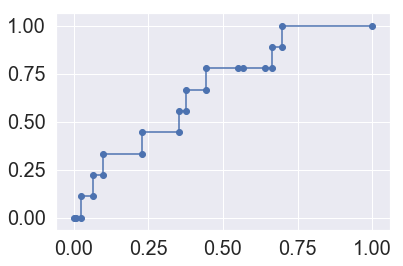

In [445]:
# XGBoost classification using Smote data

xgb = XGBClassifier(seed=1)
xgb.fit(X_train_res, Y_train_res)

Y_pred_proba = xgb.predict_proba(X_test)[:,1]
Y_pred_xgb = Y_pred_proba.copy()

Y_pred_xgb[Y_pred_xgb>0.4] = 1
Y_pred_xgb[Y_pred_xgb<0.4] = 0

metrics_score(Y_test, Y_pred_xgb, Y_pred_proba)

In [307]:
# For SMOTE_TOMEK & SMOTE_EEN

from sklearn.model_selection import train_test_split
from collections import Counter

X = m.drop(['Hinselmann','Schiller','CytologyCitology', 'Risk Assessment(HSC)', 'Biopsy', 'HSC_results', 'HSCB_results',\
            'HSC_results_n', 'HSCB_results_n'], axis=1)
Y = m['Biopsy']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, test_size=0.2, random_state=1, stratify=Y)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Counter(Y_train))
print(Counter(Y_test))

(534, 22)
(134, 22)
(534,)
(134,)
Counter({0: 498, 1: 36})
Counter({0: 125, 1: 9})


(534, 22)
(980, 22)
Counter({0: 498, 1: 36})
Counter({0: 490, 1: 490})


f-beta 1:  0.19999999999999998
f-beta 2:  0.2127659574468085


Biopsy    0  1
row_0         
0.0     116  7
1.0       9  2


              precision    recall  f1-score   support

           0       0.94      0.93      0.94       125
           1       0.18      0.22      0.20         9

    accuracy                           0.88       134
   macro avg       0.56      0.58      0.57       134
weighted avg       0.89      0.88      0.89       134



The geometric mean is 0.4541169697580374


Area under the curve:  0.6524444444444445


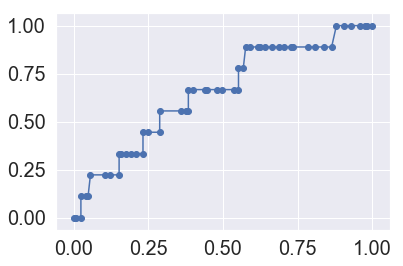

In [308]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=1,)
X_smt, Y_smt = smt.fit_sample(X_train, Y_train)

print(X_train.shape)
print(X_smt.shape)


print(Counter(Y_train))
print(Counter(Y_smt))
print("\n")


# Random Forest classification using Smote_TOMEK data

rf = RandomForestClassifier(n_estimators=300, random_state=1)
rf.fit(X_smt, Y_smt)
Y_pred_proba = rf.predict_proba(X_test)[:,1]
Y_pred_rf = Y_pred_proba.copy()
Y_pred_rf[Y_pred_rf>0.56] = 1
Y_pred_rf[Y_pred_rf<0.56] = 0

metrics_score(Y_test, Y_pred_rf, Y_pred_proba)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:  2.9min finished


f-beta 1:  0.06666666666666667
f-beta 2:  0.08771929824561403


Biopsy    0  1
row_0         
0.0     105  8
1.0      20  1


              precision    recall  f1-score   support

           0       0.93      0.84      0.88       125
           1       0.05      0.11      0.07         9

    accuracy                           0.79       134
   macro avg       0.49      0.48      0.47       134
weighted avg       0.87      0.79      0.83       134



Area under the curve:  0.5920000000000001


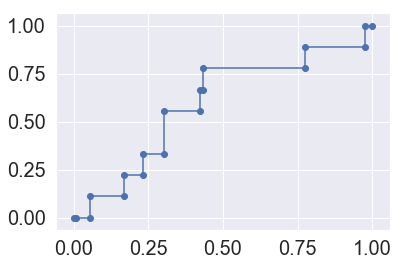

In [160]:
# Random Forest classification using Smote_TOMEK data & hyper-parameter tuning

# rf = RandomForest_parameter_tuning(X_smt,Y_smt)
Y_pred_proba = rf.predict_proba(X_test)[:,1]
Y_pred_rf = Y_pred_proba.copy()
Y_pred_rf[Y_pred_rf>0.5] = 1
Y_pred_rf[Y_pred_rf<0.5] = 0

metrics_score(Y_test, Y_pred_rf, Y_pred_proba)

In [ ]:
# XGBoost classification using Smote_TOMEK data
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(seed=1)
xgb.fit(X_smt,Y_smt)

Y_pred_proba = xgb.predict_proba(X_test)[:,1]
Y_pred_xgb = Y_pred_proba.copy()

Y_pred_xgb[Y_pred_xgb>0.30] = 1
Y_pred_xgb[Y_pred_xgb<0.30] = 0

metrics_score(Y_test, Y_pred_xgb, Y_pred_proba)

In [ ]:
# XGBoost classififcation using Smote_TOMEK data & hyper-parameter tuning

cv_xgb = XGB_parameter_tuning(X_smt, Y_smt)
Y_pred_proba = cv_xgb.predict_proba(X_test)[:,1]
Y_pred_xgb = Y_pred_proba.copy()

Y_pred_xgb[Y_pred_xgb>0.21] = 1
Y_pred_xgb[Y_pred_xgb<0.21] = 0

metrics_score(Y_test, Y_pred_xgb, Y_pred_proba)

(534, 22)
(741, 22)
Counter({0: 498, 1: 36})
Counter({1: 436, 0: 305})


f-beta 1:  0.15000000000000002
f-beta 2:  0.22388059701492535


Biopsy   0  1
row_0        
0.0     97  6
1.0     28  3


              precision    recall  f1-score   support

           0       0.94      0.78      0.85       125
           1       0.10      0.33      0.15         9

    accuracy                           0.75       134
   macro avg       0.52      0.55      0.50       134
weighted avg       0.88      0.75      0.80       134



Area under the curve:  0.6431111111111111


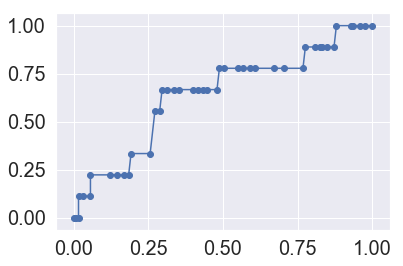

In [178]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN(random_state=1)
X_smt, Y_smt = smt.fit_resample(X_train, Y_train)

print(X_train.shape)
print(X_smt.shape)


print(Counter(Y_train))
print(Counter(Y_smt))
print("\n")


# Random Forest classification using Smote_ENN

rf = RandomForestClassifier(n_estimators=300, random_state=1)
rf.fit(X_smt,Y_smt)

Y_pred_proba = rf.predict_proba(X_test)[:,1]
Y_pred_rf = Y_pred_proba.copy()
Y_pred_rf[Y_pred_rf>=0.5] = 1
Y_pred_rf[Y_pred_rf<0.5] = 0
metrics_score(Y_test, Y_pred_rf, Y_pred_proba)

f-beta 1:  0.13636363636363638
f-beta 2:  0.21126760563380279


Biopsy   0  1
row_0        
0.0     93  6
1.0     32  3


              precision    recall  f1-score   support

           0       0.94      0.74      0.83       125
           1       0.09      0.33      0.14         9

    accuracy                           0.72       134
   macro avg       0.51      0.54      0.48       134
weighted avg       0.88      0.72      0.78       134



Area under the curve:  0.6257777777777778


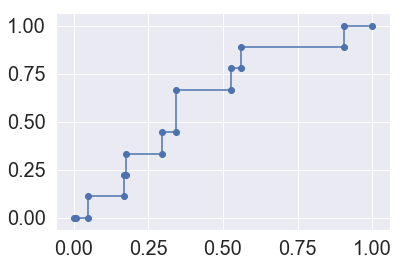

In [155]:
# Random Forest classification using Smote_ENN data & hyper-parameter tuning

# rf = RandomForest_parameter_tuning(X_smt,Y_smt)
Y_pred_proba = rf.predict_proba(X_test)[:,1]
Y_pred_rf = Y_pred_proba.copy()
Y_pred_rf[Y_pred_rf>0.5] = 1
Y_pred_rf[Y_pred_rf<0.5] = 0

metrics_score(Y_test, Y_pred_rf, Y_pred_proba)

f-beta 1:  0.18518518518518515
f-beta 2:  0.308641975308642


Biopsy   0  1
row_0        
0.0     85  4
1.0     40  5


              precision    recall  f1-score   support

           0       0.96      0.68      0.79       125
           1       0.11      0.56      0.19         9

    accuracy                           0.67       134
   macro avg       0.53      0.62      0.49       134
weighted avg       0.90      0.67      0.75       134

The geometric mean is 0.6146362971528592


Area under the curve:  0.6173333333333334


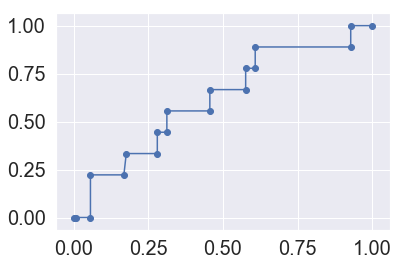

In [185]:
# Using XGBoost classification using Smote_ENN data
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(seed=1)
xgb.fit(X_smt,Y_smt)

Y_pred_proba = xgb.predict_proba(X_test)[:,1]
Y_pred_xgb = Y_pred_proba.copy()

Y_pred_xgb[Y_pred_xgb>0.30] = 1
Y_pred_xgb[Y_pred_xgb<0.30] = 0

metrics_score(Y_test, Y_pred_xgb, Y_pred_proba)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 722 out of 729 | elapsed:   28.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed:   29.0s finished


f-beta 1:  0.1639344262295082
f-beta 2:  0.28409090909090906


Biopsy   0  1
row_0        
0.0     78  4
1.0     47  5


              precision    recall  f1-score   support

           0       0.95      0.62      0.75       125
           1       0.10      0.56      0.16         9

    accuracy                           0.62       134
   macro avg       0.52      0.59      0.46       134
weighted avg       0.89      0.62      0.71       134



Area under the curve:  0.6622222222222222


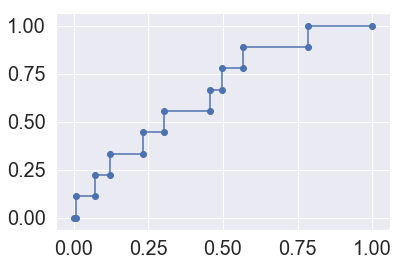

In [181]:
# XGBoost classififcation using Smote_ENN data & hyper-parameter tuning

cv_xgb = XGB_parameter_tuning(X_smt, Y_smt)
Y_pred_proba = cv_xgb.predict_proba(X_test)[:,1]
Y_pred_xgb = Y_pred_proba.copy()

Y_pred_xgb[Y_pred_xgb>0.21] = 1
Y_pred_xgb[Y_pred_xgb<0.21] = 0

metrics_score(Y_test, Y_pred_xgb, Y_pred_proba)

In [316]:
from sklearn.model_selection import StratifiedKFold

def DecisionTree_parameter_tuning(X_train, Y_train):
    param_grid = { 
       'min_samples_leaf': [2, 3, 4],
       'max_features': ['auto', 'sqrt', 'log2'],
       'criterion' :['gini', 'entropy'],
        'max_depth': [1, 3, 5, 7, 9],
        'min_samples_split' :[0.1, 0.2, 0.3]
    }

    dt = DecisionTreeClassifier(random_state=1, class_weight={0:1, 1:diff_class_weight})

    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

    cv_dt = GridSearchCV(estimator=dt, 
                         param_grid=param_grid, 
                         scoring = 'roc_auc',
                         cv=kfold,
                         n_jobs=-1,
                         verbose=2,
                         pre_dispatch='2*n_jobs',
                         refit=True)
    cv_dt.fit(X_train, Y_train)
    return(cv_dt)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:   12.4s finished


{'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 0.1}
f-beta 1:  0.2222222222222222
f-beta 2:  0.31746031746031744


Biopsy    0  1
row_0         
0.0     102  5
1.0      23  4


              precision    recall  f1-score   support

           0       0.95      0.82      0.88       125
           1       0.15      0.44      0.22         9

    accuracy                           0.79       134
   macro avg       0.55      0.63      0.55       134
weighted avg       0.90      0.79      0.84       134



The geometric mean is 0.6022181221672648


Area under the curve:  0.6831111111111112


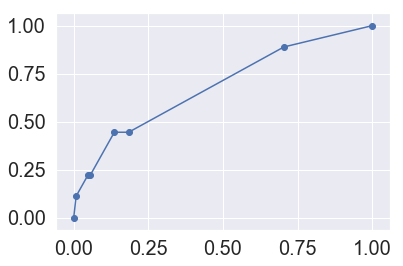

In [317]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree classification using hyper-parameter tuning

cv_dt = DecisionTree_parameter_tuning(X_train, Y_train)
print(cv_dt.best_params_)
Y_pred_proba = cv_dt.predict_proba(X_test)[:,1]
Y_pred_rf = Y_pred_proba.copy()
Y_pred_rf[Y_pred_rf>0.5] = 1
Y_pred_rf[Y_pred_rf<0.5] = 0

metrics_score(Y_test, Y_pred_rf, Y_pred_proba)

f-beta 1:  0.25
f-beta 2:  0.29411764705882354


Biopsy    0  1
row_0         
0.0     113  6
1.0      12  3


              precision    recall  f1-score   support

           0       0.95      0.90      0.93       125
           1       0.20      0.33      0.25         9

    accuracy                           0.87       134
   macro avg       0.57      0.62      0.59       134
weighted avg       0.90      0.87      0.88       134



The geometric mean is 0.5489383693397041


Area under the curve:  0.6159999999999999


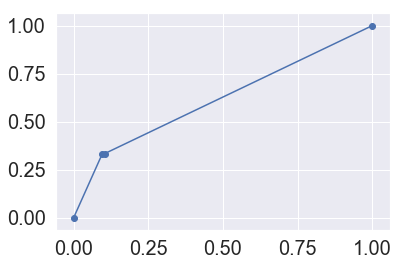

In [298]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree clssifier using Smote_TOMEK data

dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, Y_train)
Y_pred_proba = dt.predict_proba(X_test)[:,1]
Y_pred_rf = Y_pred_proba.copy()
Y_pred_rf[Y_pred_rf>0.56] = 1
Y_pred_rf[Y_pred_rf<0.56] = 0

metrics_score(Y_test, Y_pred_rf, Y_pred_proba)

f-beta 1:  0.20689655172413793
f-beta 2:  0.26785714285714285


Biopsy    0  1
row_0         
0.0     108  6
1.0      17  3


              precision    recall  f1-score   support

           0       0.95      0.86      0.90       125
           1       0.15      0.33      0.21         9

    accuracy                           0.83       134
   macro avg       0.55      0.60      0.56       134
weighted avg       0.89      0.83      0.86       134



The geometric mean is 0.5366563145999496


Area under the curve:  0.596


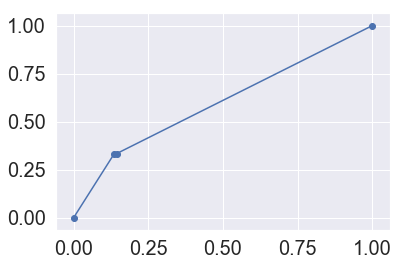

In [302]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree clssifier using Smote_ENN data

dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_smt, Y_smt)
Y_pred_proba = dt.predict_proba(X_test)[:,1]
Y_pred_rf = Y_pred_proba.copy()
Y_pred_rf[Y_pred_rf>0.56] = 1
Y_pred_rf[Y_pred_rf<0.56] = 0

metrics_score(Y_test, Y_pred_rf, Y_pred_proba)

In [197]:
cv_dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])